
# Connect to the drive and import libraries

In [ ]:
#Connect Google Colab to Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/Colab Notebooks/ML_Group06/'

Mounted at /content/drive


In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from datetime import datetime
from sklearn.tree import DecisionTreeClassifier

# Data Understanding

In [ ]:
# Reading the csv file
citizens = pd.read_csv(path + 'Datasets/Supervised/world_citizens.csv', delimiter= ',')
citizens.head().T

0            1  \
avg_monthly_entertainment_expenses             8.873      10.9348   
avg_weekly_exercise_hours                        0.0       0.1298   
citizen_id                                         1            2   
city                                          Palmas        Taupo   
country                                       Brazil  New Zealand   
date_of_birth                             1982-02-15   1989-11-07   
eco_consciousness_score                          0.0          0.0   
education_level                               5.5454        4.915   
environmental_awareness_rating                0.5576       0.5998   
financial_wellness_index                     264.346      209.972   
hapiness_level                                medium       medium   
health_consciousness_rating                    0.865          NaN   
investment_portfolio_value                    0.1313          0.0   
investments_risk_appetite                     6.7866       7.2836   
investments_risk_tolerance                    22.955      17.0296   
last_year_charity_donations                      0.0          0.0   
lifestyle                           Health-Conscious     Investor   
marital_status                                                      
name                                         Mafalda        Olive   
social_media_influence_score                  2.6469       2.1466   
stress_management_score                       3.0448       1.8311   
title                                            Ms.         Mrs.   
well_being_level                              3.9098       4.4571   

                                                   2                 3  \
avg_monthly_entertainment_expenses           29.9206           36.0014   
avg_weekly_exercise_hours                     0.1129            0.0419   
citizen_id                                         3                 4   
city                                           Nauen             Kusel   
country                                      Germany           Germany   
date_of_birth                             1972-03-13        1982-04-28   
eco_consciousness_score                          0.0            0.0134   
education_level                               9.4307            8.5129   
environmental_awareness_rating                0.6302            0.6066   
financial_wellness_index                     21.6053           87.0453   
hapiness_level                                medium            medium   
health_consciousness_rating                   0.4199            0.7646   
investment_portfolio_value                    5.1244            6.1273   
investments_risk_appetite                       4.18            7.1364   
investments_risk_tolerance                    3.9274            6.0943   
last_year_charity_donations                      0.0            0.1132   
lifestyle                           Health-Conscious  Health-Conscious   
marital_status                                                           
name                                          Esther             Ramon   
social_media_influence_score                 10.2169            4.9333   
stress_management_score                       3.9353               NaN   
title                                            Ms.               Mr.   
well_being_level                              4.3552            5.7737   

                                                     4  
avg_monthly_entertainment_expenses              6.0075  
avg_weekly_exercise_hours                       1.2697  
citizen_id                                           5  
city                                              Rize  
country                                         Turkey  
date_of_birth                               1996-09-05  
eco_consciousness_score                            0.0  
education_level                                 6.0902  
environmental_awareness_rating                  1.1385  
financial_wellness_index                       

In [ ]:
# Keeping original data untransformed
df1 = citizens.copy()

## Exploratory Data Analysis

### Summary statistics

In [ ]:
#First look at the format of the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8327 entries, 0 to 8326
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   avg_monthly_entertainment_expenses  8077 non-null   float64
 1   avg_weekly_exercise_hours           8119 non-null   float64
 2   citizen_id                          8327 non-null   int64  
 3   city                                8327 non-null   object 
 4   country                             8327 non-null   object 
 5   date_of_birth                       8327 non-null   object 
 6   eco_consciousness_score             8119 non-null   float64
 7   education_level                     8036 non-null   float64
 8   environmental_awareness_rating      8294 non-null   float64
 9   financial_wellness_index            8078 non-null   float64
 10  hapiness_level                      8327 non-null   object 
 11  health_consciousness_rating         8077 no

In [ ]:
#Calculating some descriptive numbers
df1.describe(include = 'all').T

count unique               top  freq  \
avg_monthly_entertainment_expenses  8077.0    NaN               NaN   NaN   
avg_weekly_exercise_hours           8119.0    NaN               NaN   NaN   
citizen_id                          8327.0    NaN               NaN   NaN   
city                                  8327   3733          Tauranga    24   
country                               8327     22             Spain   446   
date_of_birth                         8327   5711        1996-02-18     6   
eco_consciousness_score             8119.0    NaN               NaN   NaN   
education_level                     8036.0    NaN               NaN   NaN   
environmental_awareness_rating      8294.0    NaN               NaN   NaN   
financial_wellness_index            8078.0    NaN               NaN   NaN   
hapiness_level                        8327      1            medium  8327   
health_consciousness_rating         8077.0    NaN               NaN   NaN   
investment_portfolio_value          8202.0    NaN               NaN   NaN   
investments_risk_appetite           8077.0    NaN               NaN   NaN   
investments_risk_tolerance          8160.0    NaN               NaN   NaN   
last_year_charity_donations         8202.0    NaN               NaN   NaN   
lifestyle                             8327      3  Health-Conscious  2795   
marital_status                        8327      1                    8327   
name                                  8327   3576              Emma    26   
social_media_influence_score        8327.0    NaN               NaN   NaN   
stress_management_score             8034.0    NaN               NaN   NaN   
title                                 8327      4               Mr.  4034   
well_being_level                    8202.0    NaN               NaN   NaN   

                                          mean          std     min       25%  \
avg_monthly_entertainment_expenses    21.59006    17.409831     0.0    8.1283   
avg_weekly_exercise_hours             0.707644     1.186189 -5.5794    0.0224   
citizen_id                              4164.0  2403.942179     1.0    2082.5   
city                                       NaN          NaN     NaN       NaN   
country                                    NaN          NaN     NaN       NaN   
date_of_birth                              NaN          NaN     NaN       NaN   
eco_consciousness_score               0.131725     0.358699 -1.4167       0.0   
education_level                       6.282893     2.918705     0.0  4.031225   
environmental_awareness_rating        0.827204      0.65063  0.0376  0.540925   
financial_wellness_index            106.489905    64.306568   -0.05  87.50485   
hapiness_level                             NaN          NaN     NaN       NaN   
health_consciousness_rating            1.45305     1.395238     0.0    0.6861   
investment_portfolio_value           12.389882    21.130598     0.0  3.294525   
investments_risk_appetite             4.382051     2.646902     0.0    1.8598   
investments_risk_tolerance             7.31923     3.701474  1.3937   4.79635   
last_year_charity_donations           0.381026     0.764584     0.0       0.0   
lifestyle                                  NaN          NaN     NaN       NaN   
marital_status                             NaN          NaN     NaN       NaN   
name                                       NaN          NaN     NaN       NaN   
social_media_influence_score          6.093906     4.326703     0.0   3.16365   
stress_management_score               3.318334     1.113446  0.3192  2.560975   
title                                      NaN          NaN     NaN       NaN   
well_being_level                      4.765718     1.933205  1.1376  3.412525   

                                         50%        75%      max  
avg_monthly_entertainment_expenses   11.9831    38.7573   135.42  
avg_weekly_exercise_hours             0.1093    1.02375   8.7017  
citizen_id                            4164

In [ ]:
# Calculating the missing values
df1.isna().sum()

avg_monthly_entertainment_expenses    250
avg_weekly_exercise_hours             208
citizen_id                              0
city                                    0
country                                 0
date_of_birth                           0
eco_consciousness_score               208
education_level                       291
environmental_awareness_rating         33
financial_wellness_index              249
hapiness_level                          0
health_consciousness_rating           250
investment_portfolio_value            125
investments_risk_appetite             250
investments_risk_tolerance            167
last_year_charity_donations           125
lifestyle                               0
marital_status                          0
name                                    0
social_media_influence_score            0
stress_management_score               293
title                                   0
well_being_level                      125
dtype: int64

#### Primary observations

From these outputs we observe three key points:
1. Some irrelevant columns are present in the dataframe
2. Many of the data types are not as we need them in order to gain relevant statistical information
3. Some missing values are observable

Let's start dealing with the first issue.
The columns we are referring to are the following:
- 'happiness_level', since it assumes only one value in the sample
- 'marital_status', since it is an empty column
- 'name', since it does not provide us any useful information for the purpose of our project

Hence, because of the irrelevance of these features in our object of study and in order to reduce the computational cost, we decide to remove them from our dataframe. We decide to drop those columns now because we are sure that an hypotetic data visualization of them will not be useful for our purposes.

In [ ]:
#Deleting column with constant values (hapiness_level), one with no values (marital_status) and one that offers no additional info (name)
df1 = df1.drop(columns = ['hapiness_level','marital_status', 'name'])

Now we can move looking at the second mentioned issue.
To be able to have an appropriate visualization of the features we need to modify some of their data types; for doing that we will help our lives dividing the columns in macro groups as follows.

In [ ]:
# We categorize the columns based on the descriptions given
numerical_features = [
    'avg_monthly_entertainment_expenses', 'avg_weekly_exercise_hours', 'eco_consciousness_score',
    'education_level', 'environmental_awareness_rating', 'financial_wellness_index', 'health_consciousness_rating',
    'investment_portfolio_value', 'investments_risk_appetite', 'investments_risk_tolerance', 'last_year_charity_donations',
    'social_media_influence_score', 'stress_management_score', 'well_being_level'
]
categorical_features = ['title', 'city', 'country']
daytime_feature = 'date_of_birth'
id_feature = ['citizen_id']

Once having separated the features, we can proceed correcting their data types in order to visualize them correctly.

In [ ]:
# Replacing commas with dots to work with the data as type float64
df1[numerical_features] = df1[numerical_features].replace(',', '.', regex=True).apply(pd.to_numeric, errors='coerce')

In [ ]:
# Scale values to actual dollars
thousand_columns = ['investment_portfolio_value', 'last_year_charity_donations']
df1[thousand_columns] = df1[thousand_columns] * 1000

In [ ]:
# Convert the column to datetime format
df1[daytime_feature] = pd.to_datetime(df1[daytime_feature], errors='coerce')

# Verify the conversion
df1[daytime_feature].head()

0   1982-02-15
1   1989-11-07
2   1972-03-13
3   1982-04-28
4   1996-09-05
Name: date_of_birth, dtype: datetime64[ns]

In [ ]:
# Modify data type of 'city' and 'country' in str
df1[categorical_features[1:]] = df1[categorical_features[1:]].astype("string")

In [ ]:
# Second look at the data types of our features
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8327 entries, 0 to 8326
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   avg_monthly_entertainment_expenses  8077 non-null   float64       
 1   avg_weekly_exercise_hours           8119 non-null   float64       
 2   citizen_id                          8327 non-null   int64         
 3   city                                8327 non-null   string        
 4   country                             8327 non-null   string        
 5   date_of_birth                       8327 non-null   datetime64[ns]
 6   eco_consciousness_score             8119 non-null   float64       
 7   education_level                     8036 non-null   float64       
 8   environmental_awareness_rating      8294 non-null   float64       
 9   financial_wellness_index            8078 non-null   float64       
 10  health_consciousness_rat

Now our data are ready to be shown correctly through descriptive statistics and some  visualization methods

### Data visualization

#### Boxplots and histograms

In [ ]:
def analyze_column(df, column):

    # Define interquartile range
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # Count outliers
    num_outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    outlier_percentage = num_outliers / len(df[column]) * 100

    # Count missing values
    missing_values = df[column].isna().sum()

    # Calculate skewness and kurtosis
    skew = df[column].skew()
    kurt = df[column].kurt()

    # Print stats
    print(f"Feature: {column}")
    print(f"  - Missing values: {missing_values}")
    print(f"  - Outlier percentage: {outlier_percentage:.2f}%")
    print(f"  - Skewness: {skew}")
    print(f"  - Kurtosis: {kurt}")
    print(f"  - Other info:\n{df[column].describe()}\n")

    # Visualization: Boxplot & Histogram
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Boxplot
    sns.boxplot(x=df[column], ax=axes[0])
    axes[0].set_title(f"Boxplot of {column}")

    # Histogram
    sns.histplot(df[column], bins=30, kde=True, ax=axes[1])
    axes[1].set_title(f"Histogram of {column}")

    plt.tight_layout()
    plt.show()

Feature: avg_monthly_entertainment_expenses
  - Missing values: 250
  - Outlier percentage: 0.61%
  - Skewness: 1.2545902636981403
  - Kurtosis: 2.130840607434967
  - Other info:
count    8077.000000
mean       21.590060
std        17.409831
min         0.000000
25%         8.128300
50%        11.983100
75%        38.757300
max       135.420000
Name: avg_monthly_entertainment_expenses, dtype: float64



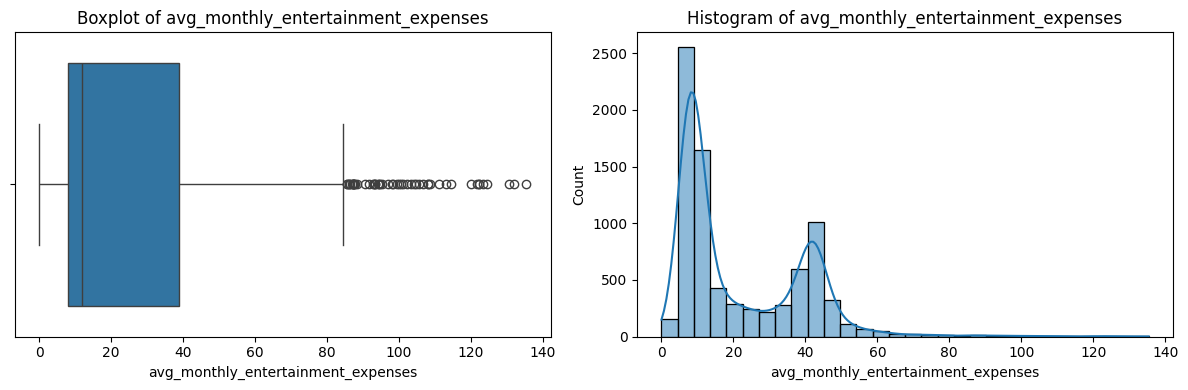

Feature: avg_weekly_exercise_hours
  - Missing values: 208
  - Outlier percentage: 10.14%
  - Skewness: 1.7150509993725302
  - Kurtosis: 3.907206462277964
  - Other info:
count    8119.000000
mean        0.707644
std         1.186189
min        -5.579400
25%         0.022400
50%         0.109300
75%         1.023750
max         8.701700
Name: avg_weekly_exercise_hours, dtype: float64



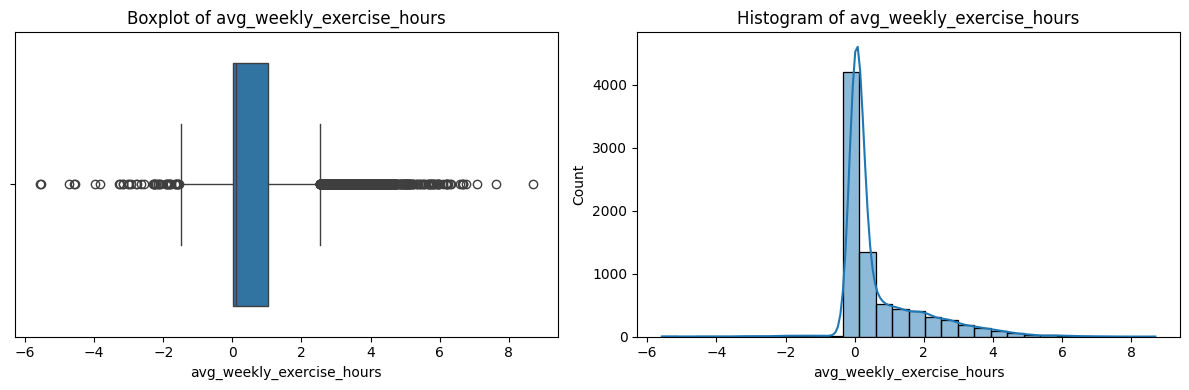

Feature: eco_consciousness_score
  - Missing values: 208
  - Outlier percentage: 16.63%
  - Skewness: 3.211392610279207
  - Kurtosis: 10.341563311709166
  - Other info:
count    8119.000000
mean        0.131725
std         0.358699
min        -1.416700
25%         0.000000
50%         0.007800
75%         0.024450
max         3.247500
Name: eco_consciousness_score, dtype: float64



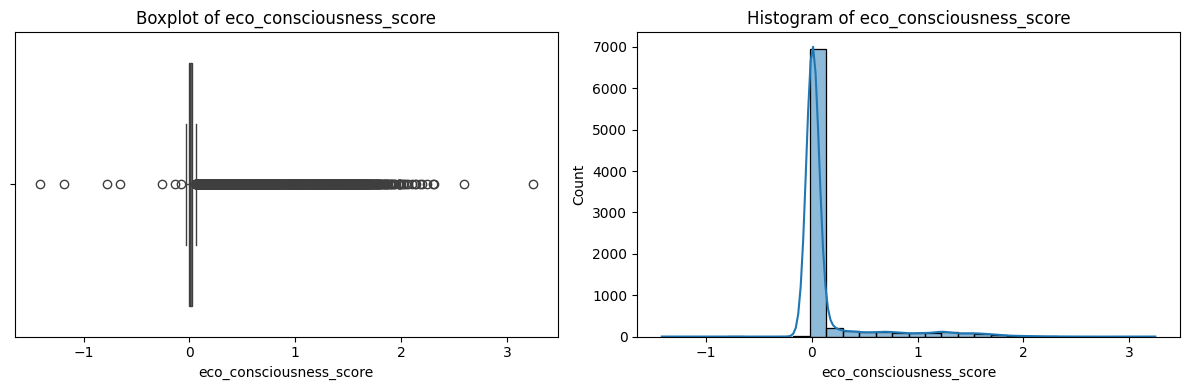

Feature: education_level
  - Missing values: 291
  - Outlier percentage: 0.00%
  - Skewness: -0.05012392225695559
  - Kurtosis: -0.7901519202864922
  - Other info:
count    8036.000000
mean        6.282893
std         2.918705
min         0.000000
25%         4.031225
50%         6.344650
75%         8.559725
max        14.244000
Name: education_level, dtype: float64



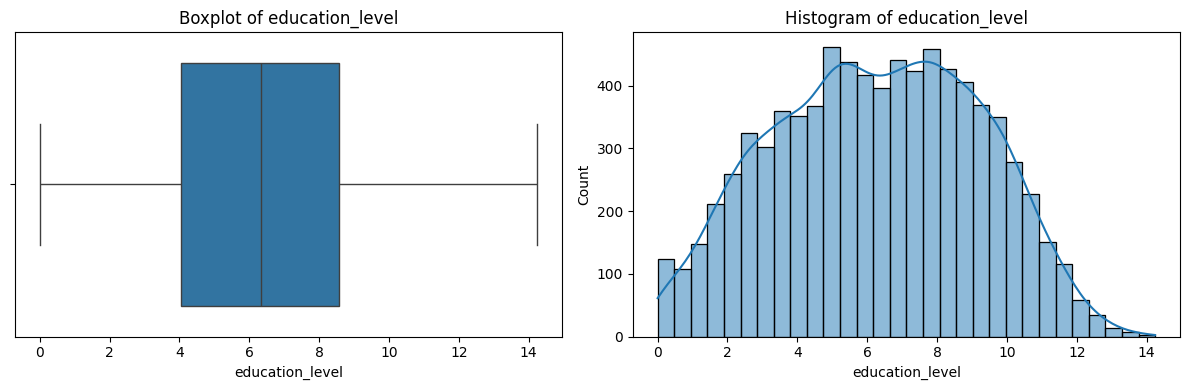

Feature: environmental_awareness_rating
  - Missing values: 33
  - Outlier percentage: 13.97%
  - Skewness: 3.7251729673680214
  - Kurtosis: 17.781731634225356
  - Other info:
count    8294.000000
mean        0.827204
std         0.650630
min         0.037600
25%         0.540925
50%         0.631200
75%         0.774475
max         7.402500
Name: environmental_awareness_rating, dtype: float64



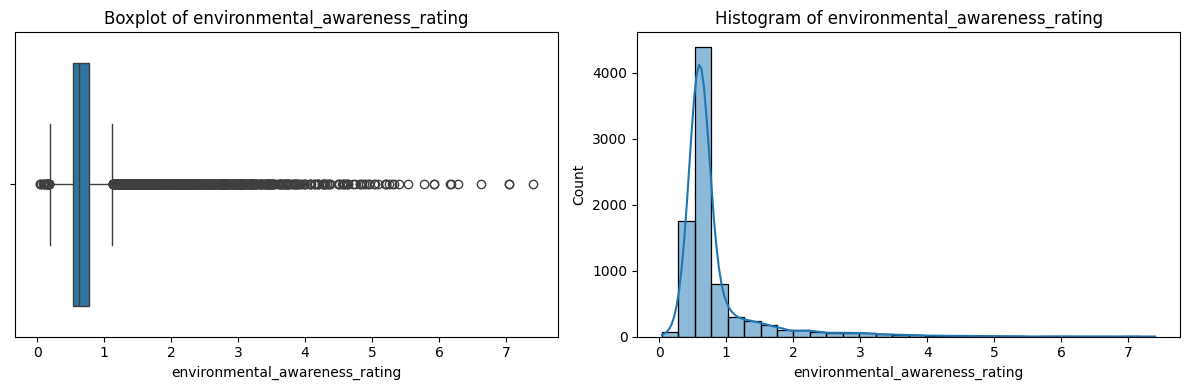

Feature: financial_wellness_index
  - Missing values: 249
  - Outlier percentage: 29.79%
  - Skewness: 1.2770319310649534
  - Kurtosis: 3.0071197025238448
  - Other info:
count    8078.000000
mean      106.489905
std        64.306568
min        -0.050000
25%        87.504850
50%        99.828050
75%       114.048500
max       458.451000
Name: financial_wellness_index, dtype: float64



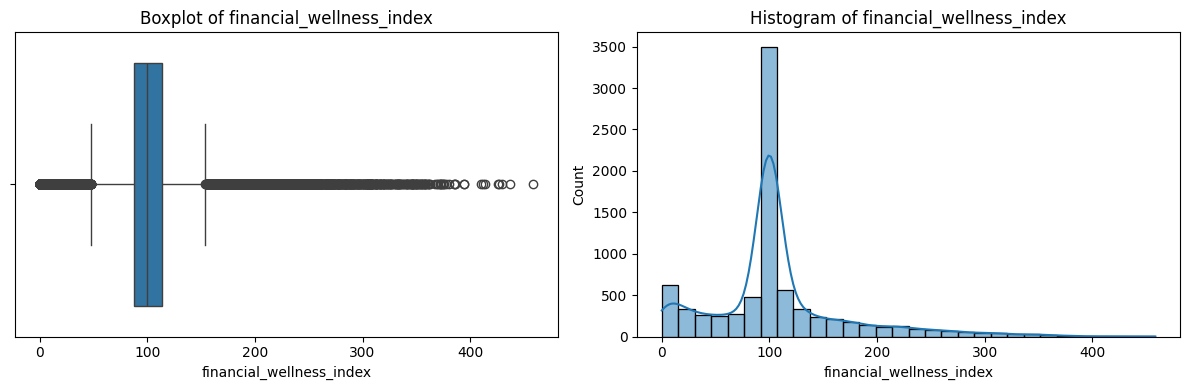

Feature: health_consciousness_rating
  - Missing values: 250
  - Outlier percentage: 10.80%
  - Skewness: 1.9364713879678284
  - Kurtosis: 3.642310466806809
  - Other info:
count    8077.000000
mean        1.453050
std         1.395238
min         0.000000
25%         0.686100
50%         0.807100
75%         1.766200
max        10.053000
Name: health_consciousness_rating, dtype: float64



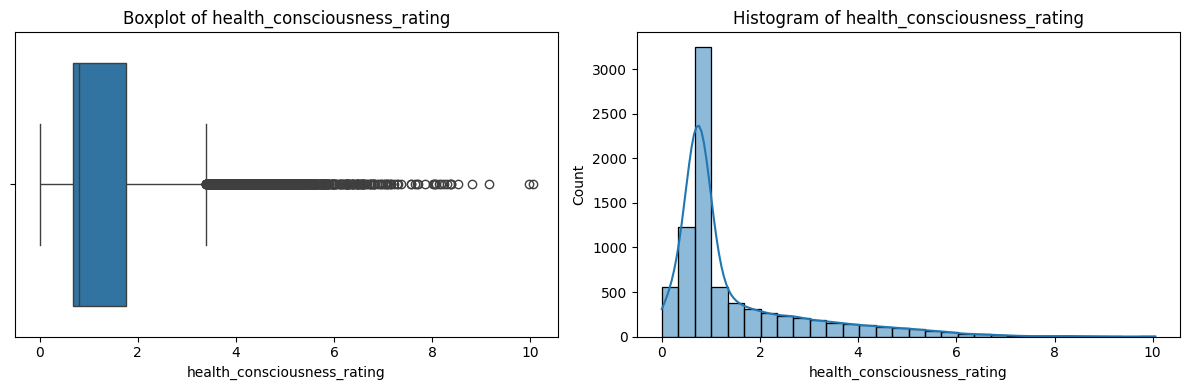

Feature: investment_portfolio_value
  - Missing values: 125
  - Outlier percentage: 6.28%
  - Skewness: 5.538501384583904
  - Kurtosis: 40.68880526454603
  - Other info:
count      8202.000000
mean      12389.882139
std       21130.598331
min           0.000000
25%        3294.525000
50%        8591.050000
75%       13257.225000
max      294950.000000
Name: investment_portfolio_value, dtype: float64



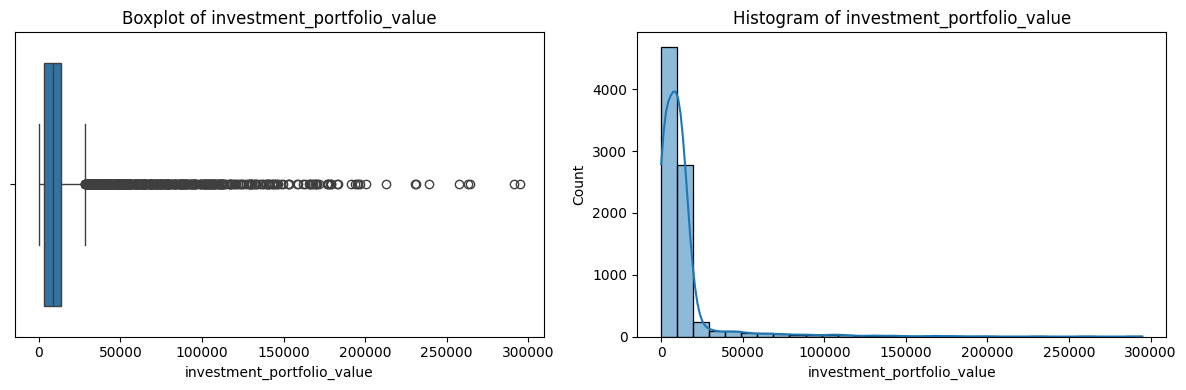

Feature: investments_risk_appetite
  - Missing values: 250
  - Outlier percentage: 0.00%
  - Skewness: -0.27502755720871797
  - Kurtosis: -1.3565661474050814
  - Other info:
count    8077.000000
mean        4.382051
std         2.646902
min         0.000000
25%         1.859800
50%         4.817600
75%         6.878600
max         8.699500
Name: investments_risk_appetite, dtype: float64



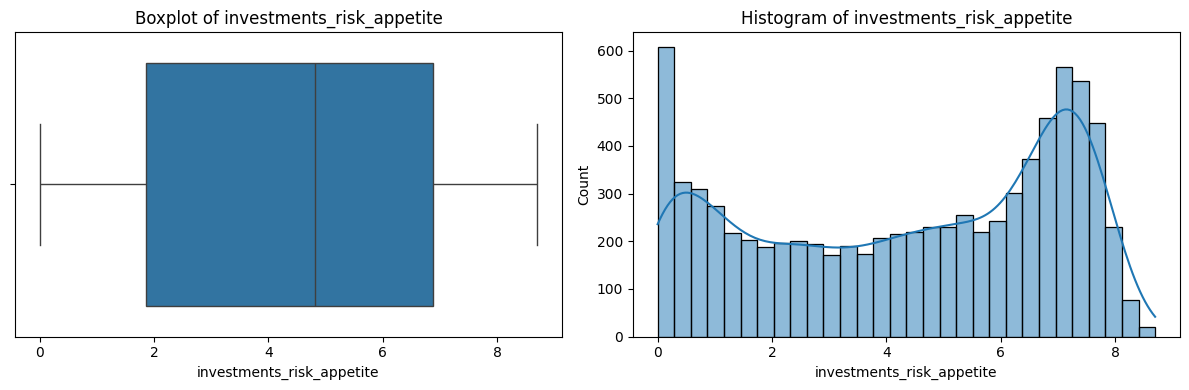

Feature: investments_risk_tolerance
  - Missing values: 167
  - Outlier percentage: 6.04%
  - Skewness: 1.9296158313089673
  - Kurtosis: 4.6784023033371716
  - Other info:
count    8160.000000
mean        7.319230
std         3.701474
min         1.393700
25%         4.796350
50%         6.218600
75%         8.554900
max        30.912400
Name: investments_risk_tolerance, dtype: float64



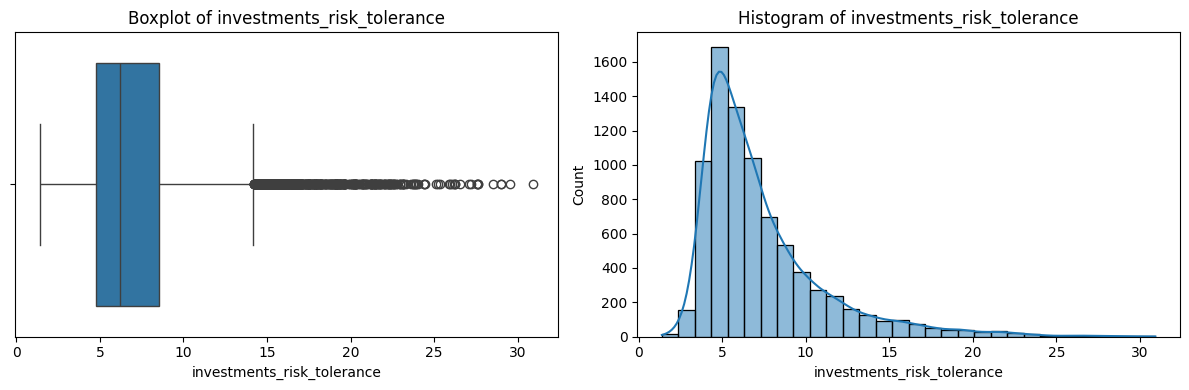

Feature: last_year_charity_donations
  - Missing values: 125
  - Outlier percentage: 16.72%
  - Skewness: 2.5736897521328084
  - Kurtosis: 6.812817239053992
  - Other info:
count    8202.000000
mean      381.025652
std       764.584131
min         0.000000
25%         0.000000
50%        10.550000
75%       309.900000
max      5599.100000
Name: last_year_charity_donations, dtype: float64



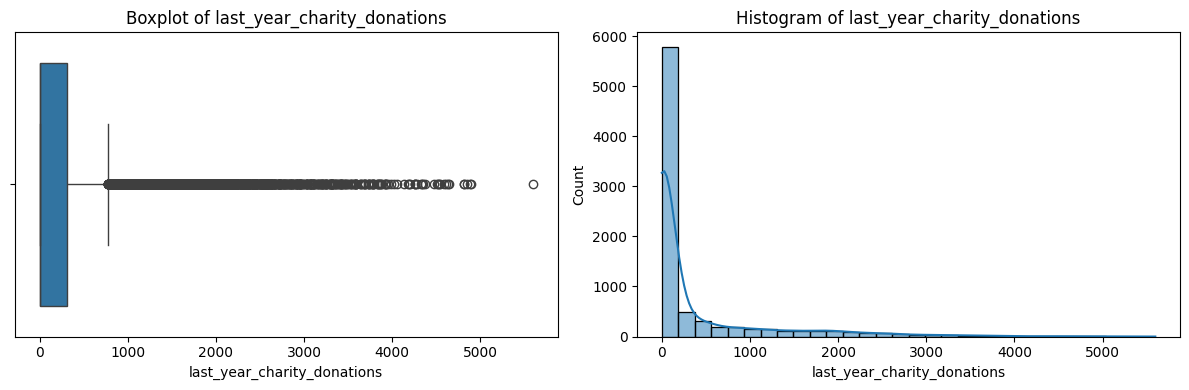

Feature: social_media_influence_score
  - Missing values: 0
  - Outlier percentage: 3.88%
  - Skewness: 1.502230148162808
  - Kurtosis: 2.431933593118179
  - Other info:
count    8327.000000
mean        6.093906
std         4.326703
min         0.000000
25%         3.163650
50%         4.398000
75%         8.174000
max        42.176800
Name: social_media_influence_score, dtype: float64



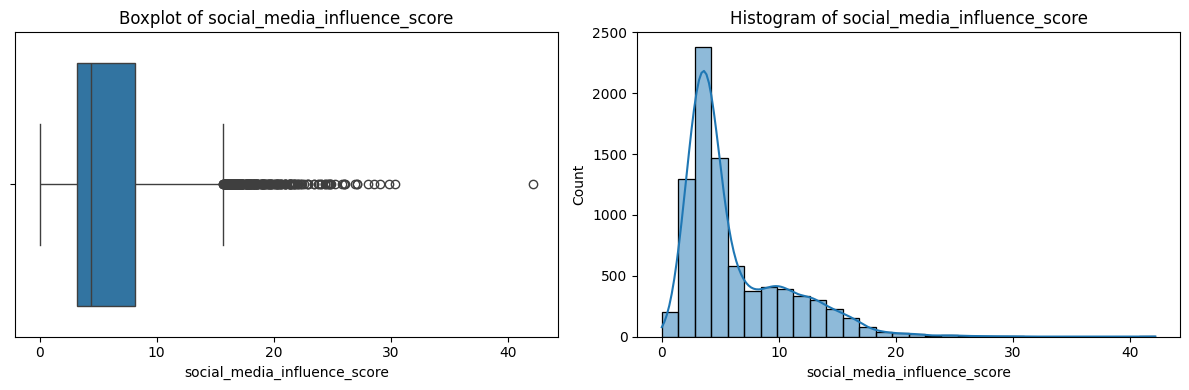

Feature: stress_management_score
  - Missing values: 293
  - Outlier percentage: 1.55%
  - Skewness: 0.6391636161894609
  - Kurtosis: 0.6073529874836239
  - Other info:
count    8034.000000
mean        3.318334
std         1.113446
min         0.319200
25%         2.560975
50%         3.150200
75%         3.980425
max         8.712300
Name: stress_management_score, dtype: float64



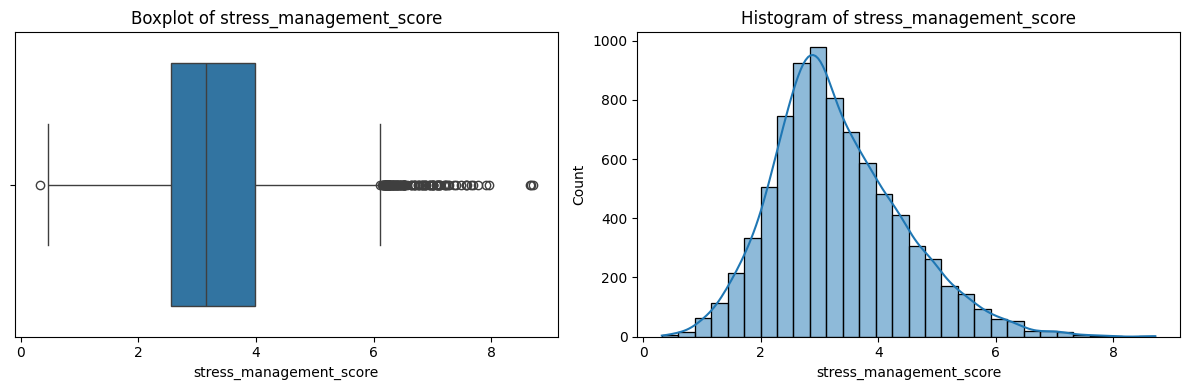

Feature: well_being_level
  - Missing values: 125
  - Outlier percentage: 4.59%
  - Skewness: 1.2012399133386935
  - Kurtosis: 1.5398312135603303
  - Other info:
count    8202.000000
mean        4.765718
std         1.933205
min         1.137600
25%         3.412525
50%         4.321400
75%         5.621575
max        14.114300
Name: well_being_level, dtype: float64



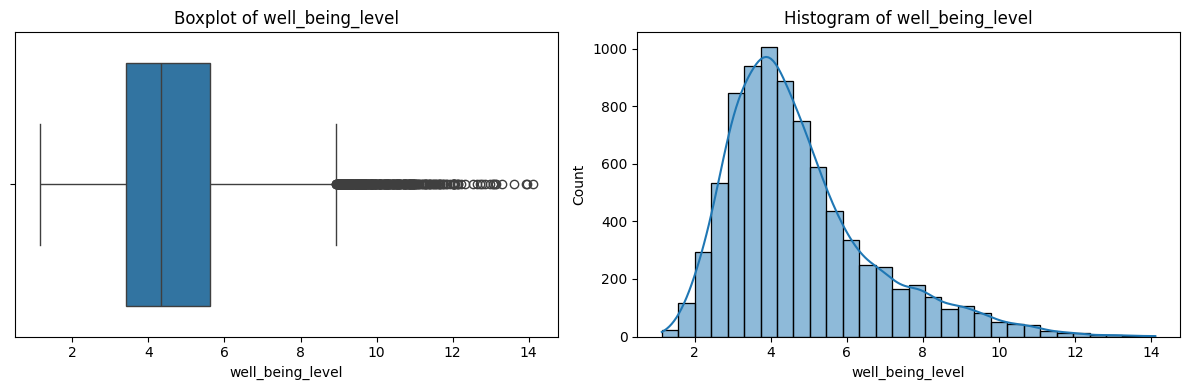

In [ ]:
for column in numerical_features:
  analyze_column(df1, column)

#### Correlation maps

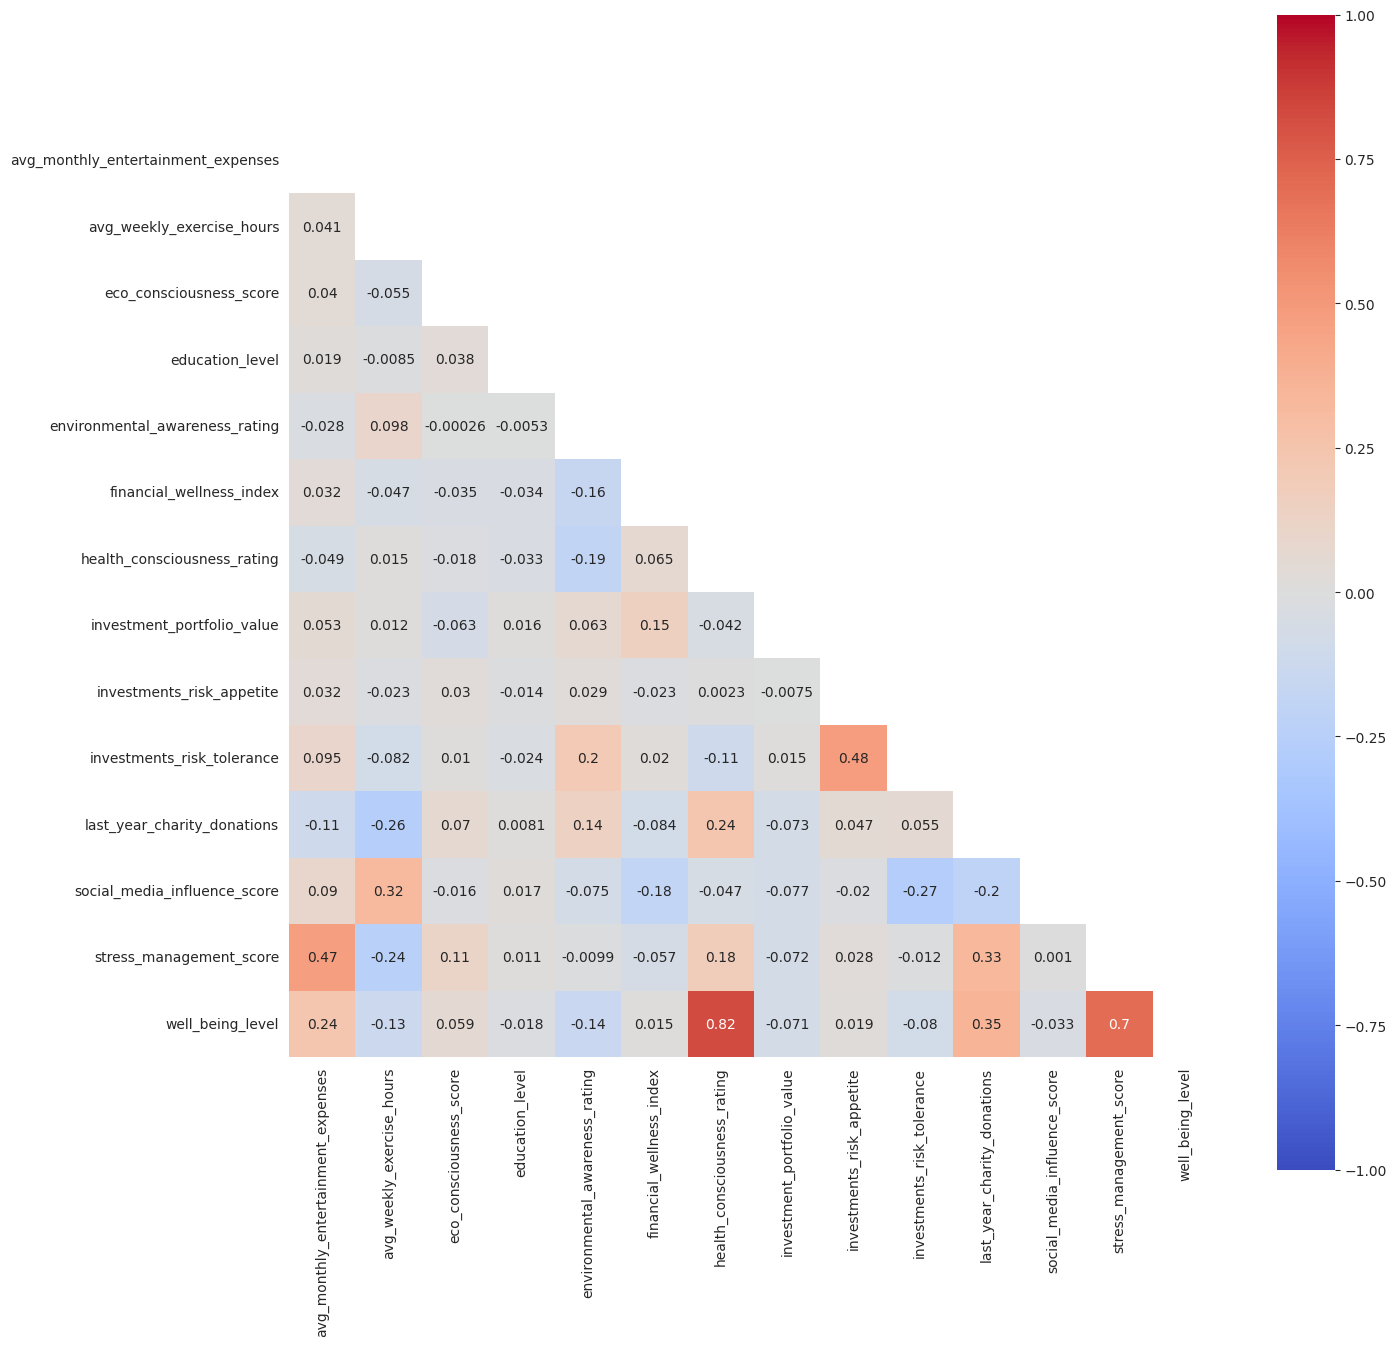

In [ ]:
mask = np.zeros_like(df1[numerical_features].corr('pearson'))
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15,15))
    ax = sns.heatmap(df1[numerical_features].corr('pearson'),mask=mask, annot = True,cmap='coolwarm',square=True,vmin=-1, vmax=1)

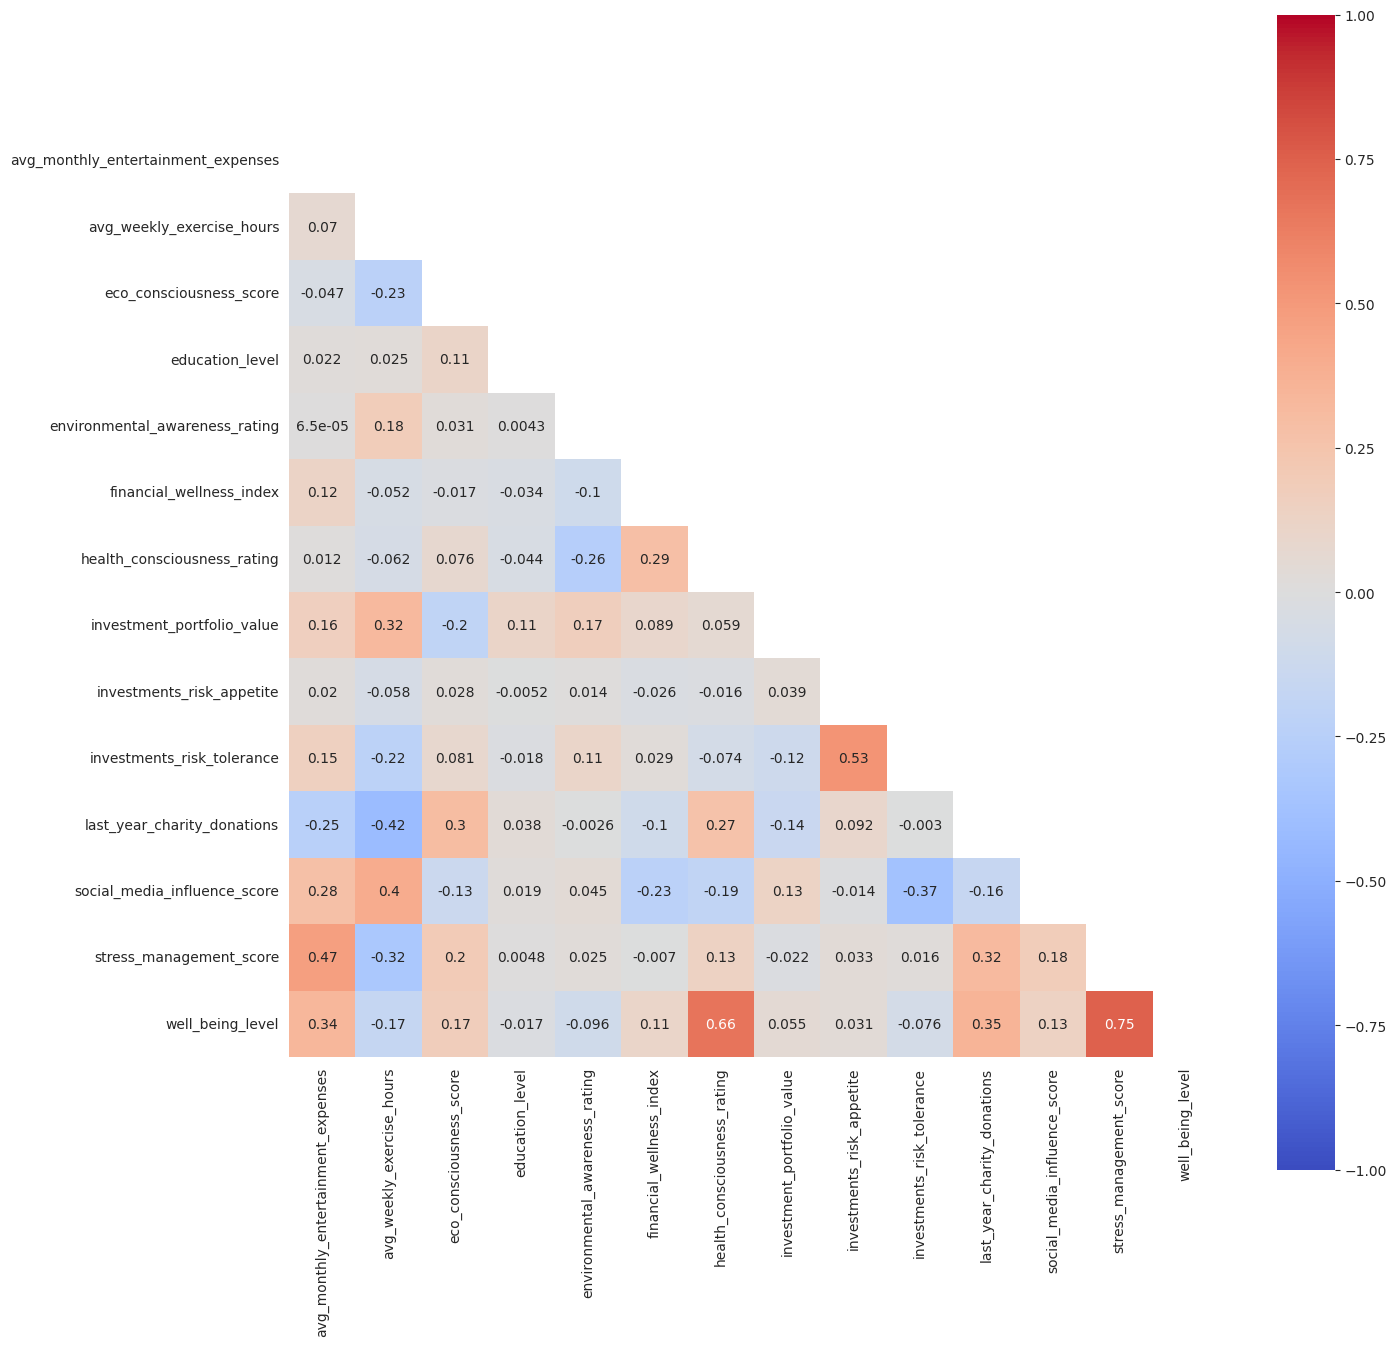

In [ ]:
mask = np.zeros_like(df1[numerical_features].corr('spearman'))
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15,15))
    ax = sns.heatmap(df1[numerical_features].corr('spearman'),mask=mask, annot = True,cmap='coolwarm',square=True,vmin=-1, vmax=1)

#### Additional visualization

In order to clearly visualize some incoherencies and to make some comparison between the features of our dataframe, we start looking at how the sample features change with respect to the age; firstly we need to change the data type of date_of_birth to datetime and then to create a new variable called age as follows:

In [ ]:
today = datetime.today()

def calculate_age(dob):
    if pd.isnull(dob):
        return np.nan
    age = today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
    return age if age >= 0 else np.nan

df1["age"] = df1["date_of_birth"].apply(calculate_age)

df1.drop(columns=["date_of_birth"], inplace=True)

In [ ]:
# Include 'age' in numeric_cols
numerical_features.append('age')

We are aware that adding a new variable to our dataframe is part of the Feature Engineering; with that in mind, we still prefer adding the feature age right now in order to find some valuable insights or incoherencies as soon as possible.

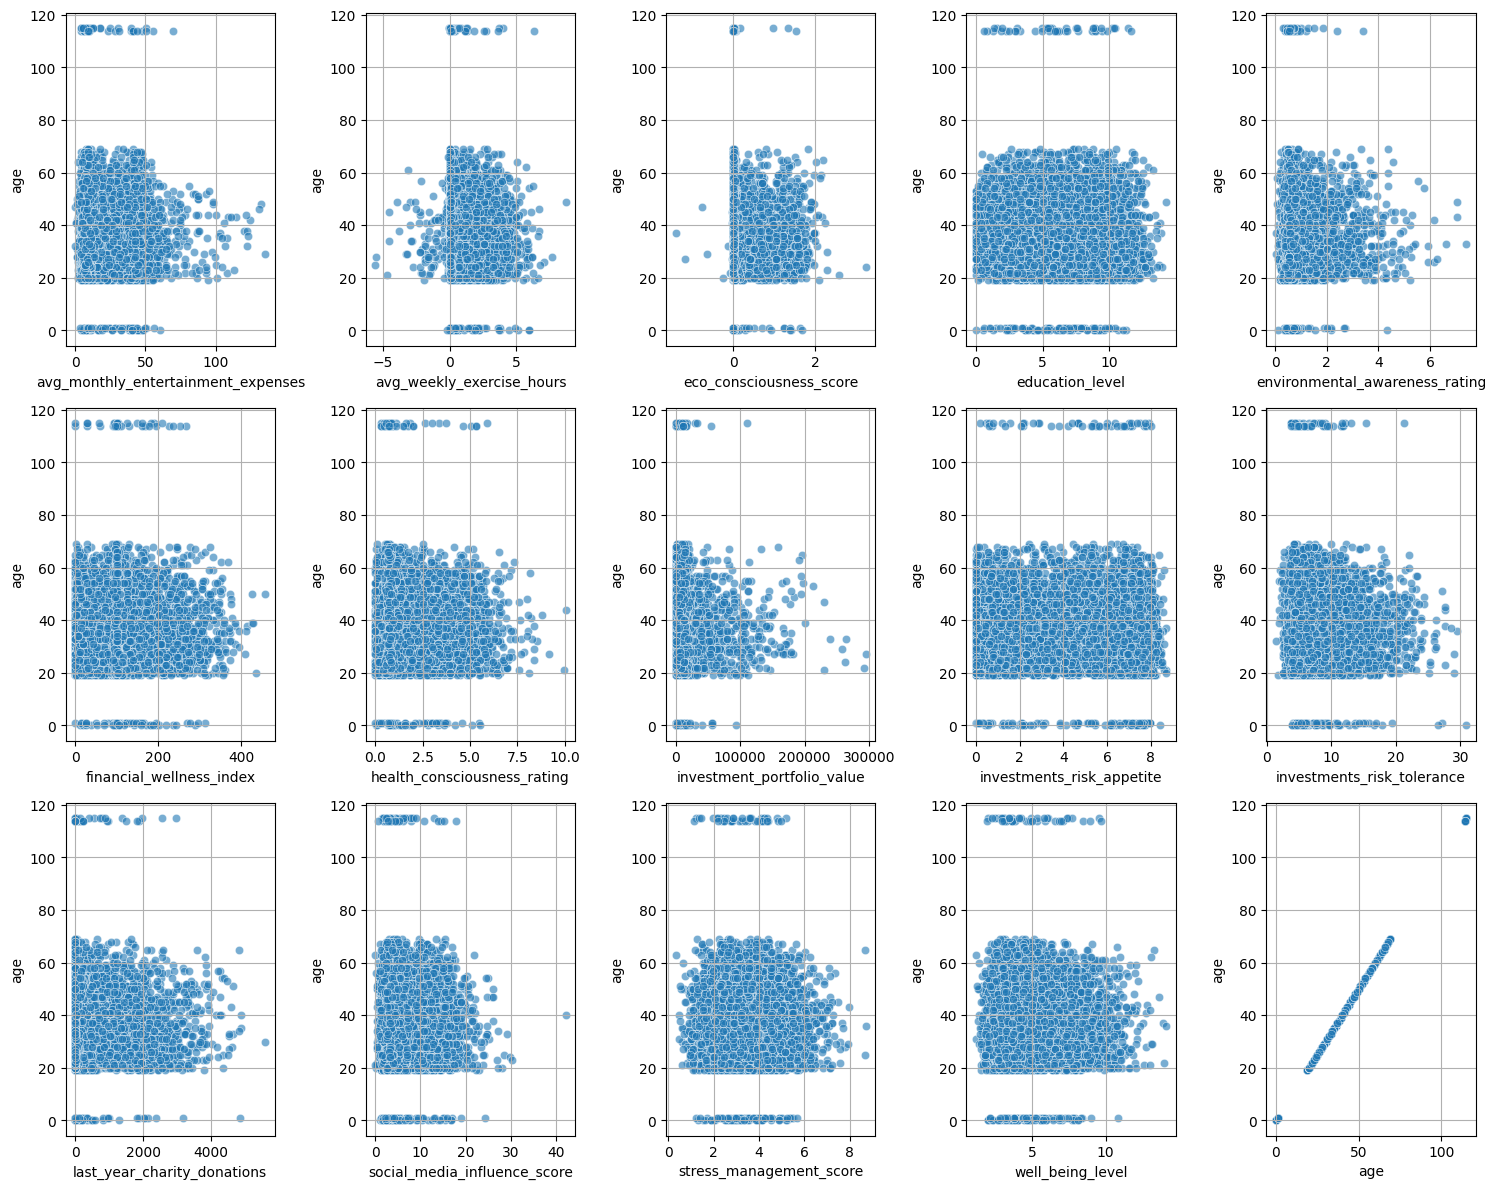

In [ ]:
# Looking for patterns between 'age' and all the other features

fig, axes = plt.subplots(3, 5, figsize=(15, 12))
axes = axes.flatten()
for i, col in enumerate(numerical_features):
    sns.scatterplot(y='age', x=col, data=df1, alpha=0.6, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('age')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

<Axes: xlabel='age', ylabel='Count'>

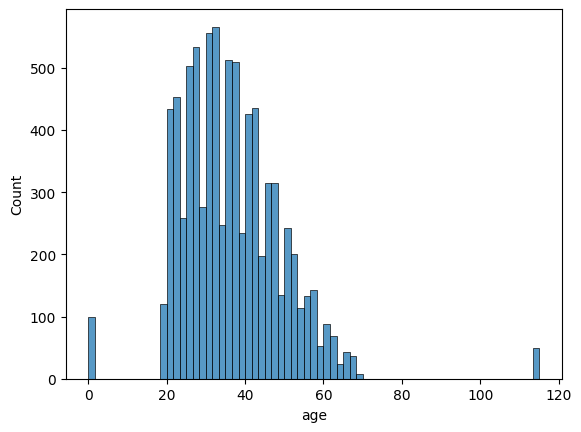

In [ ]:
# Histogram of age
sns.histplot(data=df1, x='age')

In [ ]:
# Count how many extreme values in age
under_2 = (df1['age']<2).sum()
over_113 = (df1['age']>113).sum()
print(f'The number of people under 2 years old is: {under_2}')
print(f'The number of people over 113 years old is: {over_113}')

The number of people under 2 years old is: 100
The number of people over 113 years old is: 50


Although we were expecting something different, almost none pattern is clearly visible in the comparison bewteen age and all the other features.
Nevertheless we observe, in particular from the histogram, that some incoherencies are clearly present: a part of the sample shows an age below 2 years or above 113. Some relative conclusions are on the insights paragraph

In [ ]:
# Looking for some additional visualization in order to gain insights
# sns.pairplot(df1[numerical_features])

From the pairplot of the numerical features of df1 some patterns are worthy to be higihlighted:
- a citizen of our sample with an high investments_risk_tolerance must have an high investments_risk_appetite, while the viceversa does not hold
- well_being_level and health_consciousness_rating are pretty high correlated (we knew it even before)
- the scatterplot of financial_wellness_index and well_being_level shows that for having an high well_being_level a minimum threshold of financial_wellness_index is needed; nonetheless if the financial_wellness_index is too high, the well_being_level decreases. This result is interesting in order to analyze how is the people perception of financial wellness over their well being.

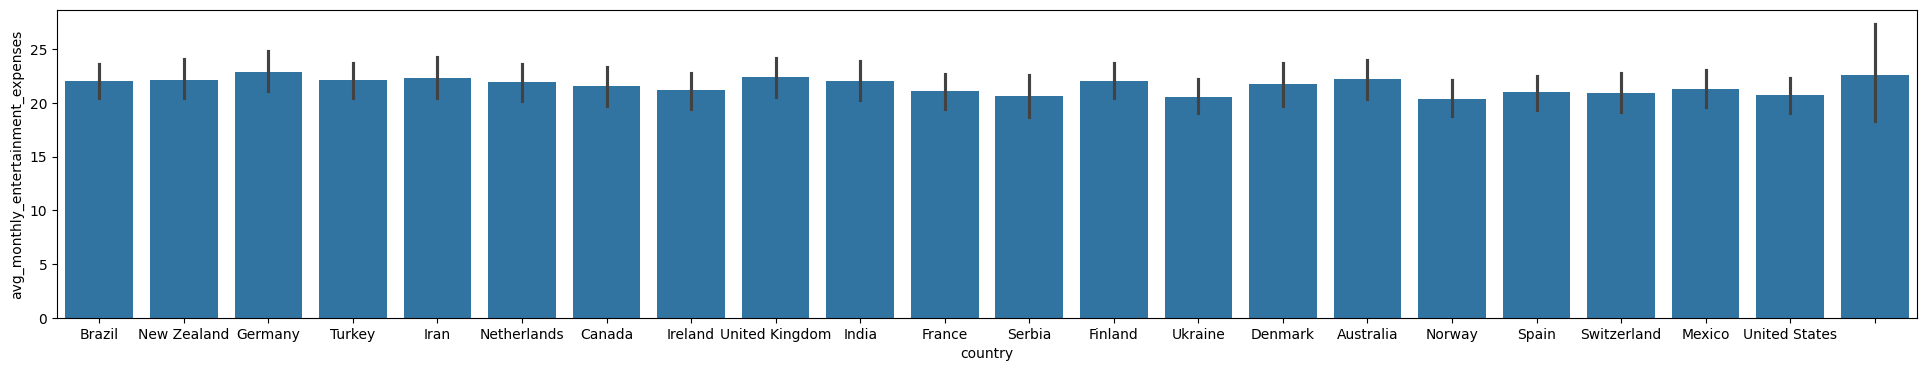

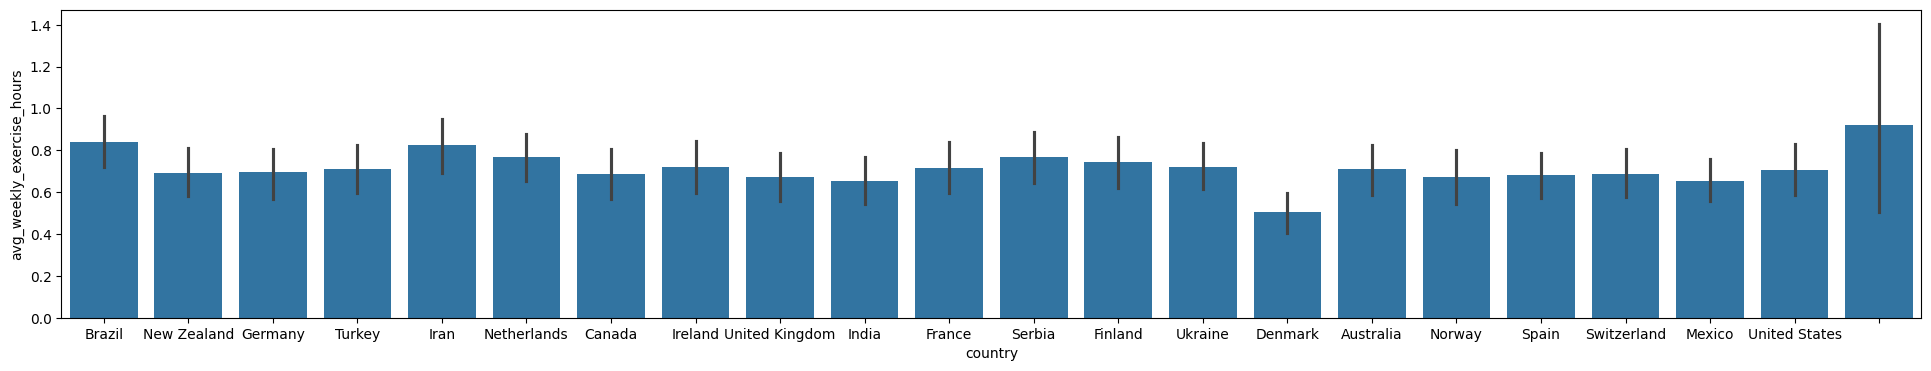

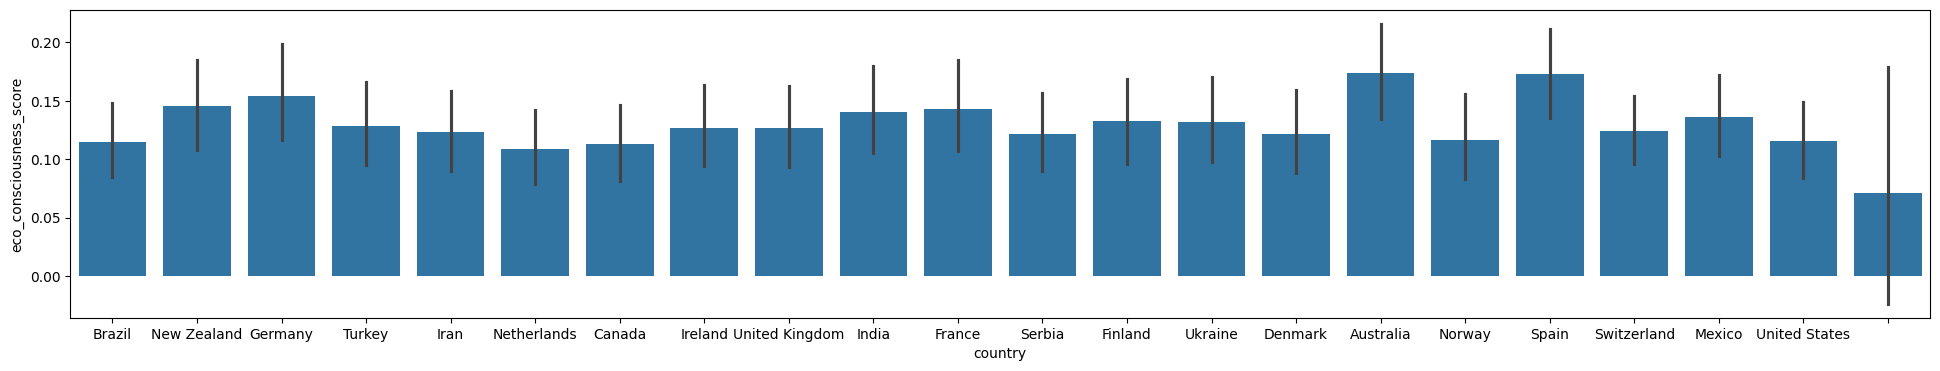

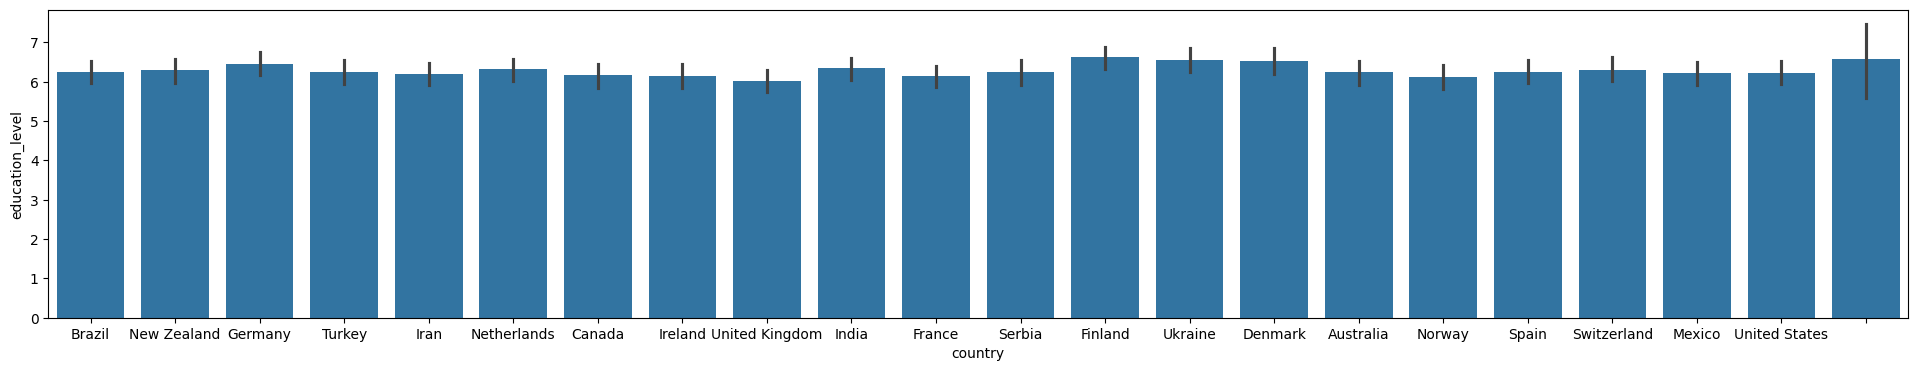

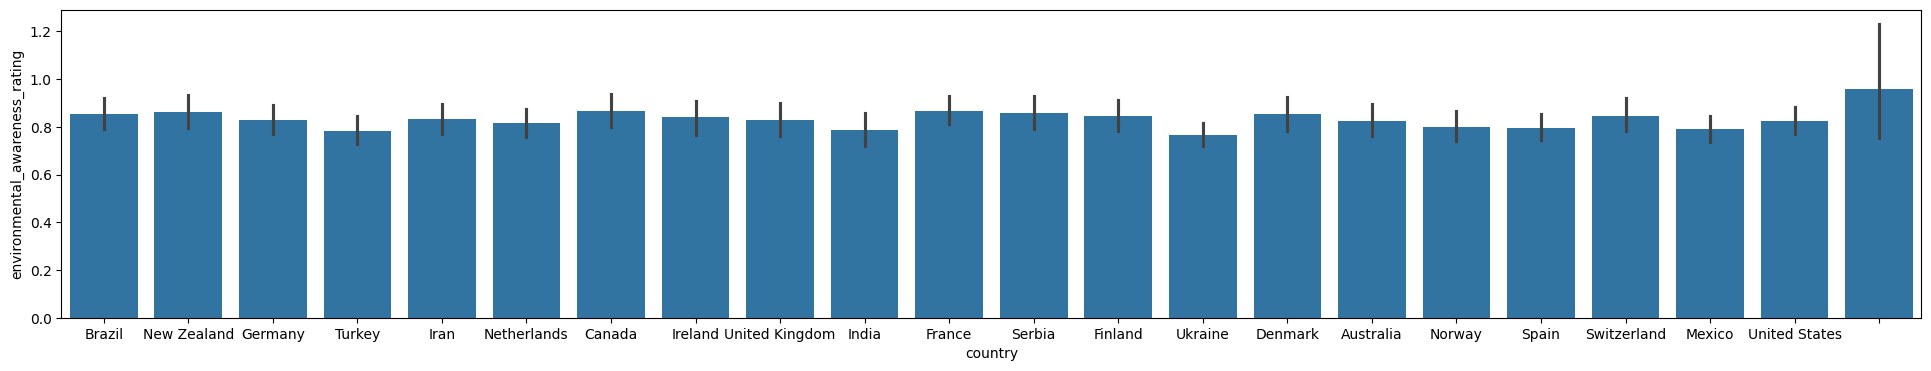

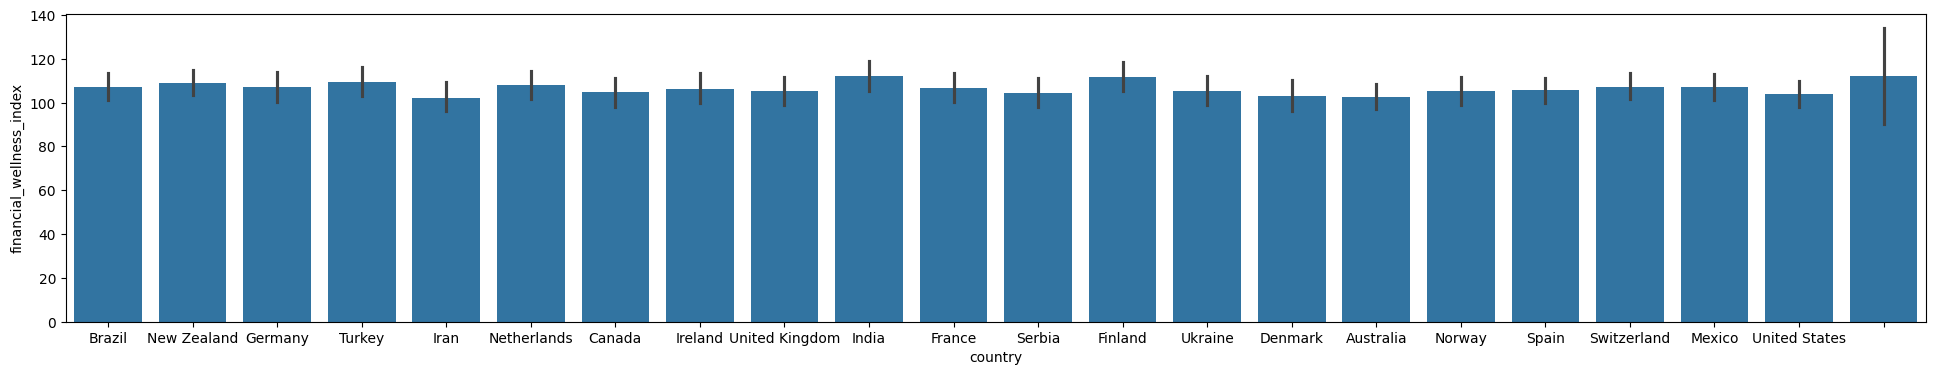

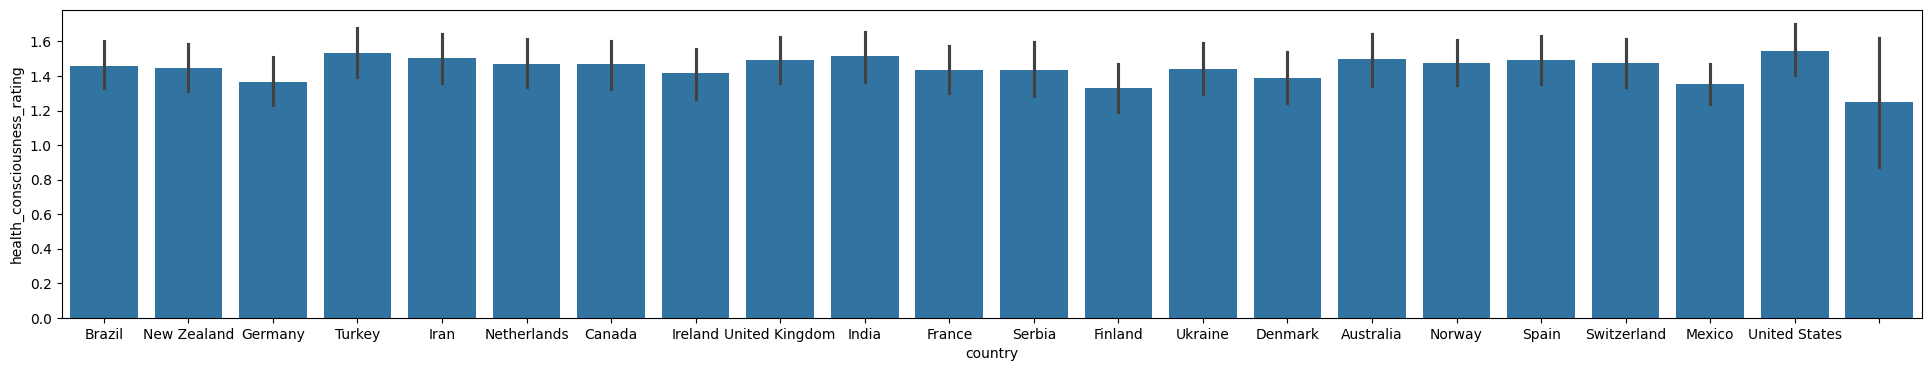

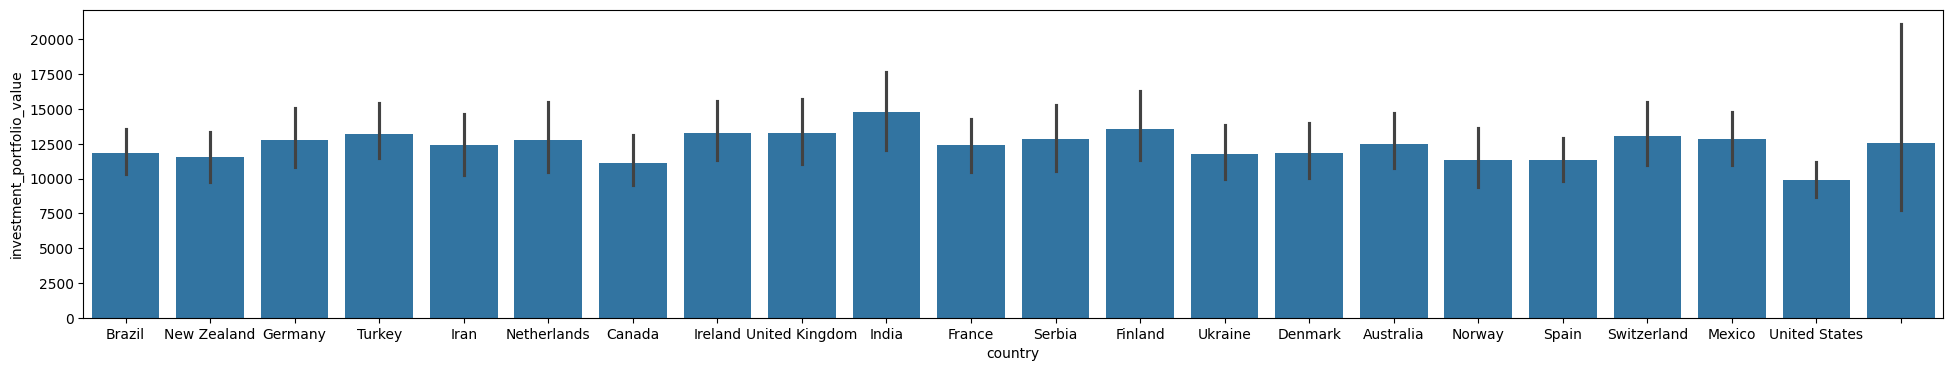

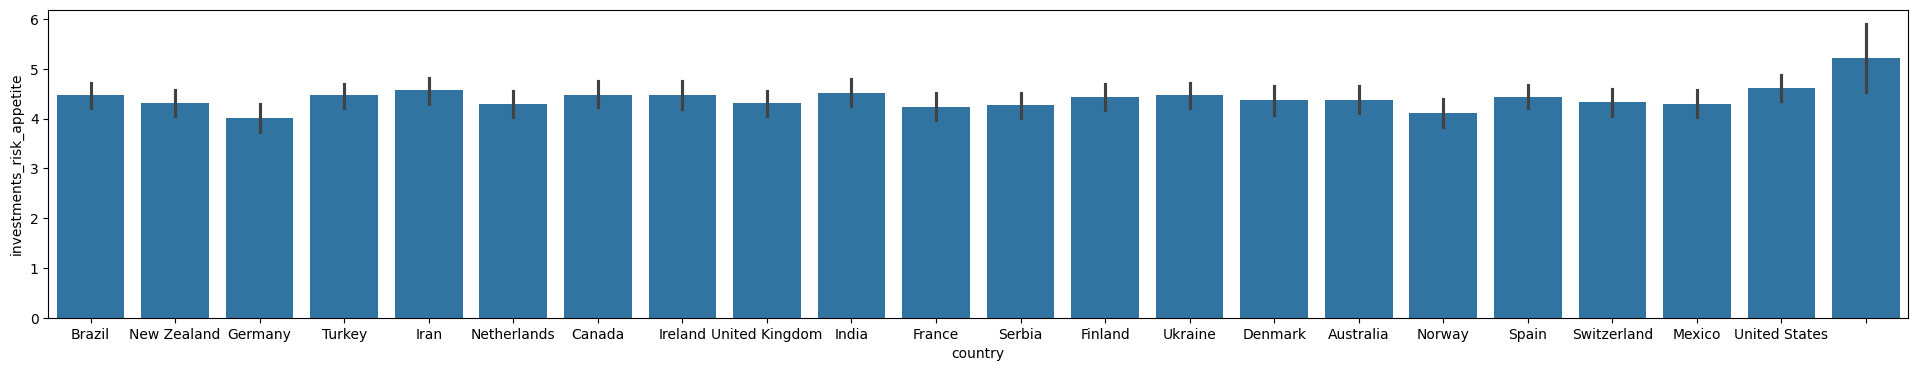

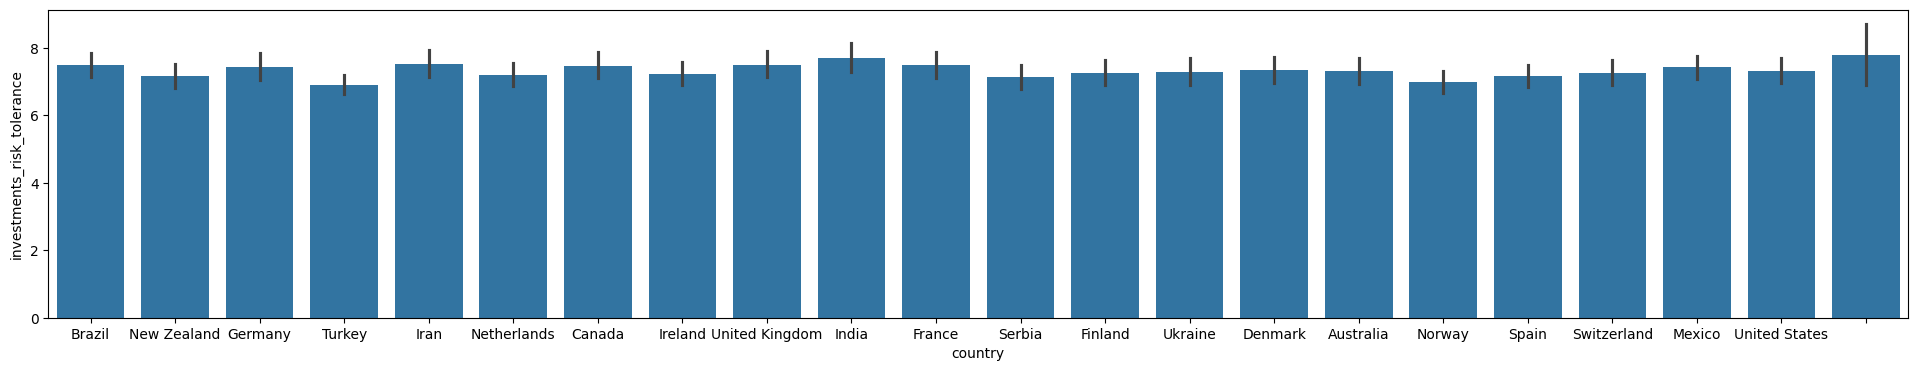

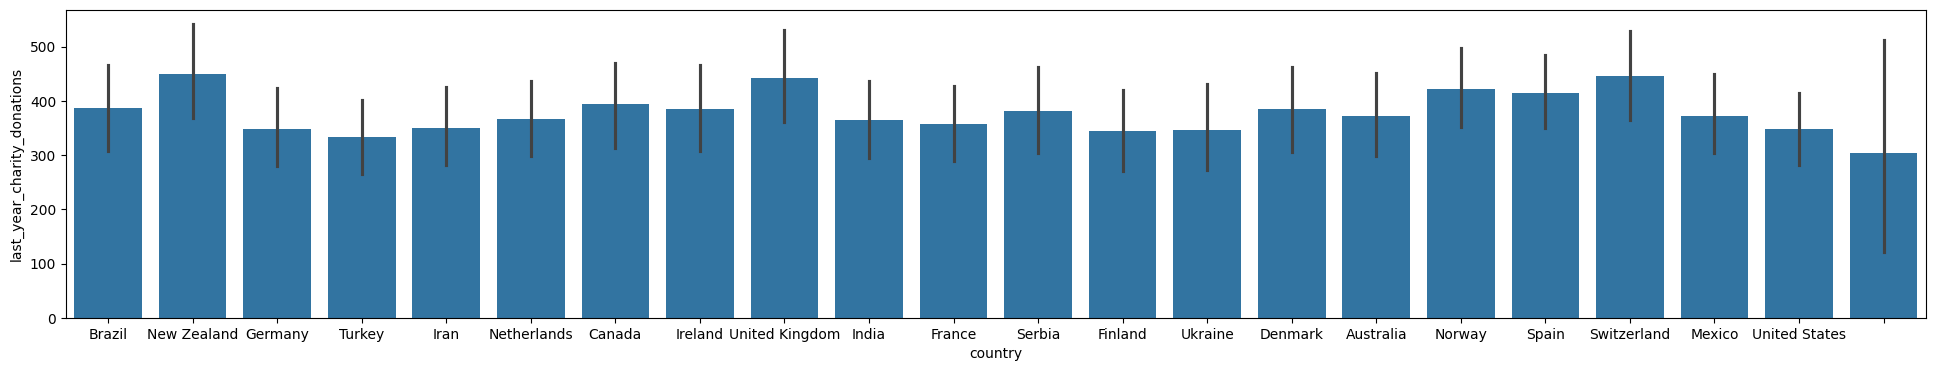

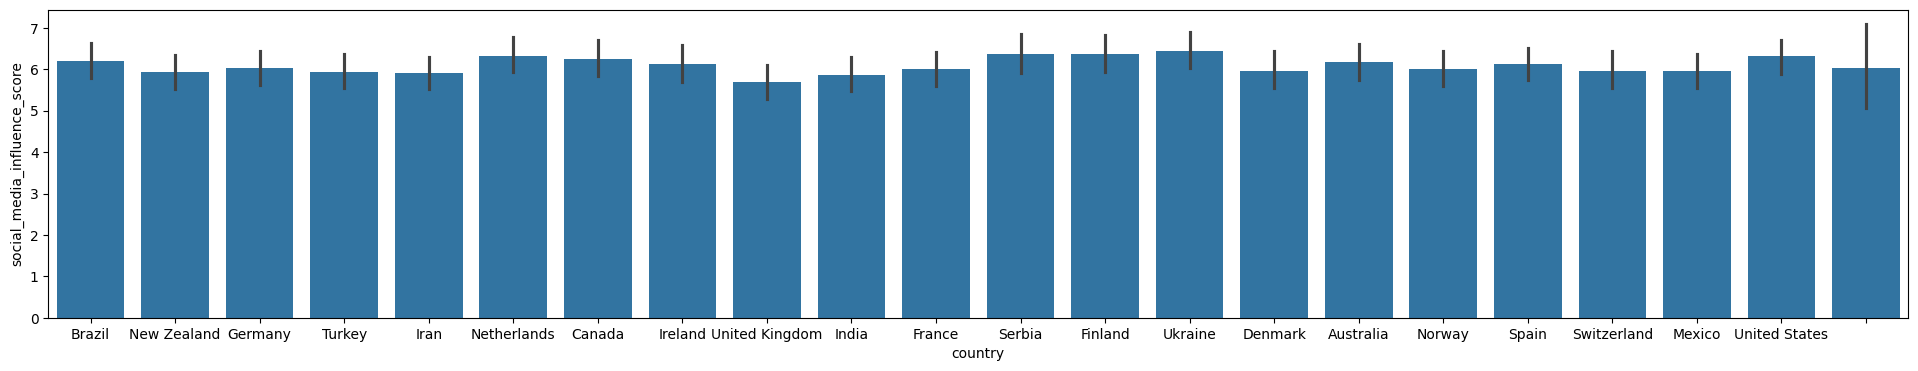

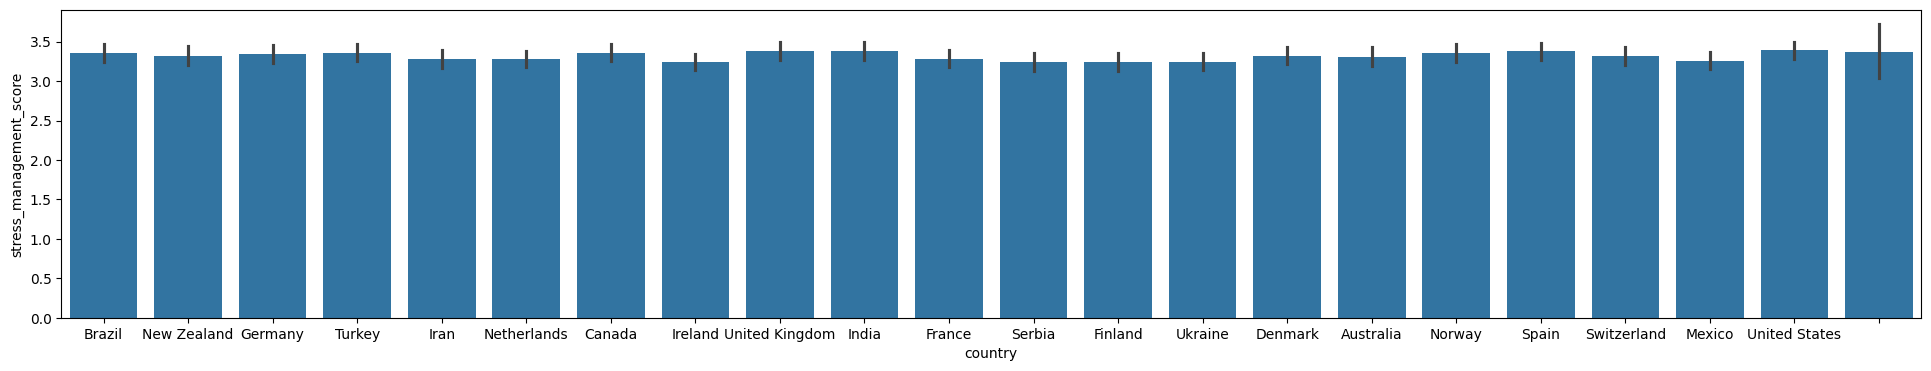

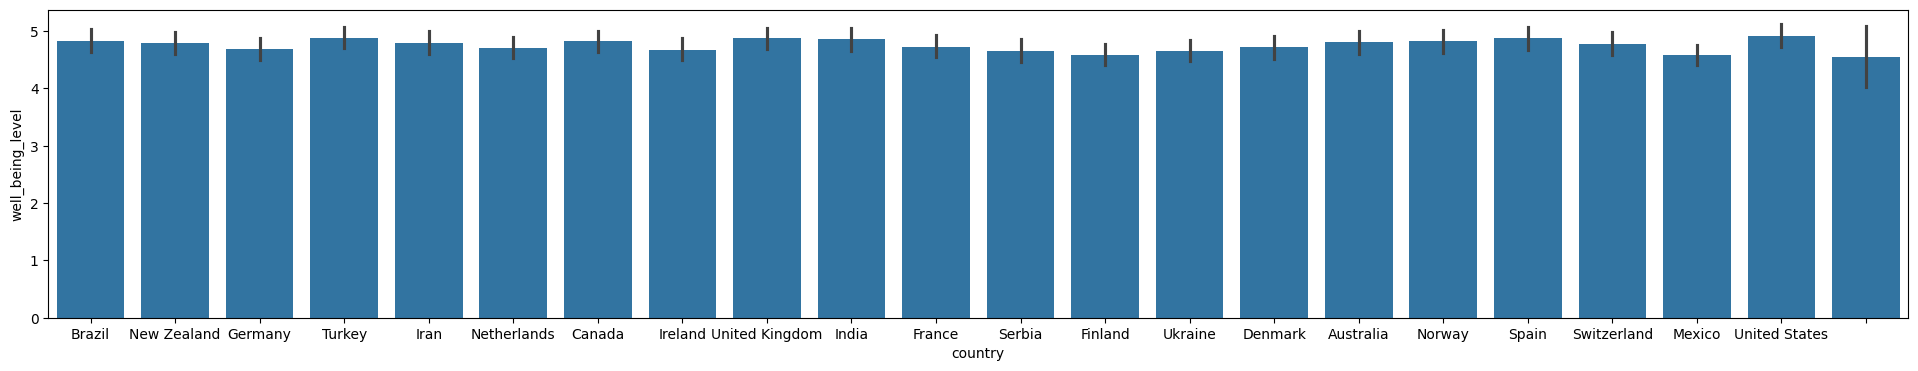

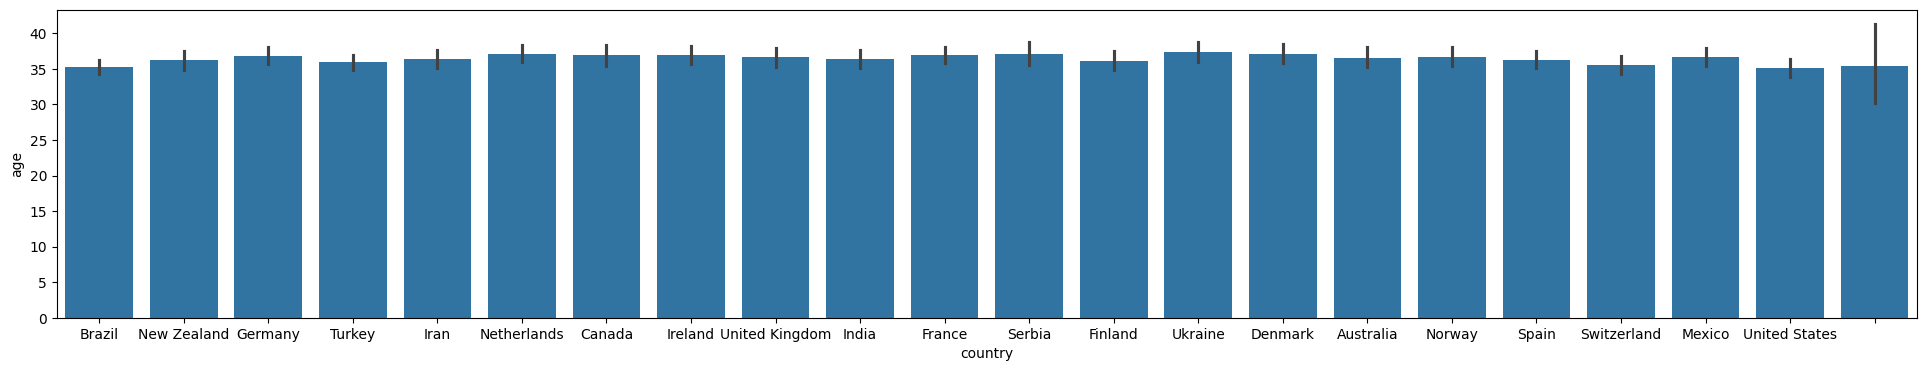

In [ ]:
for col in numerical_features:
  plt.figure(figsize=(24, 4))
  sns.barplot(x='country', y=col, data=df1)
  plt.show()

From this output we can see that, unexpectedly the mean value some feature such as avg_monthly_entertainment_expenses, education_level, financial_wellness_index, well_being_level grouped by 'country' is almost the same, although the economic and politic background of the countries analyzed is very different.
On the other hand, more differences are shown in other categories such as eco_consciousness_score, investment_portfolio_value and last_year_charity_donations

## Useful insights

### From summary statistics

In [ ]:
df1.describe(include = 'all').T

count unique               top  freq  \
avg_monthly_entertainment_expenses  8077.0    NaN               NaN   NaN   
avg_weekly_exercise_hours           8119.0    NaN               NaN   NaN   
citizen_id                          8327.0    NaN               NaN   NaN   
city                                  8327   3733          Tauranga    24   
country                               8327     22             Spain   446   
eco_consciousness_score             8119.0    NaN               NaN   NaN   
education_level                     8036.0    NaN               NaN   NaN   
environmental_awareness_rating      8294.0    NaN               NaN   NaN   
financial_wellness_index            8078.0    NaN               NaN   NaN   
health_consciousness_rating         8077.0    NaN               NaN   NaN   
investment_portfolio_value          8202.0    NaN               NaN   NaN   
investments_risk_appetite           8077.0    NaN               NaN   NaN   
investments_risk_tolerance          8160.0    NaN               NaN   NaN   
last_year_charity_donations         8202.0    NaN               NaN   NaN   
lifestyle                             8327      3  Health-Conscious  2795   
social_media_influence_score        8327.0    NaN               NaN   NaN   
stress_management_score             8034.0    NaN               NaN   NaN   
title                                 8327      4               Mr.  4034   
well_being_level                    8202.0    NaN               NaN   NaN   
age                                 8327.0    NaN               NaN   NaN   

                                            mean           std     min  \
avg_monthly_entertainment_expenses      21.59006     17.409831     0.0   
avg_weekly_exercise_hours               0.707644      1.186189 -5.5794   
citizen_id                                4164.0   2403.942179     1.0   
city                                         NaN           NaN     NaN   
country                                      NaN           NaN     NaN   
eco_consciousness_score                 0.131725      0.358699 -1.4167   
education_level                         6.282893      2.918705     0.0   
environmental_awareness_rating          0.827204       0.65063  0.0376   
financial_wellness_index              106.489905     64.306568   -0.05   
health_consciousness_rating              1.45305      1.395238     0.0   
investment_portfolio_value          12389.882139  21130.598331     0.0   
investments_risk_appetite               4.382051      2.646902     0.0   
investments_risk_tolerance               7.31923      3.701474  1.3937   
last_year_charity_donations           381.025652    764.584131     0.0   
lifestyle                                    NaN           NaN     NaN   
social_media_influence_score            6.093906      4.326703     0.0   
stress_management_score                 3.318334      1.113446  0.3192   
title                                        NaN           NaN     NaN   
well_being_level                        4.765718      1.933205  1.1376   
age                                     36.47376     13.178362     0.0   

                                         25%       50%        75%       max  
avg_monthly_entertainment_expenses    8.1283   11.9831    38.7573    135.42  
avg_weekly_exercise_hours             0.0224    0.1093    1.02375    8.7017  
citizen_id                            2082.5    4164.0     6245.5    8327.0  
city                                     NaN       NaN        NaN       NaN  
country                                  NaN       NaN        NaN       NaN  
eco_consciousness_score                  0.0    0.0078    0.02445    3.2475  
education_level                     4.031225   6.34465   8.559725    14.244  
environmental_awareness_rating      0.540925    0.6312   0.774475    7.4025  
financial_wellness_index            87.50485  99.82805   114.0485   458.451  
health_consciousness_rating           0.6861    0.8071     1.7662    10.053  
invest

From this output many insights are observable:
0. lifestyle is a string which is not statistically feasible to work with, thus we will convert it into values from 0 to 2. Additionally it has to be separated from the dataset to deal better with it.
1. environmental_awareness_rating and health_consciousness_rating should only admit values belonging to [0,10], then we will remove everything outside such interval
2. features as avg_monthly_entertainment_expenses, avg_weekly_exercise_hours, educational level, last_year_charity_donations should not admit negative values, then we will remove such invalid values
3. the feature title assumes 4 different outcomes and we think that knowing if a citizen is a Mrs or a Ms is not that relevant for our goals, hence we will encode the column through a binary variable

In [ ]:
# Number of unique cities
print((df1['city'].value_counts() == 1).sum())

2305


Another insight observable from the last two outputs is
4. on 3733 different values assumed by 'city', 2305 of them appear only once (sometimes due to a clear error of spelling). Moreover, many of the cities which appear more than once are clearly wrong, for instance the mode of 'country'=='Germany' is '?', which represents a big problem in order to give value to the feature and to spot all these errors. Hence, since the majority of the values assumed by the feature are not statistically relevant (compared to our sample) and for the second reason as well, we decide to drop the entire feature.

Furthermore, we verify that the citizen_id is unique for each individual (as it should be according to the dataset owner)

In [ ]:
print(df1['citizen_id'].duplicated().sum())

0


As expected there are not duplicated citizen_id, which implies none row is duplicated.
Then we do not need to remove any rows and we can
5. set citizen_id as the index of the dataframe

### From data visualization

By these representations we understand how to develop the data preprocessing phase of our workflow; in particular we will go through some issues as:
6. the distributions of the variables
7. many features present outliers
8. many features have missing values

9. the correlation maps show high correlation between health_consciousness_rating and well_being_level and between well_being_level and stress_management_score; since health_consciousness_rating and stress_management_score are barely correlated, in order to have not redundant information for our final target we could decide to drop the feature well_being_level. However, we believe such feature can still provide us some useful and interesting insights, hence we will keep it for now. More importantly, we have to note that the pearson correlation (which is the one that shows higher correlation) assumes the normality of the distributions, which actually is not respected by, for instance, health_consciousness_rating hence we should rely more on the spearman's one.
No other evident correlations are shown.

10. The computation of the new variable 'age' allows us to see some evident outliers (which are so incoherent to be more likely invalid values than proper outliers). In the next paragraph we will consider them as invalid values, hence removing them.

Since the boxplots and the histograms clearly show us that every feature is almost unique, we have to study column by column our dataframe in order to deal with their own characteristics (such as distribution, outliers and missing value) in the best possible way.
We will face this issue in the following step of our project.

# Unsupervised Learning

## Data Preprocessing

### Set index

Let's start dealing with the insight 5. :

In [ ]:
# Insight 5.
# Setting id as index
df1.set_index('citizen_id', inplace=True)

In [ ]:
df1.head().T

citizen_id                                         1            2  \
avg_monthly_entertainment_expenses             8.873      10.9348   
avg_weekly_exercise_hours                        0.0       0.1298   
city                                          Palmas        Taupo   
country                                       Brazil  New Zealand   
eco_consciousness_score                          0.0          0.0   
education_level                               5.5454        4.915   
environmental_awareness_rating                0.5576       0.5998   
financial_wellness_index                     264.346      209.972   
health_consciousness_rating                    0.865          NaN   
investment_portfolio_value                     131.3          0.0   
investments_risk_appetite                     6.7866       7.2836   
investments_risk_tolerance                    22.955      17.0296   
last_year_charity_donations                      0.0          0.0   
lifestyle                           Health-Conscious     Investor   
social_media_influence_score                  2.6469       2.1466   
stress_management_score                       3.0448       1.8311   
title                                            Ms.         Mrs.   
well_being_level                              3.9098       4.4571   
age                                               43           35   

citizen_id                                         3                 4  \
avg_monthly_entertainment_expenses           29.9206           36.0014   
avg_weekly_exercise_hours                     0.1129            0.0419   
city                                           Nauen             Kusel   
country                                      Germany           Germany   
eco_consciousness_score                          0.0            0.0134   
education_level                               9.4307            8.5129   
environmental_awareness_rating                0.6302            0.6066   
financial_wellness_index                     21.6053           87.0453   
health_consciousness_rating                   0.4199            0.7646   
investment_portfolio_value                    5124.4            6127.3   
investments_risk_appetite                       4.18            7.1364   
investments_risk_tolerance                    3.9274            6.0943   
last_year_charity_donations                      0.0             113.2   
lifestyle                           Health-Conscious  Health-Conscious   
social_media_influence_score                 10.2169            4.9333   
stress_management_score                       3.9353               NaN   
title                                            Ms.               Mr.   
well_being_level                              4.3552            5.7737   
age                                               53                43   

citizen_id                                           5  
avg_monthly_entertainment_expenses              6.0075  
avg_weekly_exercise_hours                       1.2697  
city                                              Rize  
country                                         Turkey  
eco_consciousness_score                            0.0  
education_level                                 6.0902  
environmental_awareness_rating                  1.1385  
financial_wellness_index                       95.4032  
health_consciousness_rating                     0.2287  
investment_portfolio_value                      6214.0  
investments_risk_appetite                       4.3797  
investments_risk_tolerance                      3.1951  
last_year_charity_donations                        0.0  
lifestyle                           Fitness Enthusiast  
social_media_influence_score                    8.2687  
stress_management_score                         2.2987  
title                                              Mr.  
well_being_level                                2.5274  
age                                                 28

### Data cleaning

In this section we will deal with all the incoherences firstly and secondly with outliers and missing values analyzing feature by feature

#### Incoherencies

And now we proceed with insights 1., 2. and 10. :

In [ ]:
# Insight 1.
# Remove invalid values

cols = ["health_consciousness_rating", "environmental_awareness_rating"]
for col in cols:
    df1.loc[~df1[col].between(0,10), col] = float("nan")

In [ ]:
# Insight 2.
# Remove invalid values
cols = ['avg_monthly_entertainment_expenses', 'avg_weekly_exercise_hours', 'education_level', 'last_year_charity_donations']
for col in cols:
    df1.loc[df1[col] < 0, col] = float("nan")

In [ ]:
# Insight 10.
# Remove invalid age
df1.loc[(df1['age'] < 3) | (df1['age'] > 112), 'age'] = float("nan")

#### Outliers and missing values

Now let's deal, featuer by feature, with issues 6., 7. and 8. :

In [ ]:
# Creation of a copy of the dataset after the previous changes, regarding data types ecc..., which will contain all the features AFTER, if necessary, a transformation
df1t = df1.copy()

##### Functions

Transformations

In [ ]:
def log_transform(df, column):
  df[column] = np.log(df[column])
  df[column] = df[column].replace(-np.inf, np.nan)

In [ ]:
def log1p_transform(df, column):
  df[column] = np.log1p(df[column])
  df[column] = df[column].replace(-np.inf, np.nan)

In [ ]:
def sqrt_transform(df, column):
  df[column] = np.sqrt(df[column])
  df[column] = df[column].replace(-np.inf, np.nan)

In [ ]:
def cube_root_transform(df, column):
    df[column] = np.cbrt(df[column])

Outliers analysis, replacement and removal

In [ ]:
def percent_outliers_by_bounds(series, lower_bound, upper_bound):
    total = len(series)
    outliers = ((series < lower_bound) | (series > upper_bound)).sum()
    return (outliers / total) * 100

In [ ]:
def percent_outliers_by_zscore(series, threshold=3.0):
    z_scores = (series - series.mean()) / series.std()
    outliers = (np.abs(z_scores) > threshold).sum()
    perc = (outliers / len(series)) * 100
    print(f'The percentage of outliers calculated through z-score is: {perc}%')

In [ ]:
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[column].median()

    df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = median

In [ ]:
def remove_outliers_iqr(df, column, multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    mask = (df[column] < lower_bound) | (df[column] > upper_bound)
    df.loc[mask, column] = np.nan

In [ ]:
def remove_outliers_iqr_3(df, column, multiplier=3):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    mask = (df[column] < lower_bound) | (df[column] > upper_bound)
    df.loc[mask, column] = np.nan

In [ ]:
def remove_outliers_by_bounds(df, column, lower_bound, upper_bound):
    mask = (df[column] < lower_bound) | (df[column] > upper_bound)
    df.loc[mask, column] = np.nan

Missing values

In [ ]:
def fill_missing_values_with_median(df, column):
    df[column].fillna(df[column].median(), inplace=True)

In [ ]:
def fill_missing_values_with_knn(df, target_feature, n=5):

    # Apply KNN Imputer
    imputer = KNNImputer(n_neighbors=n)
    imputed_data = imputer.fit_transform(df)

    # Convert back to DataFrame
    imputed_df = pd.DataFrame(imputed_data, columns=df.columns, index=df.index)

    # Replace only the target feature in the original DataFrame
    df[target_feature] = imputed_df[target_feature]

In [ ]:
def fill_missing_values_with_regression(df, feature1, feature2):

    # Drop rows where either feature is missing
    valid_rows = df[[feature1, feature2]].dropna()

    # Train linear regression on non-missing rows
    X_train = valid_rows[[feature2]].values
    y_train = valid_rows[feature1].values

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Find rows where feature1 is missing but feature2 is present
    missing_rows = df[df[feature1].isna() & df[feature2].notna()]

    if not missing_rows.empty:
        X_missing = missing_rows[[feature2]].values
        predicted_values = model.predict(X_missing)

        # Fill the missing values in the original DataFrame
        df.loc[missing_rows.index, feature1] = predicted_values

    return analyze_column(df, feature1)

##### avg_monthly_entertainment_expenses

Feature: avg_monthly_entertainment_expenses
  - Missing values: 250
  - Outlier percentage: 0.61%
  - Skewness: 1.2545902636981403
  - Kurtosis: 2.130840607434967
  - Other info:
count    8077.000000
mean       21.590060
std        17.409831
min         0.000000
25%         8.128300
50%        11.983100
75%        38.757300
max       135.420000
Name: avg_monthly_entertainment_expenses, dtype: float64



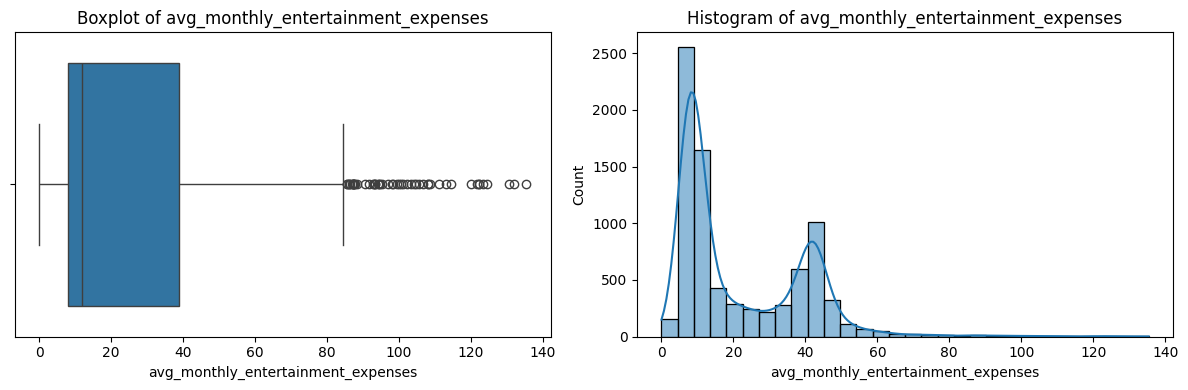

In [ ]:
# Let's get closer to the feature by a brief description, boxplot and histogram of avg_monthly_entertainment_expenses
analyze_column(df1,'avg_monthly_entertainment_expenses')

Considerations:
- two evident peaks are observable
- a very low outliers percentage (0.61%) suggests us to remove them in order to use, next, some algorithms sensitive to outliers
- the distribution is right skewed
- is not similar to a normal distribution
- some missing values are present

None transformation can reveal useful in this case, then we will keep the feature as it is (removing the outliers and filling the missing values) hoping that the two peaks will be useful to identify different clusters.

<Axes: xlabel='avg_monthly_entertainment_expenses', ylabel='stress_management_score'>

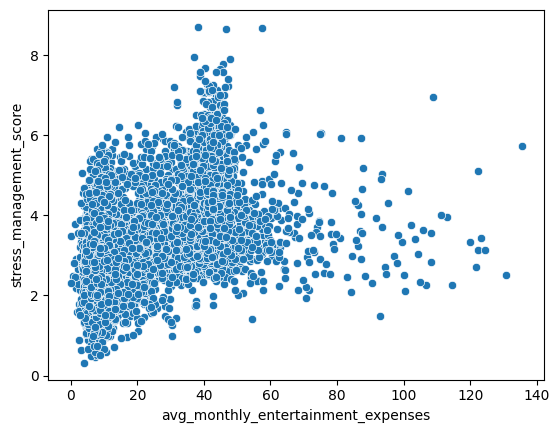

In [ ]:
# Scatterplot between avg_monthly_entertainment_expenses and stress_management_score
sns.scatterplot(x='avg_monthly_entertainment_expenses', y='stress_management_score', data=df1)

Although we observe from both correlation maps (from data visualization) that the correlation of avg_monthly_entertainment_expenses with stress_management_score is not irrelevant (47%), and because from the scatterplot none clear pattern is observable, we think it is not enough to make the linear regression method the best way to deal with outliers and missing values.
Hence, even for this reason, we prefer to apply the KNN method with 5 neighbours in order to fill the missing values in a better way rather than, for instance, assigning the median value to all of them; indeed it could exagerately increase the gap between the two observable spikes.

In [ ]:
# Remove values outside the interquartile range
remove_outliers_iqr(df1t, 'avg_monthly_entertainment_expenses')

Feature: avg_monthly_entertainment_expenses
  - Missing values: 301
  - Outlier percentage: 0.02%
  - Skewness: 0.8230856531601363
  - Kurtosis: -0.543291155402013
  - Other info:
count    8026.000000
mean       21.081810
std        16.214444
min         0.000000
25%         8.110100
50%        11.883350
75%        38.419325
max        84.465700
Name: avg_monthly_entertainment_expenses, dtype: float64



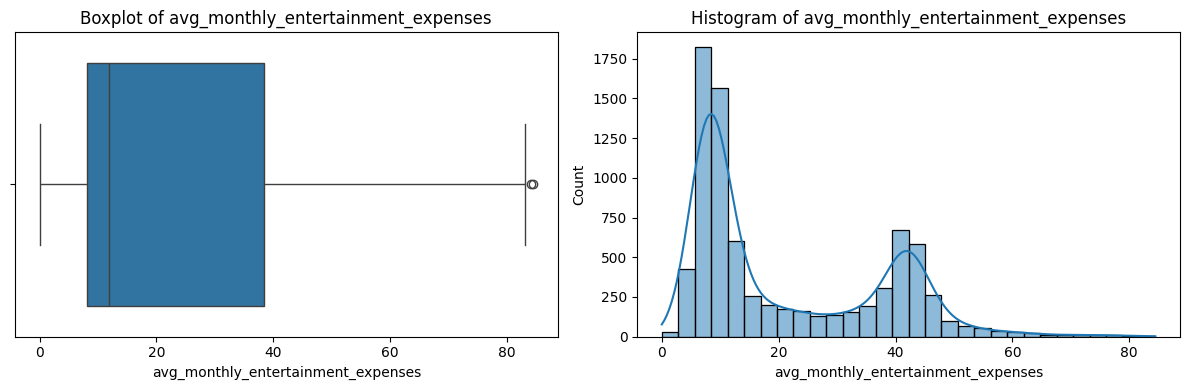

In [ ]:
# Visualize the feature after the remotion of outliers
analyze_column(df1t, 'avg_monthly_entertainment_expenses')

Now, in order to fill the missing values we note that the KNN method is based on Euclidean distance which is sensitive to scaling.
For this reason we wait to scale our data before computing the missing values.

In [ ]:
# Let's add avg_monthly_entertainment_expenses to a list of features to be filled through KNN
knn_cols = ['avg_monthly_entertainment_expenses']

##### avg_weekly_exercise_hours

Feature: avg_weekly_exercise_hours
  - Missing values: 370
  - Outlier percentage: 8.90%
  - Skewness: 1.964866945582094
  - Kurtosis: 3.731641822770154
  - Other info:
count    7957.000000
mean        0.740882
std         1.161965
min         0.000000
25%         0.026800
50%         0.116900
75%         1.065000
max         8.701700
Name: avg_weekly_exercise_hours, dtype: float64



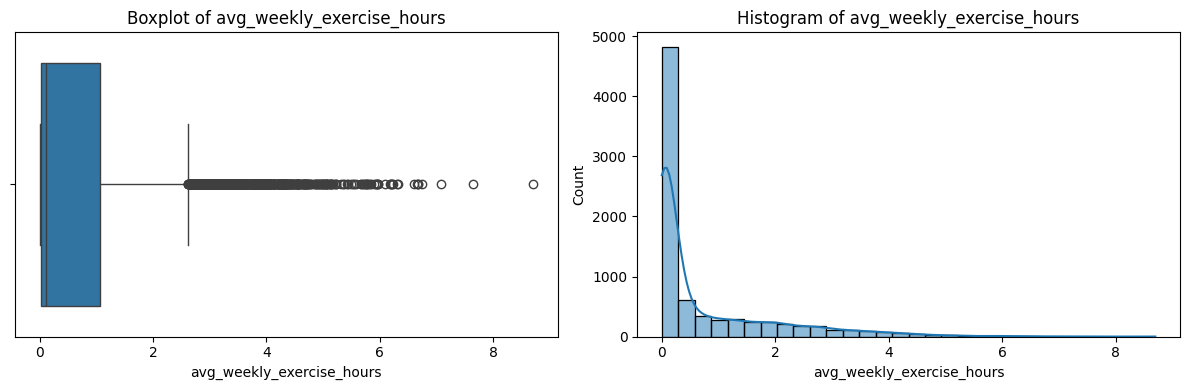

In [ ]:
# Let's get closer to the feature by a brief description, boxplot and histogram of avg_weekly_exercise_hours
analyze_column(df1,'avg_weekly_exercise_hours')

Considerations:
- the outliers percentage is too high (8.90%) to simply remove them
- the distribution is highly skewed
- is not similar to a normal distribution
- some missing values are present

Hence we proceed, mainly in order to reduce the OL percentage, through some of the following transformations.
In particular we avoid to make the log-transformation since lots of outcomes are 0 and, after an hypothetical log-transformation, they would completely change the coherence of our feature

Feature: avg_weekly_exercise_hours
  - Missing values: 370
  - Outlier percentage: 0.44%
  - Skewness: 0.9977757459315472
  - Kurtosis: -0.10081220280642311
  - Other info:
count    7957.000000
mean        0.610628
std         0.606681
min         0.000000
25%         0.163707
50%         0.341906
75%         1.031988
max         2.949864
Name: avg_weekly_exercise_hours, dtype: float64



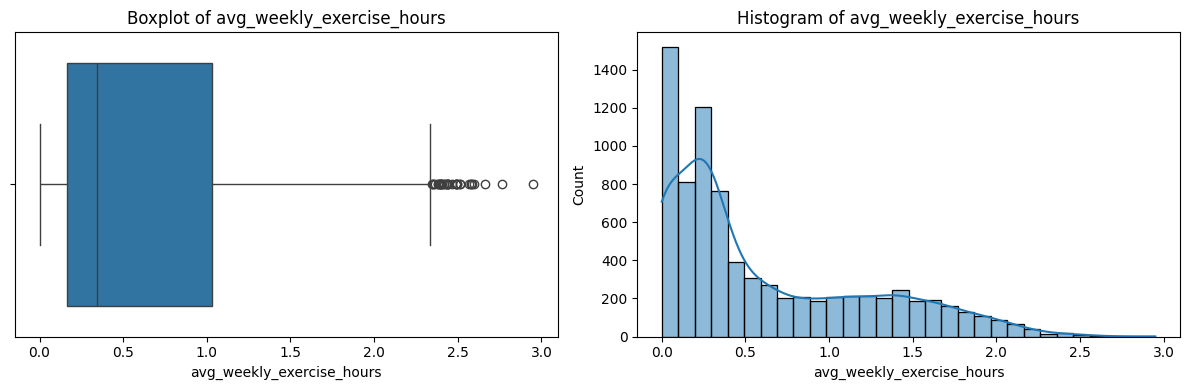

In [ ]:
# Square root transformation
df1t_proof = df1t.copy()
sqrt_transform(df1t_proof, 'avg_weekly_exercise_hours')
analyze_column(df1t_proof, 'avg_weekly_exercise_hours')

Feature: avg_weekly_exercise_hours
  - Missing values: 370
  - Outlier percentage: 0.00%
  - Skewness: 0.5052838977083639
  - Kurtosis: -0.7932588812742685
  - Other info:
count    7957.000000
mean        0.629115
std         0.480573
min         0.000000
25%         0.299257
50%         0.488958
75%         1.021213
max         2.056844
Name: avg_weekly_exercise_hours, dtype: float64



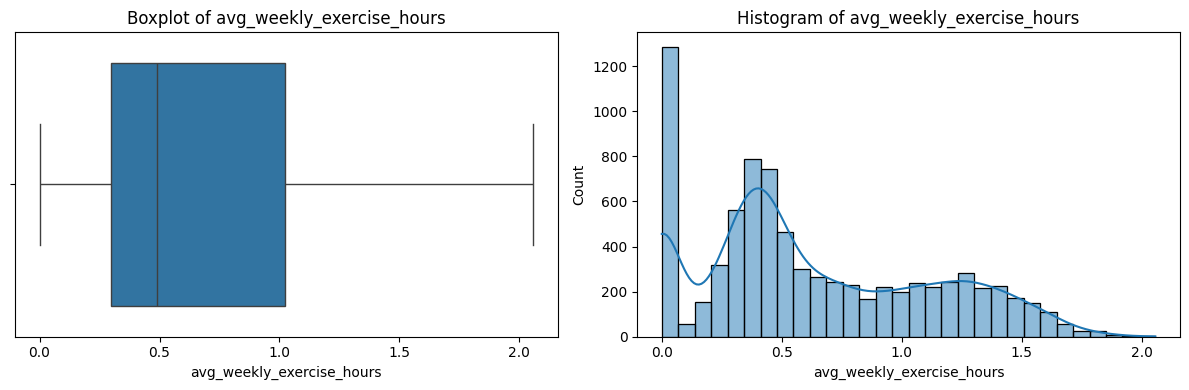

In [ ]:
# Cube root transformation
cube_root_transform(df1t, 'avg_weekly_exercise_hours')
analyze_column(df1t, 'avg_weekly_exercise_hours')

Conclusions: both transformation have changed the feature in a better version with much less outliers. In particular:
- the cube root transformation highlights two or three different groups (which maybe could help us to identify two or three different clusters): the ones who do not train at all, the ones who are used to train a little and the ones who train a lot
- on the other hand, the square root transformation is more consistent, and does not show a big gap between two spikes. Nevertheless for the reason given we prefer to keep the feature after the cube root transformation

Lastly, since the feature is pretty skewed we prefer to avoid to use the median method to fill the missing values. Moreover, no pattern of correlation are clearly observable, hence we decide to use the KNN method for such goal: as the previous case we will do that after having scaled the data.

In [ ]:
# Let's add avg_weekly_exercise_hours to the list of features to be filled through KNN
knn_cols.append('avg_weekly_exercise_hours')

##### eco_consciousness_score

Feature: eco_consciousness_score
  - Missing values: 208
  - Outlier percentage: 16.63%
  - Skewness: 3.211392610279207
  - Kurtosis: 10.341563311709166
  - Other info:
count    8119.000000
mean        0.131725
std         0.358699
min        -1.416700
25%         0.000000
50%         0.007800
75%         0.024450
max         3.247500
Name: eco_consciousness_score, dtype: float64



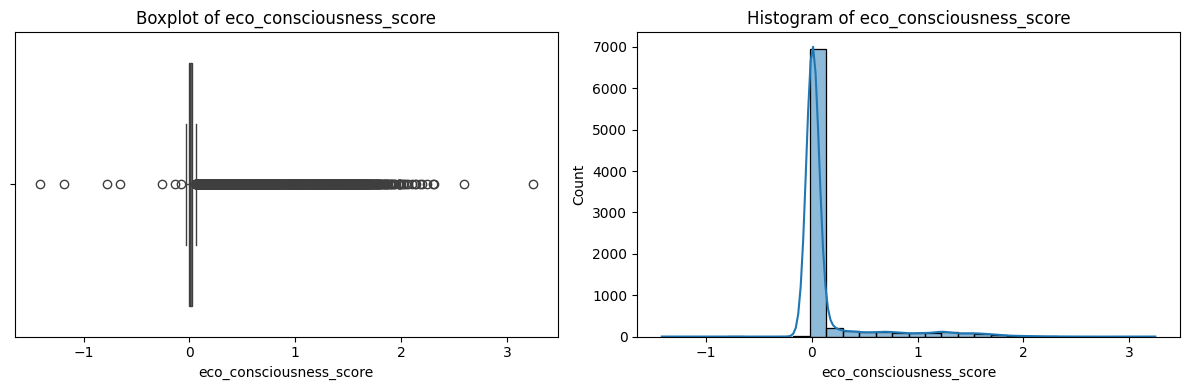

In [ ]:
# Let's get closer to the feature by a brief description, boxplot and histogram of eco_consciousness_score
analyze_column(df1,'eco_consciousness_score')

Considerations:
- firstly we note that the standard deviation is very low (0.359) but, since the feature takes values between -1.42 and 3.25 (which means the interval is pretty short), we cannot state that the feature is considerably deterministic, hence we will not remove it
- the outliers percentage is too high (16.6%) to simply remove them
- the distribution is heavily right skewed
- is more similar to the density function of an exponential random variable with a low mean rather than a very platykurtic normal distribution
- some missing values are present

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Feature: eco_consciousness_score
  - Missing values: 239
  - Outlier percentage: 13.53%
  - Skewness: 2.323241682822751
  - Kurtosis: 4.500491102554909
  - Other info:
count    8088.000000
mean        0.188778
std         0.311764
min         0.000000
25%         0.000000
50%         0.088882
75%         0.156844
max         1.802082
Name: eco_consciousness_score, dtype: float64



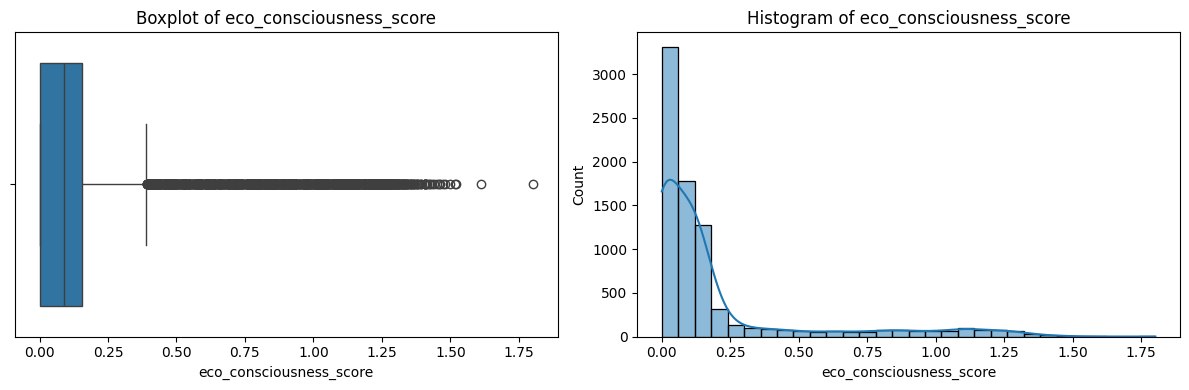

In [ ]:
# Square root transformation
# We are aware that 31 values of the features are negative (becoming missing values after the transformation), nevertheless we believe the sqrt is the transformation which better fits the feature and we can afoord to add 31 nan to our dataframe
sqrt_transform(df1t, 'eco_consciousness_score')
analyze_column(df1t, 'eco_consciousness_score')

In [ ]:
# Percentage of outliers through z-score
percent_outliers_by_zscore(df1t['eco_consciousness_score'])

The percentage of outliers calculated through z-score is: 3.4706376846403266%


After the transformation many data out of the interquartile range are kept (13.5%); keeping that in mind, we observe that only 3.5% of the data are considered outliers through the z-score, hence we decide to keep the majority of them because consistent for the feature. We proceed only dropping the more extreme ones as follows:

In [ ]:
# Remove only extreme outliers
remove_outliers_by_bounds(df1t, 'eco_consciousness_score', 0, 1.5)

Lastly, since the feature is considerably skewed we prefer to avoid to use the median method to fill the missing values. Moreover, no pattern of correlation are clearly observable, hence we decide to use the KNN method for such goal: as the previous case we will do that after having scaled the data.

In [ ]:
# Let's add eco_consciousness_score to the list of features to be filled through KNN
knn_cols.append('eco_consciousness_score')

##### education_level

Feature: education_level
  - Missing values: 291
  - Outlier percentage: 0.00%
  - Skewness: -0.05012392225695559
  - Kurtosis: -0.7901519202864922
  - Other info:
count    8036.000000
mean        6.282893
std         2.918705
min         0.000000
25%         4.031225
50%         6.344650
75%         8.559725
max        14.244000
Name: education_level, dtype: float64



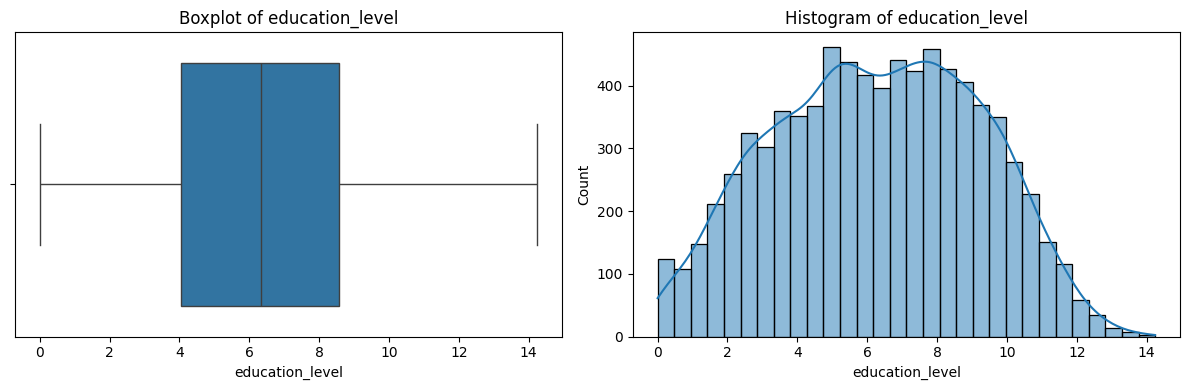

In [ ]:
# Let's get closer to the feature by a brief description, boxplot and histogram of education_level
analyze_column(df1,'education_level')

Conclusions:
since there are no outliers and the distribution is very similar to a normal  almost without skew, even though platykurtic, we keep untransformed the feature. Hence, we simply proceed computing the missig values with the KNN method: indeed, although his skew is almost null we think the mentioned method works better then the median one because assigning only one value to 291 missing values would consistently modify the structure of the distribution with a not irrelevant spike.

In [ ]:
# Let's add education_level to the list of features to be filled through KNN
knn_cols.append('education_level')

##### environmental_awareness_rating

Feature: environmental_awareness_rating
  - Missing values: 33
  - Outlier percentage: 13.97%
  - Skewness: 3.7251729673680214
  - Kurtosis: 17.781731634225356
  - Other info:
count    8294.000000
mean        0.827204
std         0.650630
min         0.037600
25%         0.540925
50%         0.631200
75%         0.774475
max         7.402500
Name: environmental_awareness_rating, dtype: float64



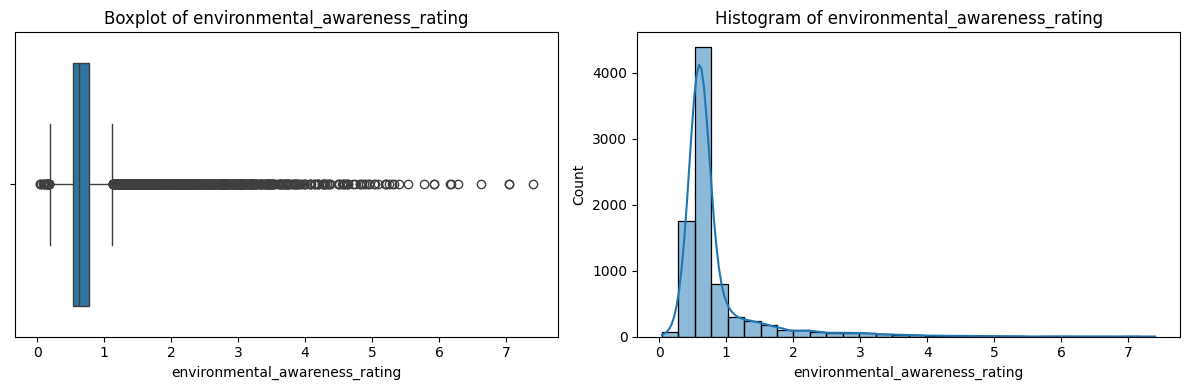

In [ ]:
# Let's get closer to the feature by a brief description, boxplot and histogram of environmental_awareness_rating
analyze_column(df1,'environmental_awareness_rating')

Considerations:
- the distribution is right skewed
- is not very distant to be similar to a normal distribution, but a transformation is needed
- few missing values are present

Hence we proceed, mainly in order to reduce the OL percentage and the skewness of the feature, through the log transformation.
We think the result can satisfy our wishes since no values are less or equal to 0  and the skew is on the right.

Feature: environmental_awareness_rating
  - Missing values: 33
  - Outlier percentage: 12.63%
  - Skewness: 1.3940532265451926
  - Kurtosis: 3.2680497829449155
  - Other info:
count    8294.000000
mean       -0.347699
std         0.494665
min        -3.280751
25%        -0.614475
50%        -0.460133
75%        -0.255570
max         2.001818
Name: environmental_awareness_rating, dtype: float64



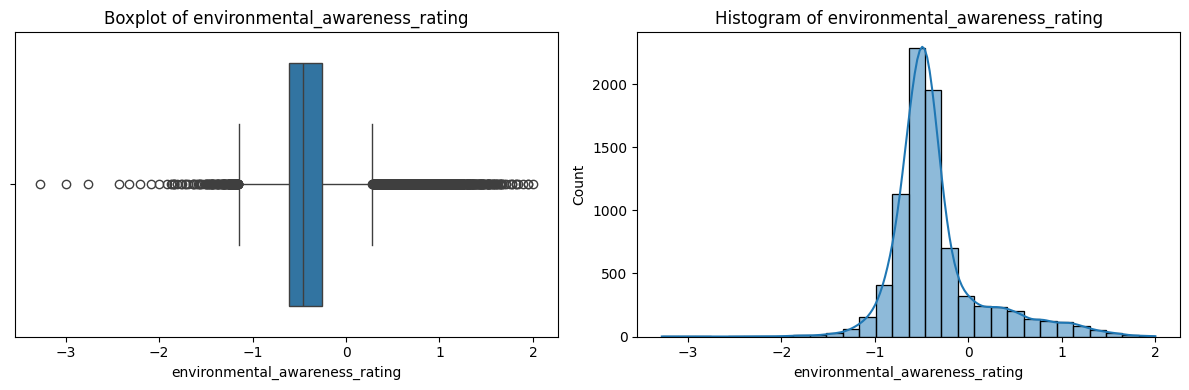

In [ ]:
log_transform(df1t, 'environmental_awareness_rating')
analyze_column(df1t, 'environmental_awareness_rating')

In [ ]:
# Percentage of outliers through z-score
percent_outliers_by_zscore(df1t['environmental_awareness_rating'])

The percentage of outliers calculated through z-score is: 2.185661102437853%


Once transformed the distribution is much more similar to a normal distribution, indeed both skewness and kurtosis got closer to 0, and the percentage of outliers showed by the z-score is less than 2.2%.
For this reason we are satisfy from the transformation and we proceed removing only the most extreme outliers as follows:

Feature: environmental_awareness_rating
  - Missing values: 426
  - Outlier percentage: 9.96%
  - Skewness: 0.9504984550384931
  - Kurtosis: 1.662657523831403
  - Other info:
count    7901.000000
mean       -0.414207
std         0.367330
min        -1.639382
25%        -0.620640
50%        -0.471765
75%        -0.301511
max         0.820528
Name: environmental_awareness_rating, dtype: float64



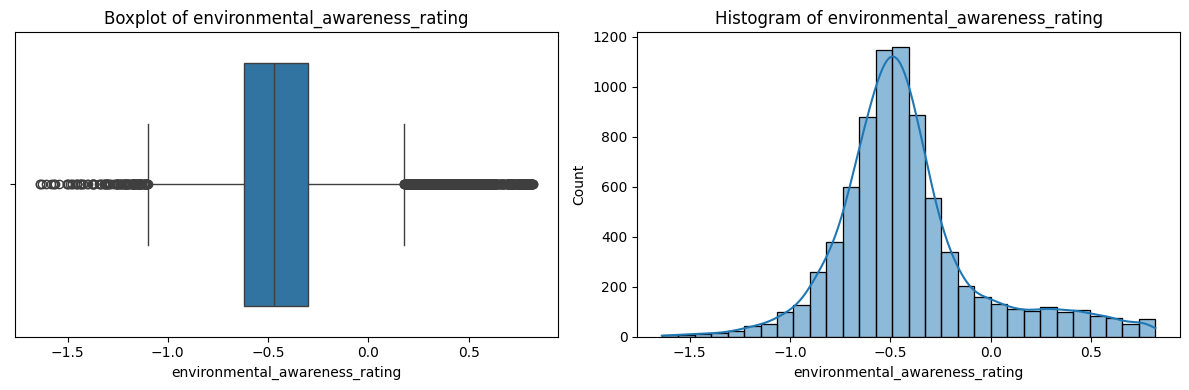

In [ ]:
# Remove only teh extreme values
remove_outliers_iqr_3(df1t, 'environmental_awareness_rating')
analyze_column(df1t, 'environmental_awareness_rating')

We end the considerations dealing with the few missing values of the feature: in particular since they are only 42 (after having removed the outliers) and since the distribution is barely skewed we think that filling the missing values with the median is a good way to deal with them without generating too much bias:

<ipython-input-49-57e71d11ab46>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


Feature: environmental_awareness_rating
  - Missing values: 0
  - Outlier percentage: 10.92%
  - Skewness: 0.9984078372718486
  - Kurtosis: 1.9341787002578905
  - Other info:
count    8327.000000
mean       -0.417152
std         0.358034
min        -1.639382
25%        -0.611199
50%        -0.471765
75%        -0.313479
max         0.820528
Name: environmental_awareness_rating, dtype: float64



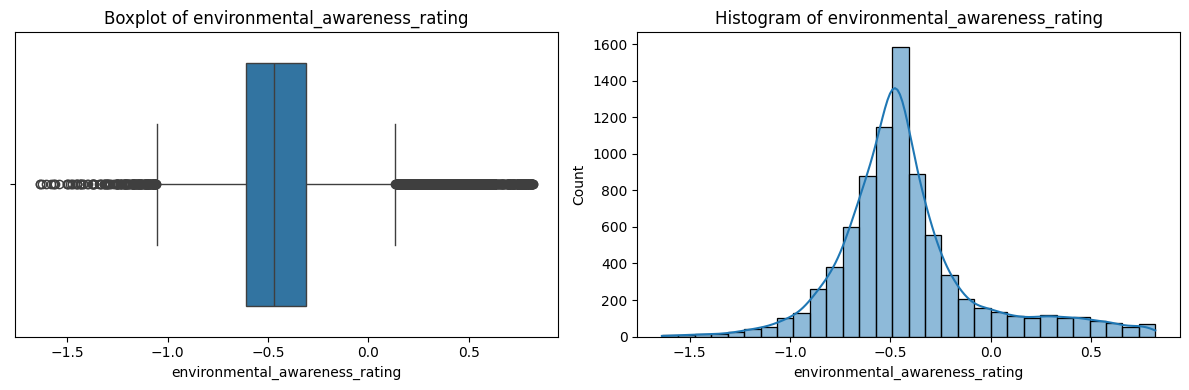

In [ ]:
# Fill the missing values with the median of environmental_awareness_rating, and visualize the updated feature
fill_missing_values_with_median(df1t, 'environmental_awareness_rating')
analyze_column(df1t, 'environmental_awareness_rating')

##### financial_wellness_index

Feature: financial_wellness_index
  - Missing values: 249
  - Outlier percentage: 29.79%
  - Skewness: 1.2770319310649534
  - Kurtosis: 3.0071197025238448
  - Other info:
count    8078.000000
mean      106.489905
std        64.306568
min        -0.050000
25%        87.504850
50%        99.828050
75%       114.048500
max       458.451000
Name: financial_wellness_index, dtype: float64



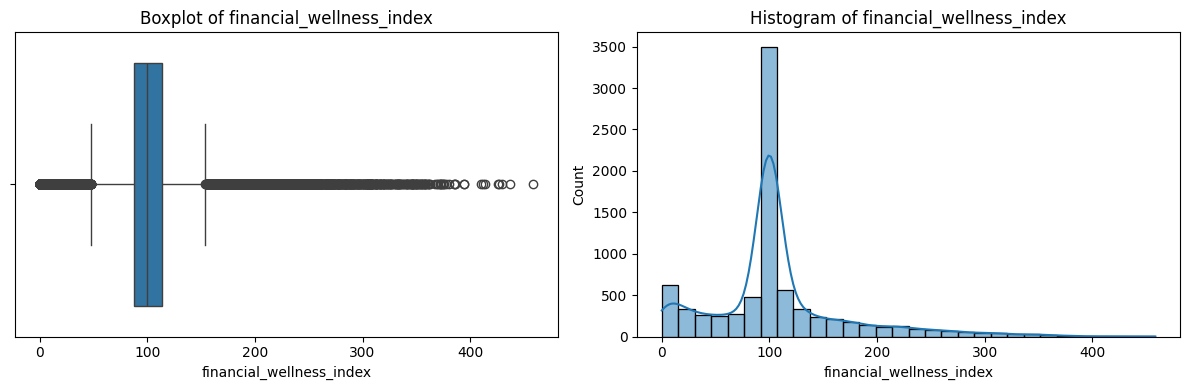

In [ ]:
# Let's get closer to the feature by a brief description, boxplot and histogram of financial_wellness_index
analyze_column(df1,'financial_wellness_index')

Considerations:
- the percentage of values outside the interquartile range is almost 30%
- although it seems to be similar to a normal distribution, it is right skewed with a little bump to the left of the distribution
- some missing values are present

Hence we try some transformation as follows:

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Feature: financial_wellness_index
  - Missing values: 427
  - Outlier percentage: 28.82%
  - Skewness: -2.484720793805598
  - Kurtosis: 9.53338802619891
  - Other info:
count    7900.000000
mean        4.455869
std         0.869291
min        -4.406319
25%         4.509019
50%         4.605650
75%         4.750259
max         6.127853
Name: financial_wellness_index, dtype: float64



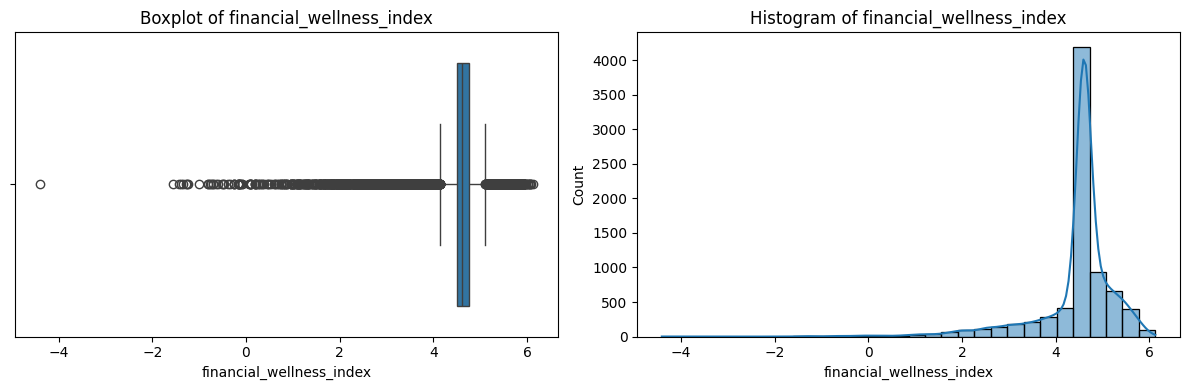

In [ ]:
# Log transformation
log_transform(df1t_proof, 'financial_wellness_index')
analyze_column(df1t_proof, 'financial_wellness_index')

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Feature: financial_wellness_index
  - Missing values: 427
  - Outlier percentage: 29.19%
  - Skewness: -0.1572217365641217
  - Kurtosis: 1.398855394560298
  - Other info:
count    7900.000000
mean        9.961034
std         3.109572
min         0.110454
25%         9.530618
50%        10.002400
75%        10.752407
max        21.411469
Name: financial_wellness_index, dtype: float64



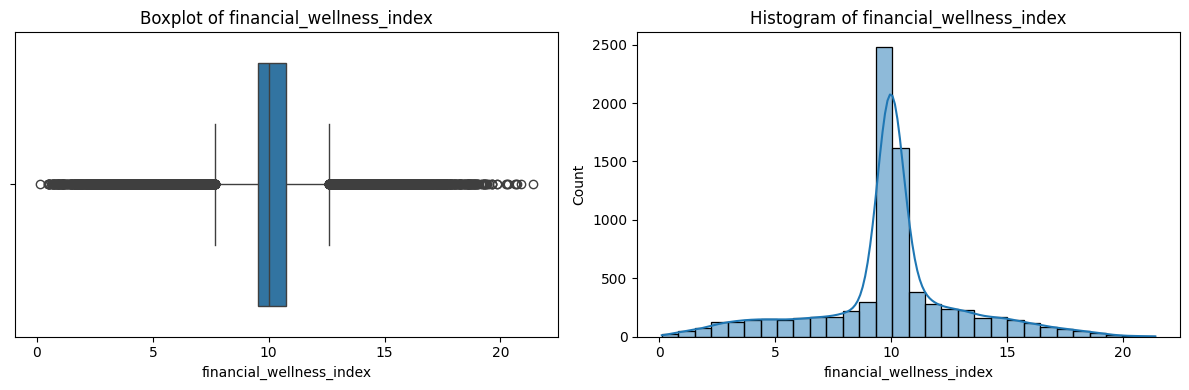

In [ ]:
# Square root transformation
sqrt_transform(df1t, 'financial_wellness_index')
analyze_column(df1t, 'financial_wellness_index')

In [ ]:
# Percentage of outliers through z-score
percent_outliers_by_zscore(df1t['financial_wellness_index'])

The percentage of outliers calculated through z-score is: 0.36027380809415155%


Conclusions: we are aware that both transformations involve a lost of 178 values (the negative ones), nevertheless we see how close to a normal distribution is the feature after the square root transformation, showing only less of the 4% of the data as outliers according to the z-score. Hence we keep the feature transformed by the square root, removing the very extreme values.

In [ ]:
# Remove only the very extreme values
remove_outliers_by_bounds(df1t, 'financial_wellness_index', 0, 20)

Eventually we understand what to do with the missing values: although the distribution is almost not skewed, since the missing values are a lot, in order to reduce the inevitable bias caused by the computing of those missing values we prefer to compute them through the KNN method instead of applying the median for each of those values:

In [ ]:
# Let's add financial_wellness_index to the list of features to be filled through KNN
knn_cols.append('financial_wellness_index')

##### health_consciousness_rating

Feature: health_consciousness_rating
  - Missing values: 251
  - Outlier percentage: 10.82%
  - Skewness: 1.9231855957009463
  - Kurtosis: 3.5297880158342636
  - Other info:
count    8076.000000
mean        1.451986
std         1.392038
min         0.000000
25%         0.686100
50%         0.806950
75%         1.764850
max         9.977300
Name: health_consciousness_rating, dtype: float64



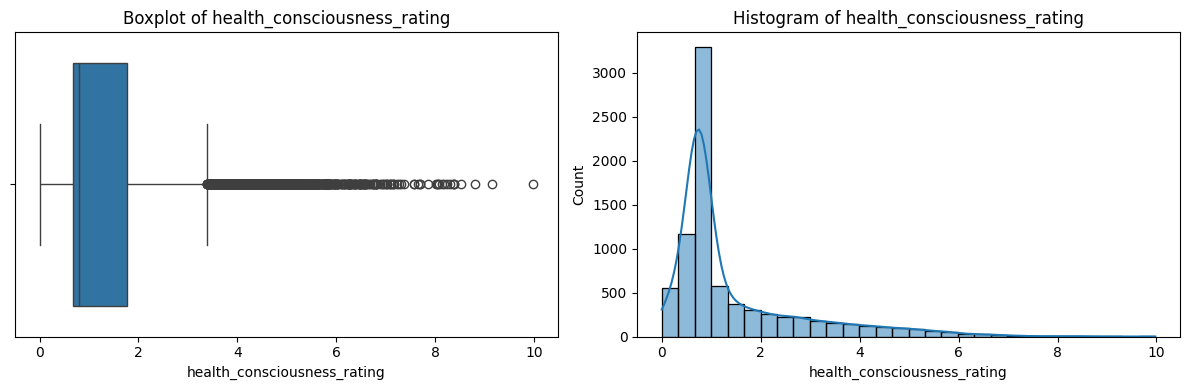

In [ ]:
# Let's get closer to the feature by a brief description, boxplot and histogram of health_consciousness_rating
analyze_column(df1,'health_consciousness_rating')

Considerations:
- the distribution is clearly right skewed
- the outlier percentage according to the interquartile range is almost 11%
- some missing values are present

Hence we try to transform the feature as follows:

Feature: health_consciousness_rating
  - Missing values: 251
  - Outlier percentage: 7.01%
  - Skewness: 1.0557342442053887
  - Kurtosis: 0.8432872673325704
  - Other info:
count    8076.000000
mean        1.097467
std         0.497577
min         0.000000
25%         0.828312
50%         0.898304
75%         1.328477
max         3.158686
Name: health_consciousness_rating, dtype: float64



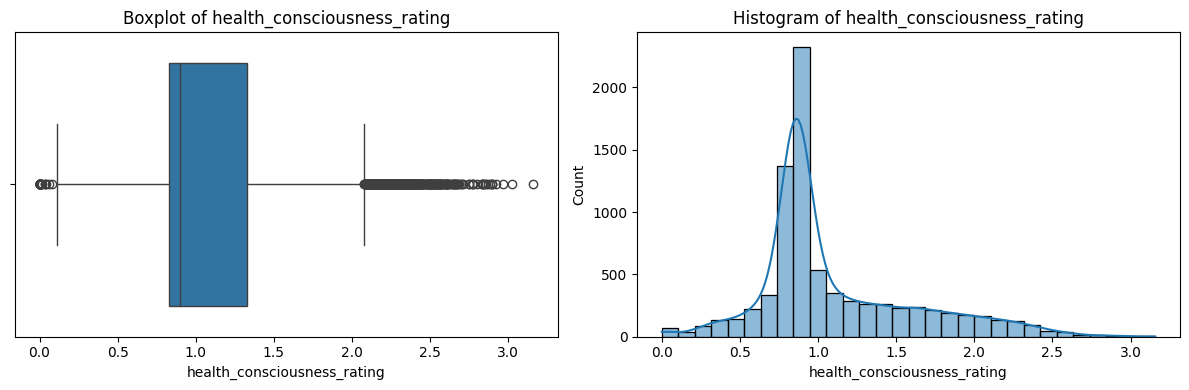

In [ ]:
# Square root tranformation
sqrt_transform(df1t, 'health_consciousness_rating')
analyze_column(df1t, 'health_consciousness_rating')

In [ ]:
# Percentage of outliers through z-score
percent_outliers_by_zscore(df1t['health_consciousness_rating'])

The percentage of outliers calculated through z-score is: 0.5764380929506424%


In particular we observe that after the square root transormation the distribution is similar to a normal one, with only the 0.57% of outliers according to the z-score. We however decide to drop the most extreme values:

In [ ]:
# Remove only the most extreme values
remove_outliers_by_bounds(df1t, 'health_consciousness_rating', 0.05, 2.8)

Lastly we decide to compute the missing values through the KNN method, because the standard deviation is very low (0.49) and applying the median to evry missing value would imply an increase of the deterministic behaviour of the feature.

In [ ]:
# Let's add health_consciousness_rating to the list of features to be filled through KNN
knn_cols.append('health_consciousness_rating')

##### investment_portfolio_value

Feature: investment_portfolio_value
  - Missing values: 125
  - Outlier percentage: 6.28%
  - Skewness: 5.538501384583904
  - Kurtosis: 40.68880526454603
  - Other info:
count      8202.000000
mean      12389.882139
std       21130.598331
min           0.000000
25%        3294.525000
50%        8591.050000
75%       13257.225000
max      294950.000000
Name: investment_portfolio_value, dtype: float64



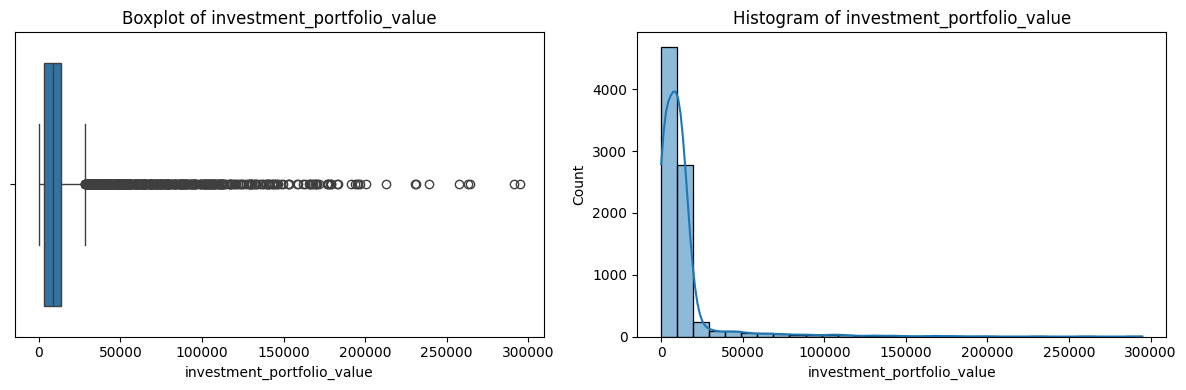

In [ ]:
# Let's get closer to the feature by a brief description, boxplot and histogram of investment_portfolio_value
analyze_column(df1,'investment_portfolio_value')

In [ ]:
# Count numbers of 0 of the feature
df1[df1['investment_portfolio_value']==0].shape[0]

1019

Considerations:
- very right skewed distribution
- a transformation, in order to reduce the skewness (if possible) and to reduce the missing values, is required: in particular the log transformation would involve too much bias caused by the 1019 zeros of the feature
- some missing values are present

Feature: investment_portfolio_value
  - Missing values: 125
  - Outlier percentage: 4.85%
  - Skewness: 1.7277966256033452
  - Kurtosis: 6.617860810668532
  - Other info:
count    8202.000000
mean       91.027255
std        64.065759
min         0.000000
25%        57.397953
50%        92.687915
75%       115.140023
max       543.092994
Name: investment_portfolio_value, dtype: float64



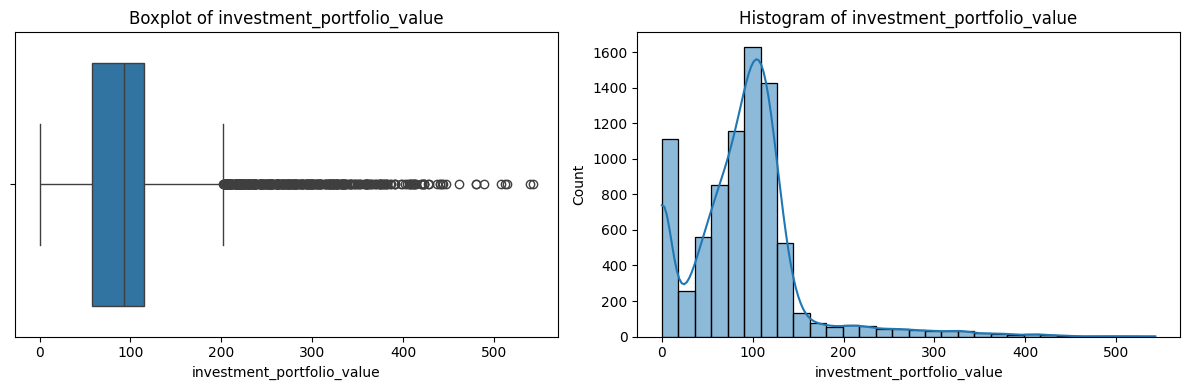

In [ ]:
# Square root transform on dataframe df1tbis
sqrt_transform(df1t, 'investment_portfolio_value')
analyze_column(df1t, 'investment_portfolio_value')

In [ ]:
percent_outliers_by_zscore(df1t['investment_portfolio_value'])

The percentage of outliers calculated through z-score is: 2.1976702293743244%


The result highlights differences between the ones with a null investment portfolio value and the others through two spikes. We decide to keep this transformation because of the reduced percentage of outliers and perhaps the mentioned observation can help us while binning. We proceed removing the most extreme values:

In [ ]:
# Remoev only the most extreme values
remove_outliers_by_bounds(df1t, 'investment_portfolio_value', 0, 400)

Lastly we decide to compute the missing values through the KNN method for the following reasons:
- none clear correlation is visible, hence a linear regression model to fill the missing values would be incorrect
- even though there are not too many outliers, applying the median value to all the missing ones would confuse the gap between the two categories highlighted
- the KNN method allows us to fill those value adding the less bias possible to the feature

In [ ]:
# Let's add investment_portfolio_value to the list of features to be filled through KNN
knn_cols.append('investment_portfolio_value')

##### investments_risk_tolerance


Feature: investments_risk_tolerance
  - Missing values: 167
  - Outlier percentage: 6.04%
  - Skewness: 1.9296158313089673
  - Kurtosis: 4.6784023033371716
  - Other info:
count    8160.000000
mean        7.319230
std         3.701474
min         1.393700
25%         4.796350
50%         6.218600
75%         8.554900
max        30.912400
Name: investments_risk_tolerance, dtype: float64



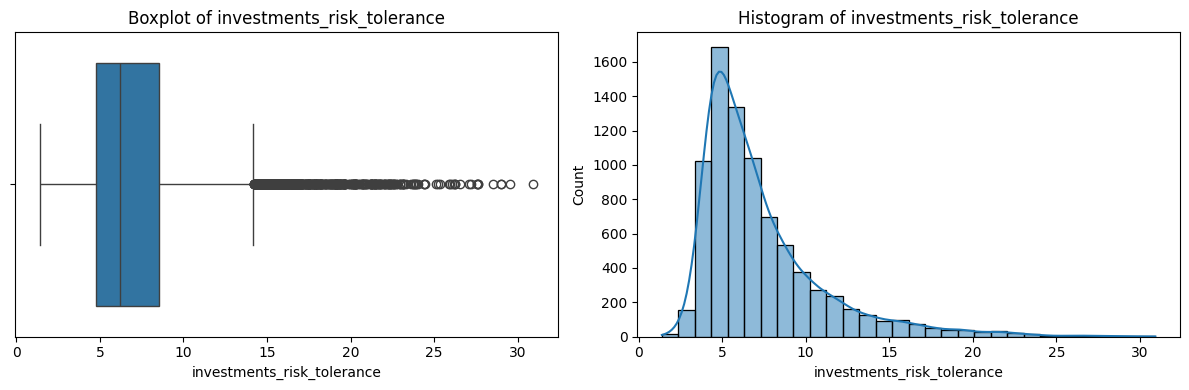

In [ ]:
# Let's get closer to the feature by a brief description, boxplot and histogram of investments_risk_tolerance
analyze_column(df1,'investments_risk_tolerance')

Considerations:
- the distribution is highly right skewed, with outliers (6%)
- some missing values are present
- a transformation could be necessary to reduce the outliers and to correct the non-normal distribution

The nature of the histogram and the absence of non-strictly-positive values suggest us a log transformation:

Feature: investments_risk_tolerance
  - Missing values: 167
  - Outlier percentage: 1.30%
  - Skewness: 0.6558323004341304
  - Kurtosis: 0.20436902688368042
  - Other info:
count    8160.000000
mean        1.891337
std         0.425918
min         0.331962
25%         1.567855
50%         1.827545
75%         2.146504
max         3.431157
Name: investments_risk_tolerance, dtype: float64



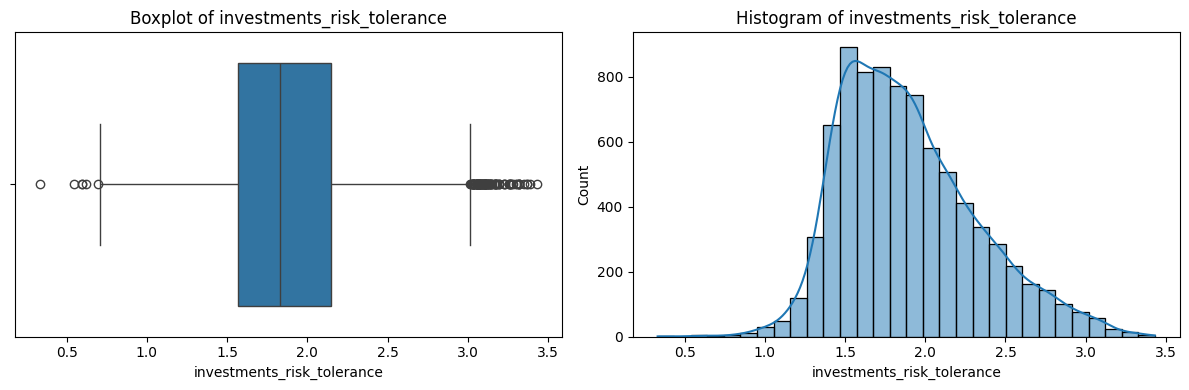

In [ ]:
# Log transformation
log_transform(df1t, 'investments_risk_tolerance')
analyze_column(df1t, 'investments_risk_tolerance')

As expected, the log transformation worked well with our purposes: the outliers percentage and the skewness have been considerably reduced, the distribution has now almost a null kurtosis.
Let's proceed removing the very extreme outliers:

In [ ]:
# Remove only the very extreme outliers
remove_outliers_by_bounds(df1t, 'investments_risk_tolerance', 0.75, 3.4)

Now we only need to deal with the missing values, and we decide to apply the median method because of the reducted amount of outliers and, mainly, because of the similarity with a gaussian distribution:

<ipython-input-49-57e71d11ab46>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


Feature: investments_risk_tolerance
  - Missing values: 0
  - Outlier percentage: 1.42%
  - Skewness: 0.6948459426515909
  - Kurtosis: 0.2292989223932107
  - Other info:
count    8327.000000
mean        1.890916
std         0.419667
min         0.795929
25%         1.573531
50%         1.827818
75%         2.137475
max         3.384838
Name: investments_risk_tolerance, dtype: float64



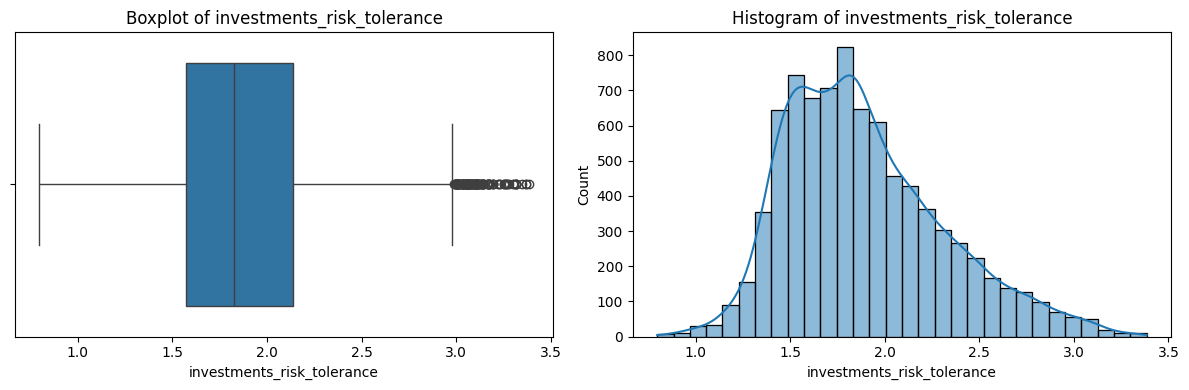

In [ ]:
# Fill missing values with median
fill_missing_values_with_median(df1t, 'investments_risk_tolerance')
analyze_column(df1t, 'investments_risk_tolerance')

##### investments_risk_appetite

Feature: investments_risk_appetite
  - Missing values: 250
  - Outlier percentage: 0.00%
  - Skewness: -0.27502755720871797
  - Kurtosis: -1.3565661474050814
  - Other info:
count    8077.000000
mean        4.382051
std         2.646902
min         0.000000
25%         1.859800
50%         4.817600
75%         6.878600
max         8.699500
Name: investments_risk_appetite, dtype: float64



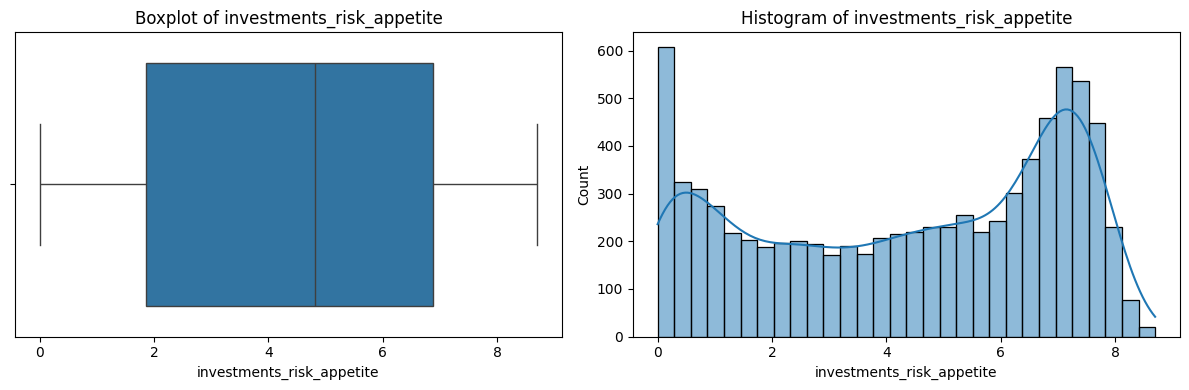

In [ ]:
# Let's get closer to the feature by a brief description, boxplot and histogram of investments_risk_appetite
analyze_column(df1,'investments_risk_appetite')

Considerations:
- none outliers is observable
- the skewness of the distribution is low
- some missing values are present
- a negative kurtosis, observable from the platykurtic nature of the histogram, confirms the heavy tails of the distribution

Due to the bump of the ditribution in 0, none transformation can reveal useful, hence we keep the feature untransformed filling the missing values.

In particular, the correlation map (in Data Visualization) shows a not irrelevant correlation between investments_risk_appetite and investments_risk_tolerance; moreover, the following scatterplot well explain that the sum square residuals are well minimized by a linear regression line. All these insights are suggesting us to prefer the linear regression method rather than the KNN method to fill the missing values. Let's proceed:

<Axes: xlabel='investments_risk_appetite', ylabel='investments_risk_tolerance'>

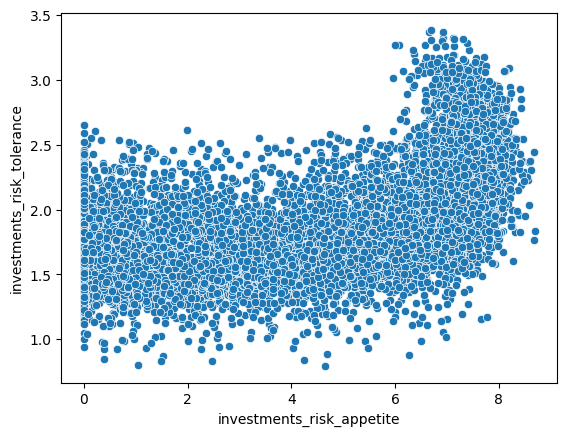

In [ ]:
# Scatterplot between the mentioned features
sns.scatterplot(data=df1t, x='investments_risk_appetite', y='investments_risk_tolerance')

Feature: investments_risk_appetite
  - Missing values: 0
  - Outlier percentage: 0.00%
  - Skewness: -0.2759529102344106
  - Kurtosis: -1.3222209280353137
  - Other info:
count    8327.000000
mean        4.385266
std         2.616563
min         0.000000
25%         1.950800
50%         4.777600
75%         6.855450
max         8.998441
Name: investments_risk_appetite, dtype: float64



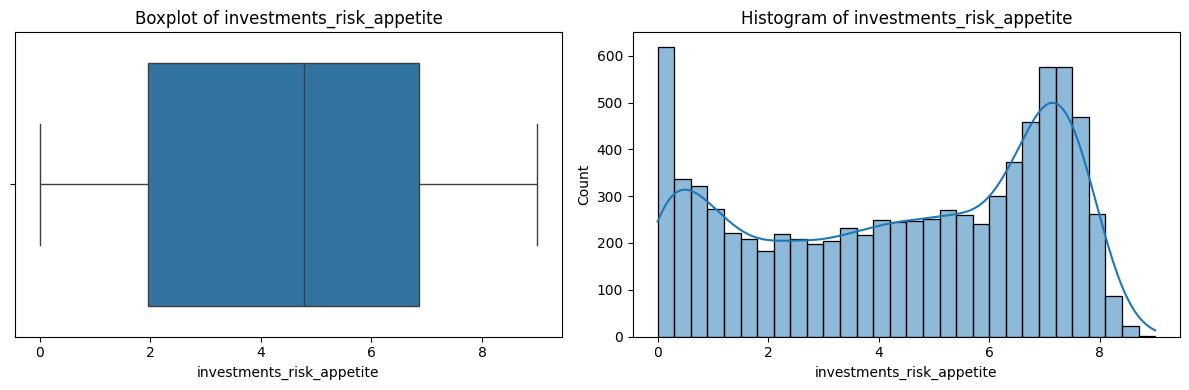

In [ ]:
# Fill the missing values through the linear regression line
fill_missing_values_with_regression(df1t, 'investments_risk_appetite', 'investments_risk_tolerance')

The histogram seems confirming us our decision: almost no bias has been added to the feature

##### last_year_charity_donations

Feature: last_year_charity_donations
  - Missing values: 125
  - Outlier percentage: 16.72%
  - Skewness: 2.5736897521328084
  - Kurtosis: 6.812817239053992
  - Other info:
count    8202.000000
mean      381.025652
std       764.584131
min         0.000000
25%         0.000000
50%        10.550000
75%       309.900000
max      5599.100000
Name: last_year_charity_donations, dtype: float64



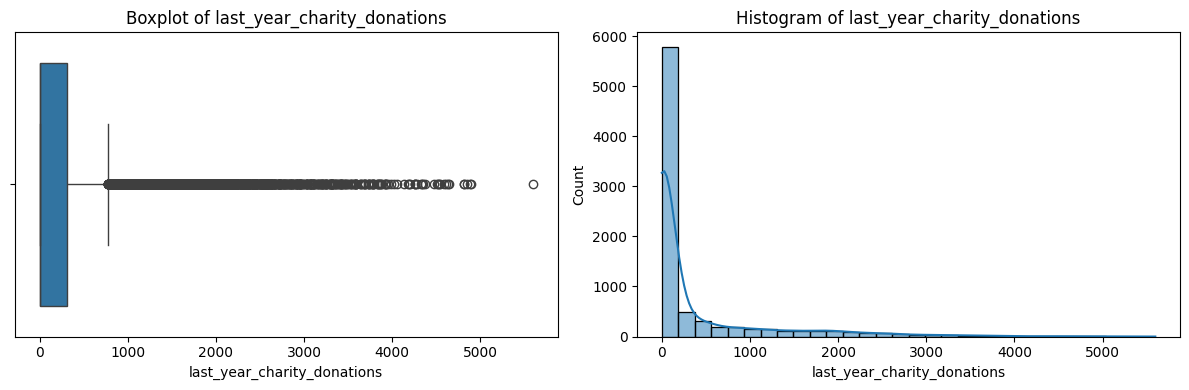

In [ ]:
# Let's get closer to the feature by a brief description, boxplot and histogram of last_year_charity_donations
analyze_column(df1,'last_year_charity_donations')

Considerations:
- the distribution is highly right skewed, confirmed by the heavy right tail with almost 17% of outliers
- some missing values are present
- a transformation is clearly needed, but even though the ditribution is right skewed the log transformation would introduce too much bias caused by the big amount of values in 0, hence let's try something different

Feature: last_year_charity_donations
  - Missing values: 125
  - Outlier percentage: 0.05%
  - Skewness: 0.9244770938675024
  - Kurtosis: -0.3793430147071515
  - Other info:
count    8202.000000
mean        3.819034
std         4.556877
min         0.000000
25%         0.000000
50%         2.193224
75%         6.767170
max        17.757129
Name: last_year_charity_donations, dtype: float64



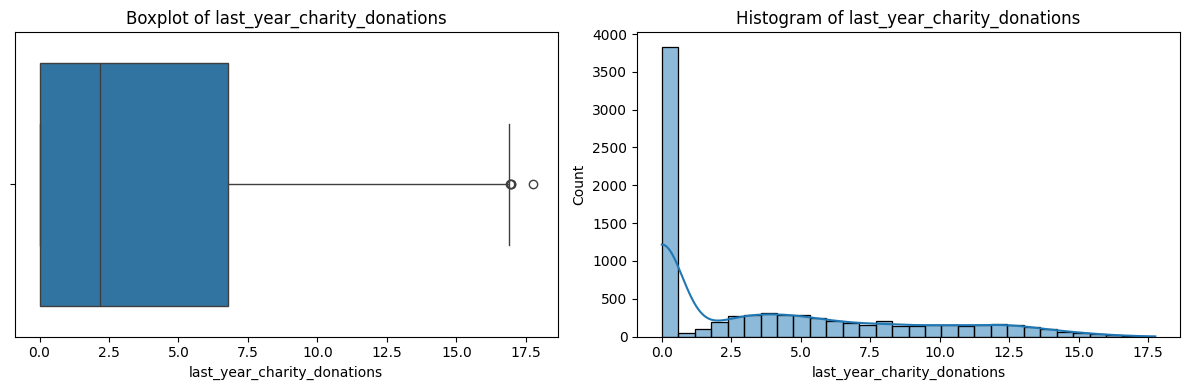

In [ ]:
# Cube root transformation
cube_root_transform(df1t, 'last_year_charity_donations')
analyze_column(df1t, 'last_year_charity_donations')

We think the cube root transformation works better than other transformations (such as square root and log1p) because it highlights through a big spike followed by a bump the difference between two distincts behaviour, the ones who have not doned at all and the others, almost carrying the outlier percentage to 0.

In [ ]:
# Remove only the very extreme outliers
remove_outliers_iqr(df1t, 'last_year_charity_donations')

We decide to compute the missing values through the KNN method for reduce the bias applied to the feature:

In [ ]:
# Let's add last_year_charity_donations to the list of features to be filled through KNN
knn_cols.append('last_year_charity_donations')

##### social_media_influence_score

Feature: social_media_influence_score
  - Missing values: 0
  - Outlier percentage: 3.88%
  - Skewness: 1.502230148162808
  - Kurtosis: 2.431933593118179
  - Other info:
count    8327.000000
mean        6.093906
std         4.326703
min         0.000000
25%         3.163650
50%         4.398000
75%         8.174000
max        42.176800
Name: social_media_influence_score, dtype: float64



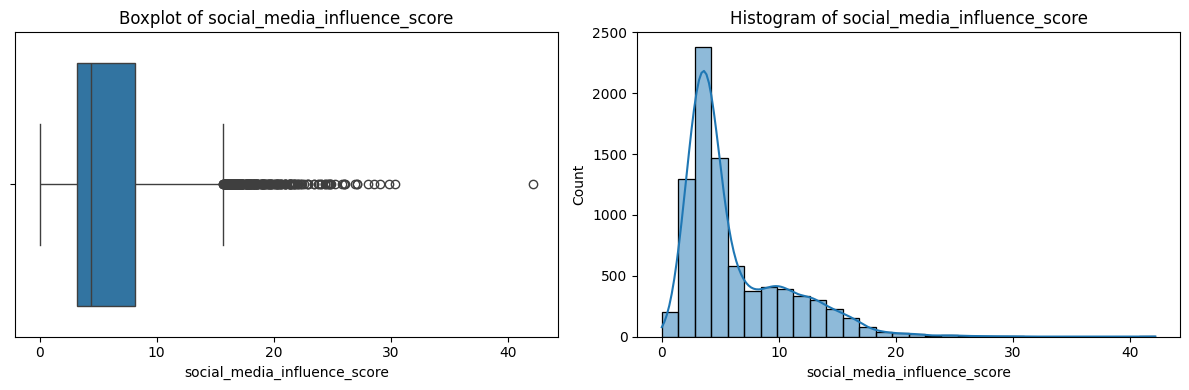

In [ ]:
# Let's get closer to the feature by a brief description, boxplot and histogram of social_media_influence_score
analyze_column(df1,'social_media_influence_score')

Considerations:
- an heavy right tail testifies the high right skewness
- a transformation could reveal useful in order to adjust the distribution to make it more similar to a normal one
- there are no missing values in the feature

Feature: social_media_influence_score
  - Missing values: 0
  - Outlier percentage: 0.88%
  - Skewness: 0.8325530069512297
  - Kurtosis: 0.1367059784697644
  - Other info:
count    8327.000000
mean        2.336051
std         0.798026
min         0.000000
25%         1.778665
50%         2.097141
75%         2.859021
max         6.494367
Name: social_media_influence_score, dtype: float64



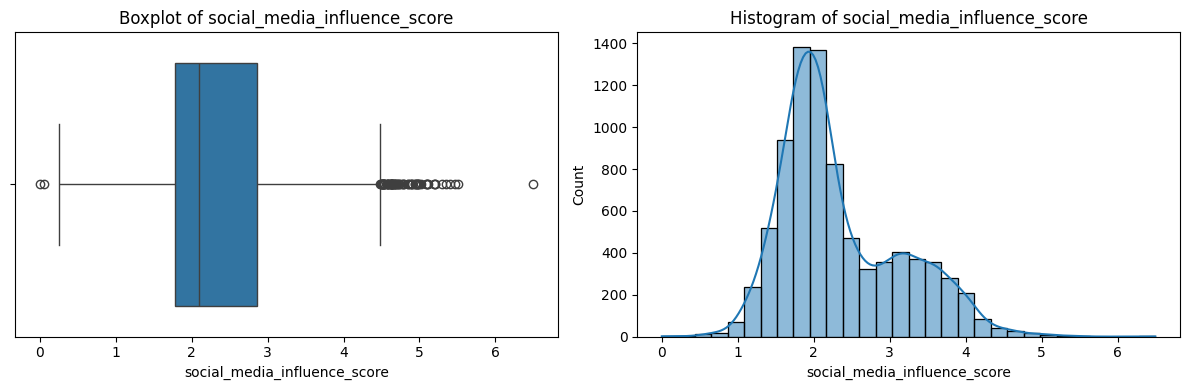

In [ ]:
# The squre root transformation is the one which make the distribution as normal as possible, with both skewness and kurtosis close to 0 and with less than 1% of outliers
sqrt_transform(df1t, 'social_media_influence_score')
analyze_column(df1t, 'social_media_influence_score')

Now we proceed computing only the very extreme values as the median value of the feature: this operation is not oging to add too much bias since
- only a few data are getting computed
- the distribution is similar to a gaussian, then replacing those values with the mean will not considerably change the distribution

<ipython-input-49-57e71d11ab46>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


Feature: social_media_influence_score
  - Missing values: 0
  - Outlier percentage: 0.71%
  - Skewness: 0.7944225985298333
  - Kurtosis: -0.07775422552429179
  - Other info:
count    8327.000000
mean        2.331120
std         0.787666
min         0.253969
25%         1.779017
50%         2.096664
75%         2.850368
max         4.993145
Name: social_media_influence_score, dtype: float64



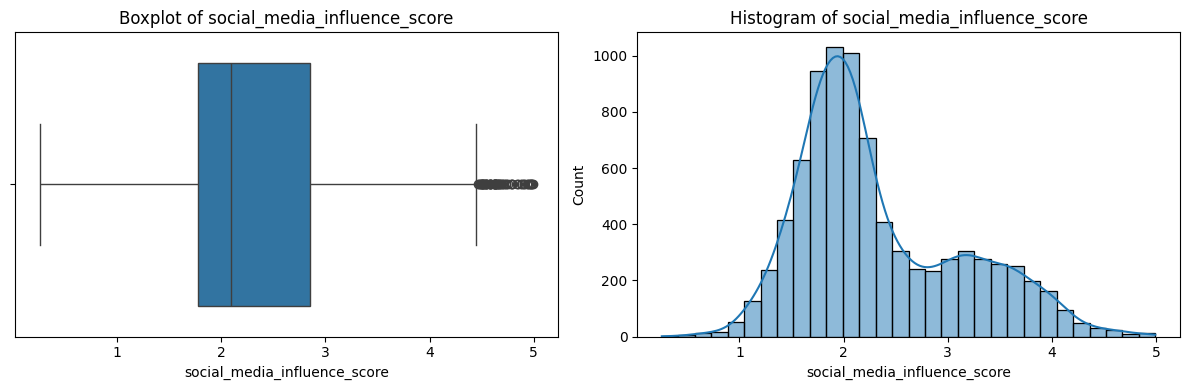

In [ ]:
# Replace outliers with median and visualize
remove_outliers_by_bounds(df1t, 'social_media_influence_score', 0.1, 5)
fill_missing_values_with_median(df1t, 'social_media_influence_score')
analyze_column(df1t, 'social_media_influence_score')

##### stress_management_score

Feature: stress_management_score
  - Missing values: 293
  - Outlier percentage: 1.55%
  - Skewness: 0.6391636161894609
  - Kurtosis: 0.6073529874836239
  - Other info:
count    8034.000000
mean        3.318334
std         1.113446
min         0.319200
25%         2.560975
50%         3.150200
75%         3.980425
max         8.712300
Name: stress_management_score, dtype: float64



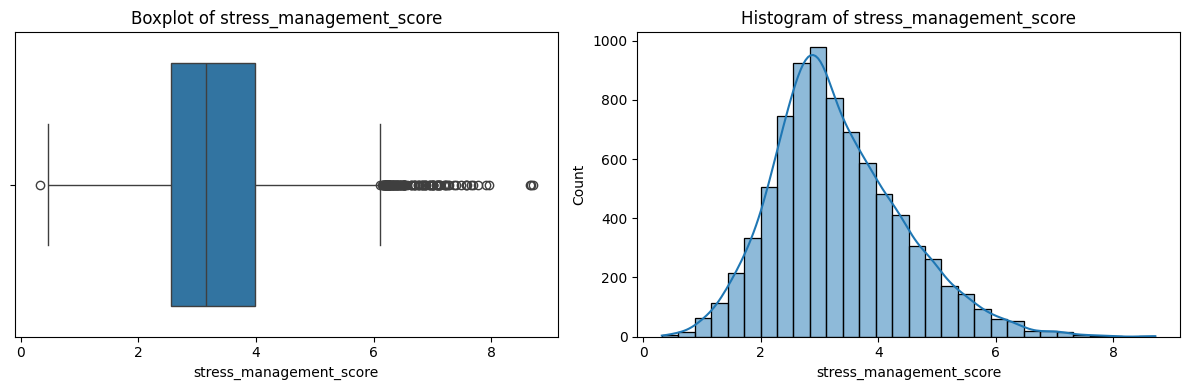

In [ ]:
# Let's get closer to the feature by a brief description, boxplot and histogram of stress_management_score
analyze_column(df1,'stress_management_score')

Considerations:

- the distribution is lightly right skewed
- the distribution is already very similar to a gaussian
- a transformation could reveal useful even though it does not seem necessary
- some missing values are present

Feature: stress_management_score
  - Missing values: 293
  - Outlier percentage: 1.22%
  - Skewness: -0.18303480765773403
  - Kurtosis: 0.31337215553521824
  - Other info:
count    8034.000000
mean        1.429879
std         0.258735
min         0.277025
25%         1.270034
50%         1.423157
75%         1.605515
max         2.273393
Name: stress_management_score, dtype: float64



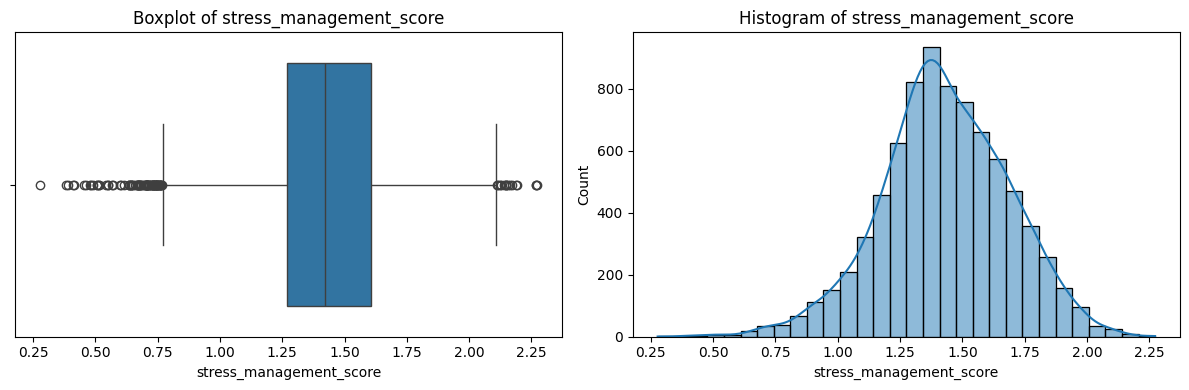

In [ ]:
# Applying the log(1+value) transformation, which in this scenario works better than the log transformation
log1p_transform(df1t, 'stress_management_score')
analyze_column(df1t, 'stress_management_score')

Even if less than before, some extreme values still characterize the feature, we will remove them in order to better work with algorithms sensitive to outliers:

In [ ]:
# Remove only the very extreme values
remove_outliers_by_bounds(df1t, 'stress_management_score', 0.5, 2.25)

Lastly, since the amount of missing values is not irrelevant, we apply the KNN method in order to add as less bias as possible to the dataframe:

In [ ]:
# Let's add stress_management_score to the list of features to be filled through KNN
knn_cols.append('stress_management_score')

##### well_being_level


Feature: stress_management_score
  - Missing values: 293
  - Outlier percentage: 1.55%
  - Skewness: 0.6391636161894609
  - Kurtosis: 0.6073529874836239
  - Other info:
count    8034.000000
mean        3.318334
std         1.113446
min         0.319200
25%         2.560975
50%         3.150200
75%         3.980425
max         8.712300
Name: stress_management_score, dtype: float64



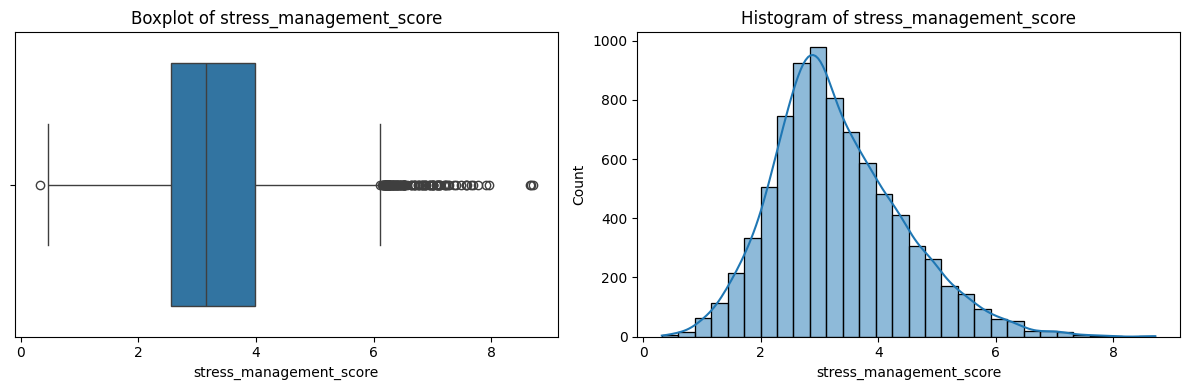

In [ ]:
# Let's get closer to the feature by a brief description, boxplot and histogram of stress_management_score
analyze_column(df1,'stress_management_score')

Considerations:
- the distribution is a little right skewed
- few missing values are present
- is not very distant to be similar to a normal distribution, but a transformation can help us: in particular a log transformation could reduce the skewness without modifying too much our data, since not many values are close to 0

Feature: well_being_level
  - Missing values: 125
  - Outlier percentage: 0.66%
  - Skewness: 0.14792232112084105
  - Kurtosis: -0.0754069701049005
  - Other info:
count    8202.000000
mean        1.486711
std         0.383387
min         0.128921
25%         1.227452
50%         1.463579
75%         1.726612
max         2.647188
Name: well_being_level, dtype: float64



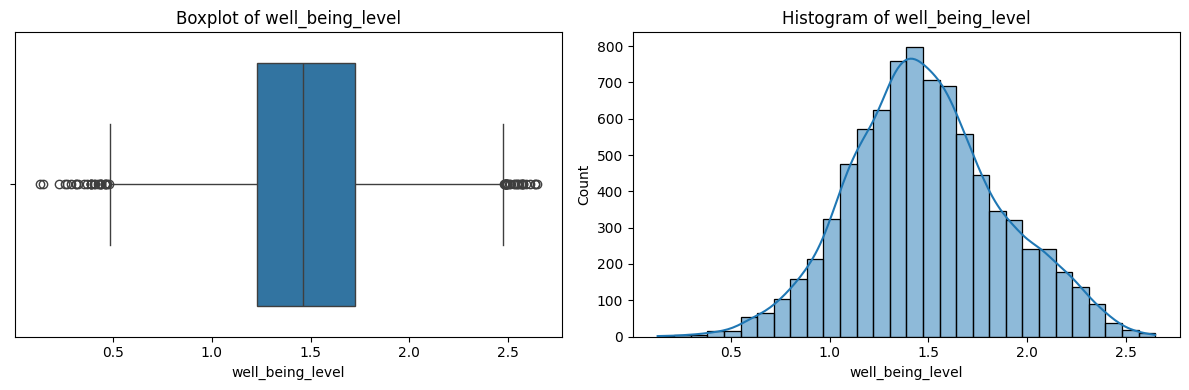

In [ ]:
log_transform(df1t, 'well_being_level')
analyze_column(df1t, 'well_being_level')

Conclusions:
the distribution is now as a normal one, but we still need to remove the extreme outliers and to fill in the missing values.

In [ ]:
# Remove only the very extreme values
remove_outliers_by_bounds(df1t, 'well_being_level', 0.4, 2.6)

For the last purpose we can be helped by the correlation we have seen before, of well_being_level with health_consciousness_rating: since it is very high we can fill the missing value through the linear regression line

Feature: well_being_level
  - Missing values: 4
  - Outlier percentage: 0.52%
  - Skewness: 0.19394625973462123
  - Kurtosis: -0.1551738338313724
  - Other info:
count    8323.000000
mean        1.488967
std         0.378816
min         0.402527
25%         1.234545
50%         1.462538
75%         1.726136
max         2.587862
Name: well_being_level, dtype: float64



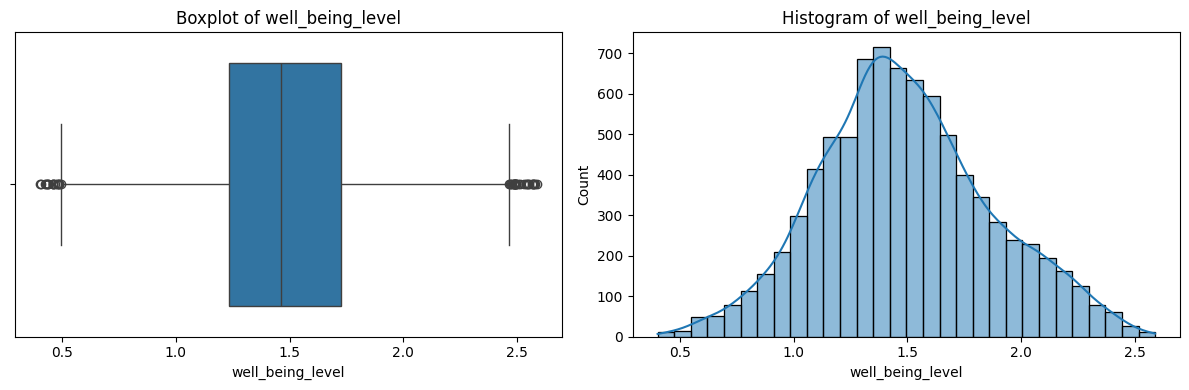

In [ ]:
# Fill missing values through linear regression line
fill_missing_values_with_regression(df1t, 'well_being_level', 'health_consciousness_rating')

Still 4 missing values are presents (it means that in 4 rows both well_being_level and health_consciousness_rating were missing). We will fill them with the median.

In [ ]:
fill_missing_values_with_median(df1t, 'well_being_level')
df1t['well_being_level'].isna().sum()

<ipython-input-49-57e71d11ab46>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)


np.int64(0)

##### country

We decide to include the feature 'country' to the study of the missing values. Indeed we can observe that the feature assumes 43 times a null value:

In [ ]:
df1t['country'].value_counts()

country
Spain             446
Netherlands       423
France            416
United Kingdom    410
Turkey            410
Brazil            410
United States     406
Mexico            406
New Zealand       397
Finland           396
Ukraine           391
Germany           387
Canada            384
Australia         382
Switzerland       380
Norway            379
Denmark           377
Iran              373
Ireland           372
India             371
Serbia            368
                   43
Name: count, dtype: Int64

In [ ]:
df1t[df1t['country'] == '  '].shape[0]

43

For this reason we decide to treat such values as missing and filling them with the mode.

In [ ]:
# Replace '  ' with NaN
df1t['country'] = df1t['country'].replace('  ', np.nan)
print(df1t['country'].isna().sum())

43


In [ ]:
# Replace with the mode
df1t['country'] = df1t['country'].fillna(df1t['country'].mode()[0])

### Data transformation

Now we proceed our workflow as follows:
- we will scale the dataframe in order to use the knn method to fill the last missing values, since such method uses the Euclidean distance
- we will create some new features useful for the next steps
- we will encode the country feature
- we will bin some features in order to gain some other insights
- we will reduce the dataframe we will use

#### Scaling

In order to fill the missing values with the KNN method, which is sensitive to the Euclidean distance and therefore necessitate of the dataframe scaled, and (nextly) to generate the correct clusters with other methods who request for Euclidean distance as well, we proceed scaling all the features as follows:


In [ ]:
# Create a copy of the last version of the dataframe
df1t_scaled_num = df1t[numerical_features].copy()

In [ ]:
def scale_feature(df, column):
    max_value = df[column].max()
    min_value = df[column].min()
    df[column] = (df[column] - min_value) / (max_value - min_value)

In [ ]:
# Scale all the features
for column in df1t_scaled_num.columns:
  scale_feature(df1t_scaled_num, column)

# Check the scaled dataset
df1t_scaled_num.head().T

citizen_id                                 1         2         3         4  \
avg_monthly_entertainment_expenses  0.105049  0.129458  0.354234  0.426225   
avg_weekly_exercise_hours           0.000000  0.246163  0.234979  0.168864   
eco_consciousness_score             0.000000  0.000000  0.000000  0.077308   
education_level                     0.389315  0.345058  0.662082  0.597648   
environmental_awareness_rating      0.428987  0.458644  0.478743  0.463227   
financial_wellness_index            0.817985  0.728412  0.229855  0.467003   
health_consciousness_rating         0.320700       NaN  0.216835  0.300211   
investment_portfolio_value          0.028729  0.000000  0.179480  0.196258   
investments_risk_appetite           0.754197  0.809429  0.464525  0.793071   
investments_risk_tolerance          0.902931  0.787600  0.220961  0.390676   
last_year_charity_donations         0.000000  0.000000  0.000000  0.286348   
social_media_influence_score        0.289705  0.255563  0.620872  0.415079   
stress_management_score             0.528256  0.316645  0.646279       NaN   
well_being_level                    0.439731  0.499681  0.489098  0.618114   
age                                 0.480000  0.320000  0.680000  0.480000   

citizen_id                                 5  
avg_monthly_entertainment_expenses  0.071124  
avg_weekly_exercise_hours           0.526460  
eco_consciousness_score             0.000000  
education_level                     0.427562  
environmental_awareness_rating      0.719170  
financial_wellness_index            0.489172  
health_consciousness_rating         0.154318  
investment_portfolio_value          0.197642  
investments_risk_appetite           0.486718  
investments_risk_tolerance          0.141252  
last_year_charity_donations         0.000000  
social_media_influence_score        0.553169  
stress_management_score             0.407313  
well_being_level                    0.240084  
age                                 0.180000

#### Imputing

Finally, after having scaled the data, we now can fill the missing values through the KNN method, according to the reasons provided in the "outliers and missing values" paragraph

In [ ]:
# Add (well_being_level and) age to the list of features whose missing values will be computed through KNN method
knn_cols.append('well_being_level')
knn_cols.append('age')

In [ ]:
# Finally fill all the missing values
for col in knn_cols:
  fill_missing_values_with_knn(df1t_scaled_num, col)

In [ ]:
# Take a look at the missing values again
df1t_scaled_num.isna().sum()

avg_monthly_entertainment_expenses    0
avg_weekly_exercise_hours             0
eco_consciousness_score               0
education_level                       0
environmental_awareness_rating        0
financial_wellness_index              0
health_consciousness_rating           0
investment_portfolio_value            0
investments_risk_appetite             0
investments_risk_tolerance            0
last_year_charity_donations           0
social_media_influence_score          0
stress_management_score               0
well_being_level                      0
age                                   0
dtype: int64

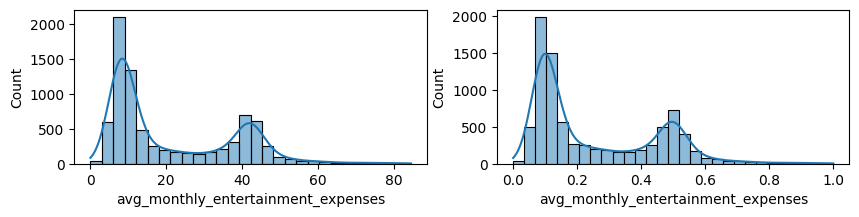

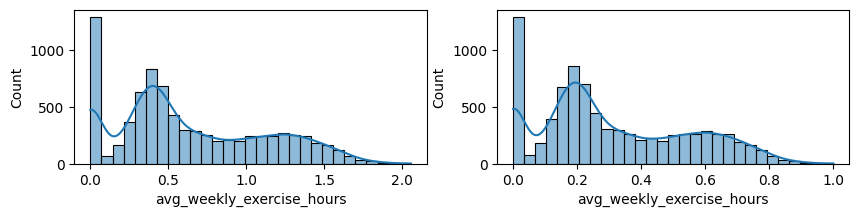

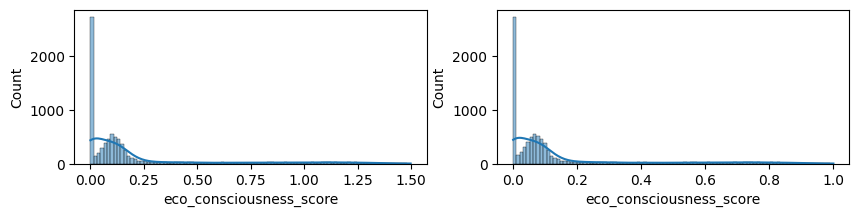

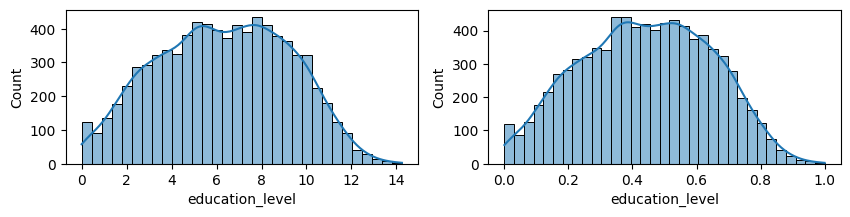

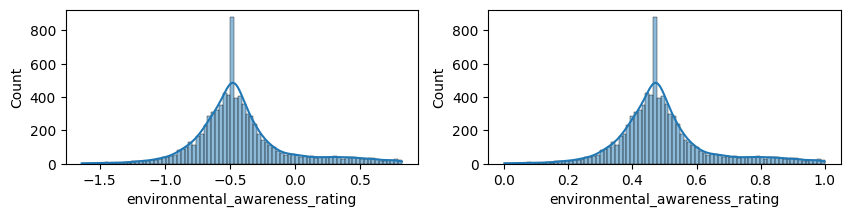

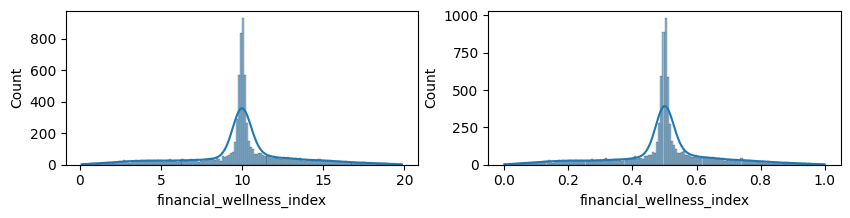

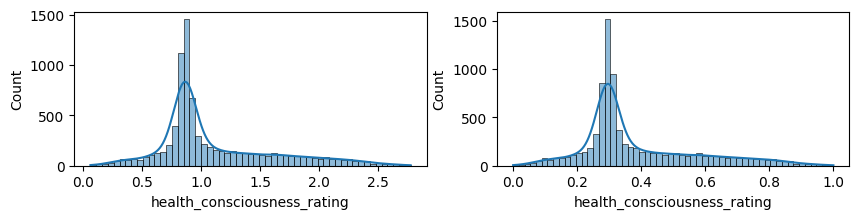

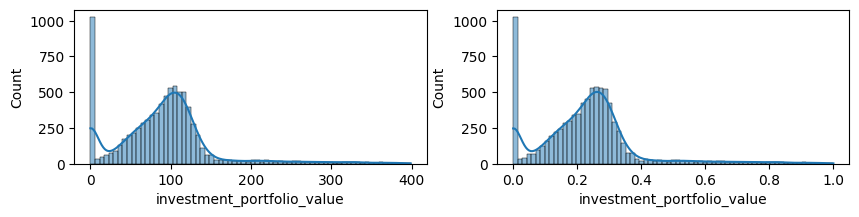

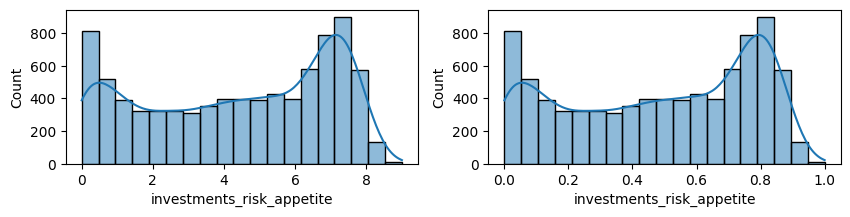

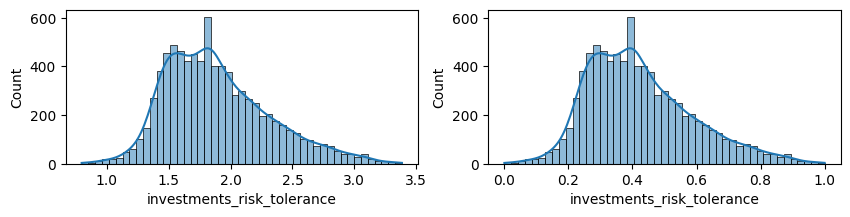

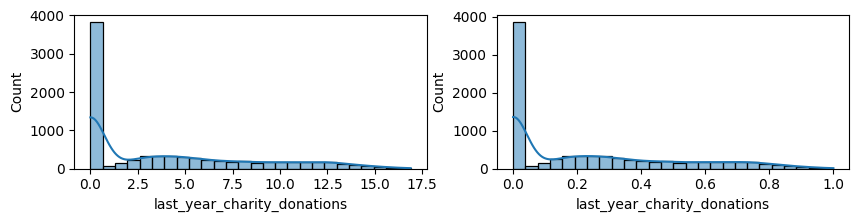

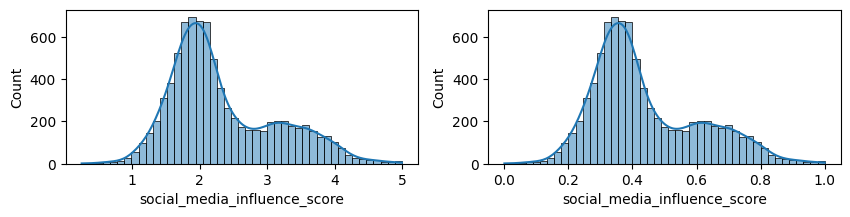

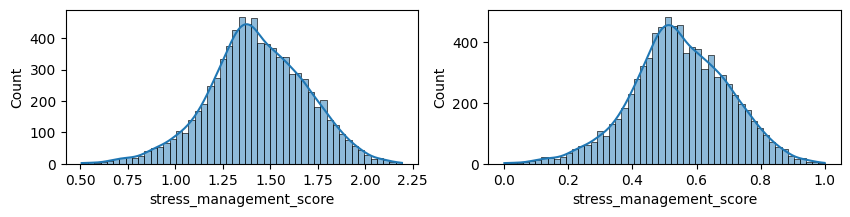

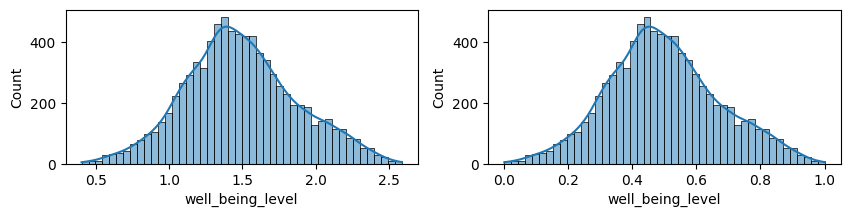

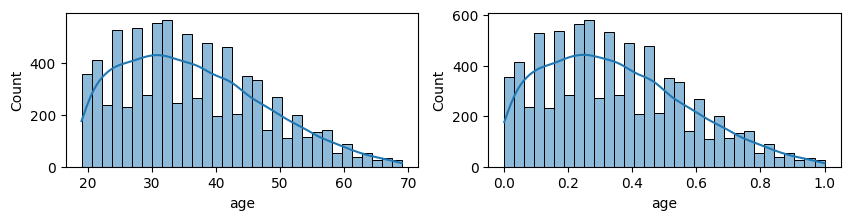

In [ ]:
# Look for any consistent difference betweeen before and after tha data scaling and the computation of missing values
for col in numerical_features:
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 2))
  sns.histplot(df1t[col], kde=True, ax=ax1)
  sns.histplot(df1t_scaled_num[col], kde=True, ax=ax2)
  plt.show()

The last two outputs confirm us that no other missing value is still present in our dataframe. Moreover there are not substantial differences on the distributions of the features before and after having scaled and the KNN computation.

Hence we can continue our workflow as follows:

In order to use the dataframe with the absolute values (after the transformations but not scaled) but without the missing values we make the inverse scaling as follows. We do not know already if this step will be useful for our goals, but surely it will not cause any damage.

In [ ]:
def inverse_scale_feature(df, column):
  max_value = df[column].max()
  min_value = df[column].min()
  df[column] = df1t_scaled_num[column] * (max_value - min_value) + min_value

In [ ]:
for column in df1t_scaled_num.columns:
  inverse_scale_feature(df1t, column)

In [ ]:
df1t[numerical_features].isna().sum()

avg_monthly_entertainment_expenses    0
avg_weekly_exercise_hours             0
eco_consciousness_score               0
education_level                       0
environmental_awareness_rating        0
financial_wellness_index              0
health_consciousness_rating           0
investment_portfolio_value            0
investments_risk_appetite             0
investments_risk_tolerance            0
last_year_charity_donations           0
social_media_influence_score          0
stress_management_score               0
well_being_level                      0
age                                   0
dtype: int64

#### Feature Engineering

##### gender

In [ ]:
# Insight 3.
df1t['title'].value_counts()

title
Mr.     4034
Mrs.    2049
Ms.     2044
Mx.      200
Name: count, dtype: int64

In [ ]:
# Change title in a binary variable (where it is 0 if is male and 1 for every other case), dealing with Mx. as a missing value and replacing it with the mode
df1t['gender'] = np.where((df1t['title']=='Mrs.')|(df1t['title']=='Ms.')|(df1t['title']=='Mx.'),1,0)

In [ ]:
# Visualize the new variable
df1t['gender'].value_counts()

gender
1    4293
0    4034
Name: count, dtype: int64

In [ ]:
# Add the feature to the dataframe df1t_scaled_num
df1t_scaled_num['gender'] = df1t['gender']

###### additional insights for gender

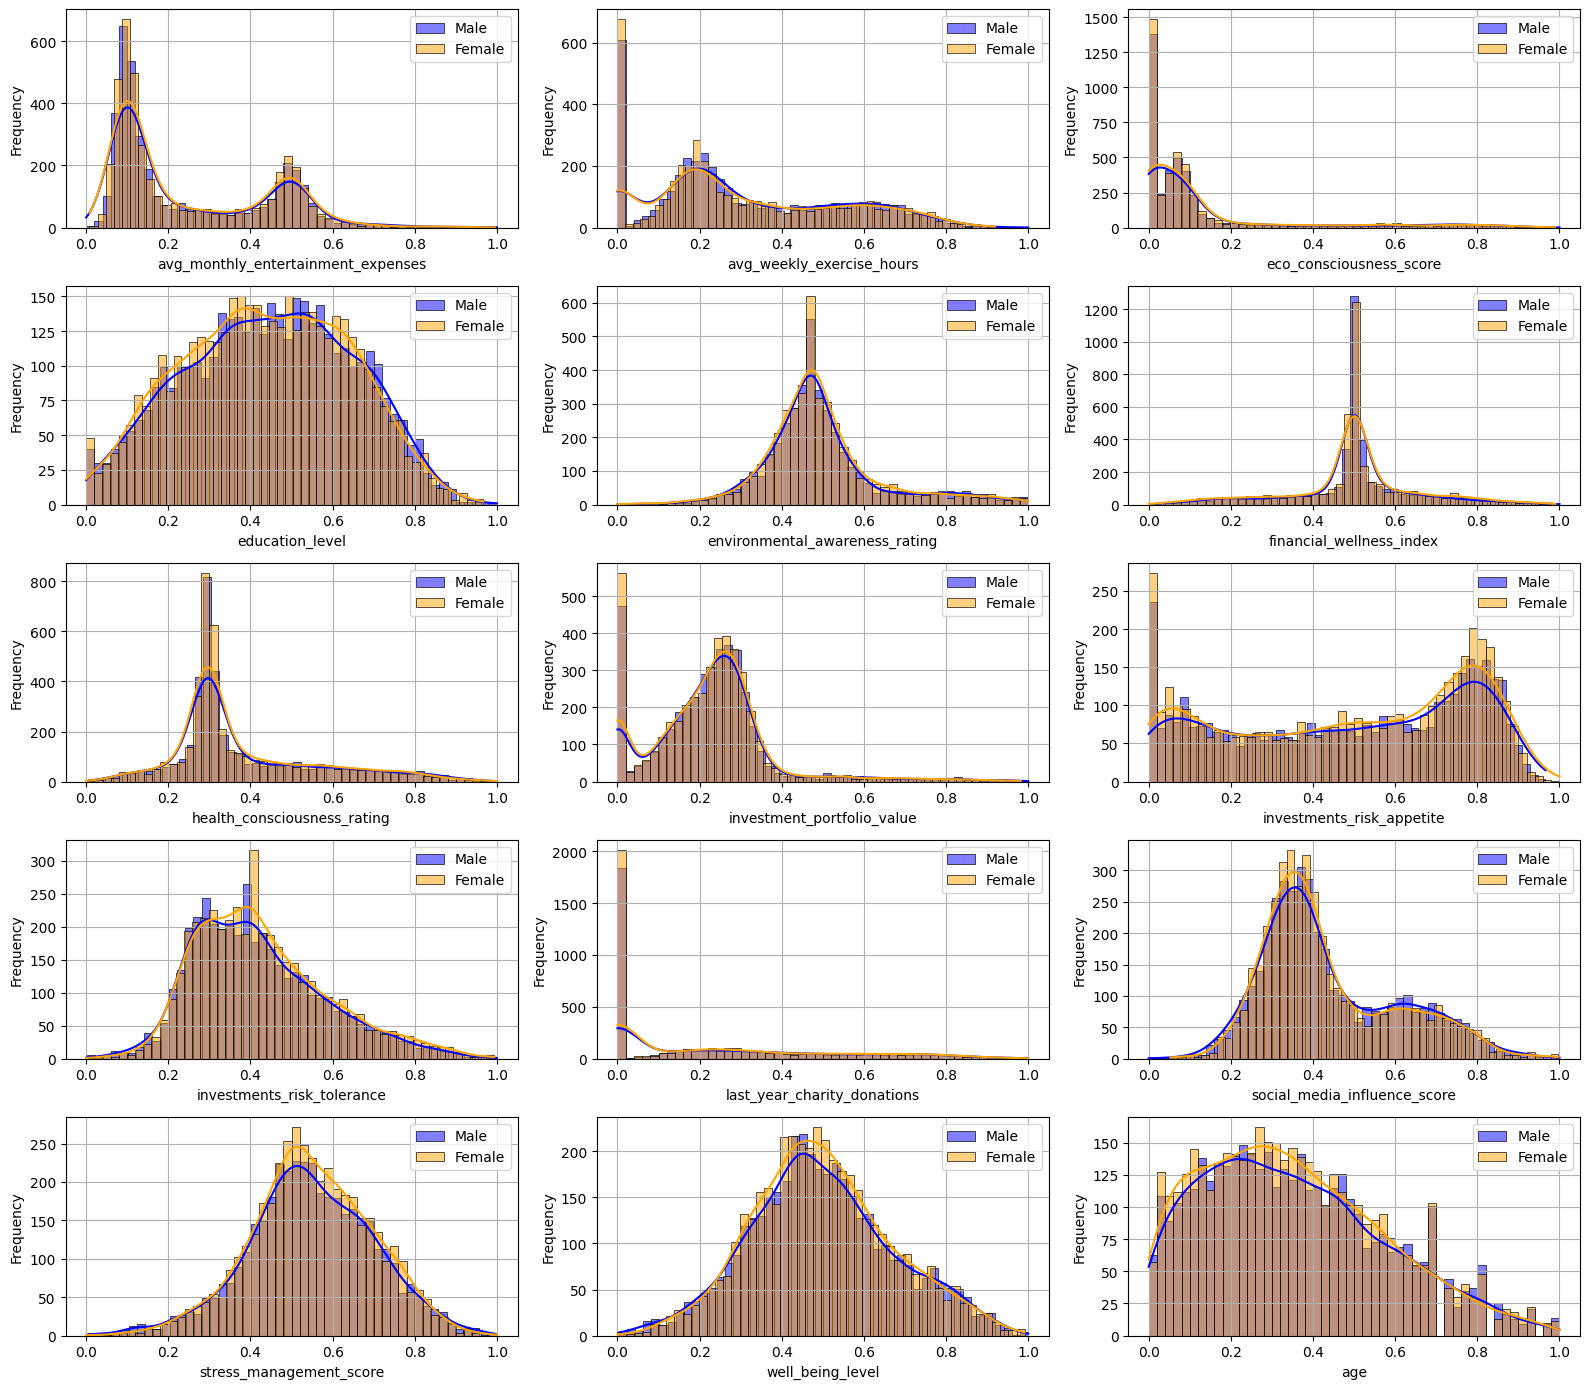

In [ ]:
n_cols = 3
n_rows = math.ceil(len(numerical_features) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 14))
axes = axes.flatten()

for idx, column in enumerate(numerical_features):
    ax = axes[idx]

    sns.histplot(df1t_scaled_num[df1t_scaled_num['gender'] == 0][column],
                 bins=50, kde=True, alpha=0.5, label='Male', color='blue', ax=ax)
    sns.histplot(df1t_scaled_num[df1t_scaled_num['gender'] == 1][column],
                 bins=50, kde=True, alpha=0.5, label='Female', color='orange', ax=ax)

    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True)

# Hide any unused subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

We wanted to add these graphs in order to show the absence of clear differences on the distributions of the numerical features grouped by the gender in our dataframe. Indeed it is explained by both the histograms and the kde lines.

##### investments_risk_attitude

Feature: investments_risk_attitude
  - Missing values: 0
  - Outlier percentage: 0.00%
  - Skewness: 0.14363790145042551
  - Kurtosis: -1.0732084526233843
  - Other info:
count    8327.000000
mean        0.442726
std         0.206212
min         0.000000
25%         0.260593
50%         0.432419
75%         0.610280
max         1.000000
Name: investments_risk_attitude, dtype: float64



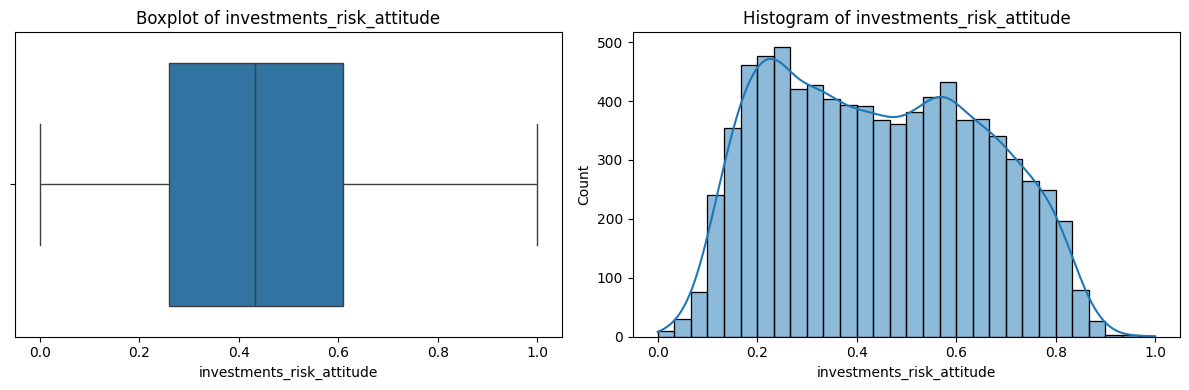

In [ ]:
# Create the new variable
df1t_scaled_num['investments_risk_attitude'] = (df1t_scaled_num['investments_risk_tolerance'] + df1t_scaled_num['investments_risk_appetite'])
scale_feature(df1t_scaled_num, 'investments_risk_attitude')
analyze_column(df1t_scaled_num, 'investments_risk_attitude')

#####  eco_friendly_attitude

Feature: eco_friendly_attitude
  - Missing values: 0
  - Outlier percentage: 8.93%
  - Skewness: 1.5039823643170367
  - Kurtosis: 2.321354318537344
  - Other info:
count    8327.000000
mean        0.321290
std         0.134606
min         0.000000
25%         0.241921
50%         0.279471
75%         0.360176
max         1.000000
Name: eco_friendly_attitude, dtype: float64



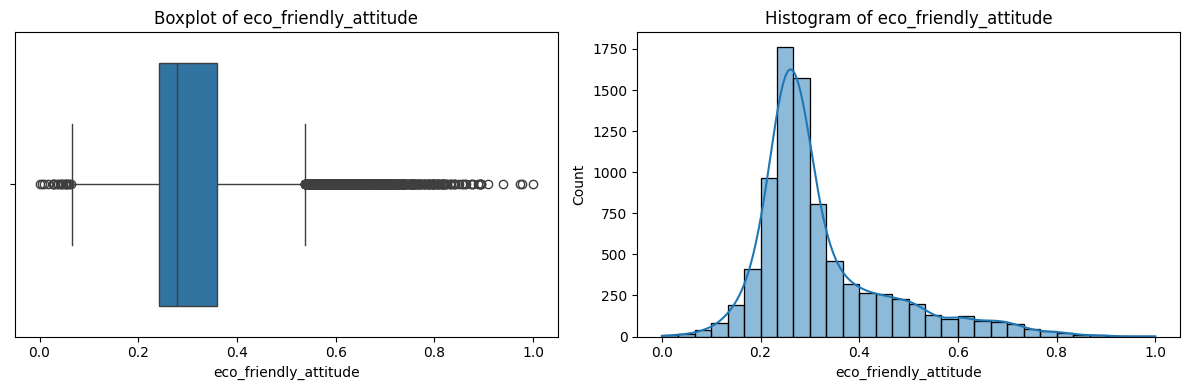

In [ ]:
# Create the new variable
df1t_scaled_num['eco_friendly_attitude'] = (df1t_scaled_num['eco_consciousness_score'] + df1t_scaled_num['environmental_awareness_rating'])
scale_feature(df1t_scaled_num, 'eco_friendly_attitude')
analyze_column(df1t_scaled_num, 'eco_friendly_attitude')

##### healthy_habits

Feature: health_habits
  - Missing values: 0
  - Outlier percentage: 1.22%
  - Skewness: 0.4266105041554328
  - Kurtosis: -0.010159351048140586
  - Other info:
count    8327.000000
mean        0.449863
std         0.168456
min         0.000000
25%         0.334301
50%         0.432147
75%         0.546684
max         1.000000
Name: health_habits, dtype: float64



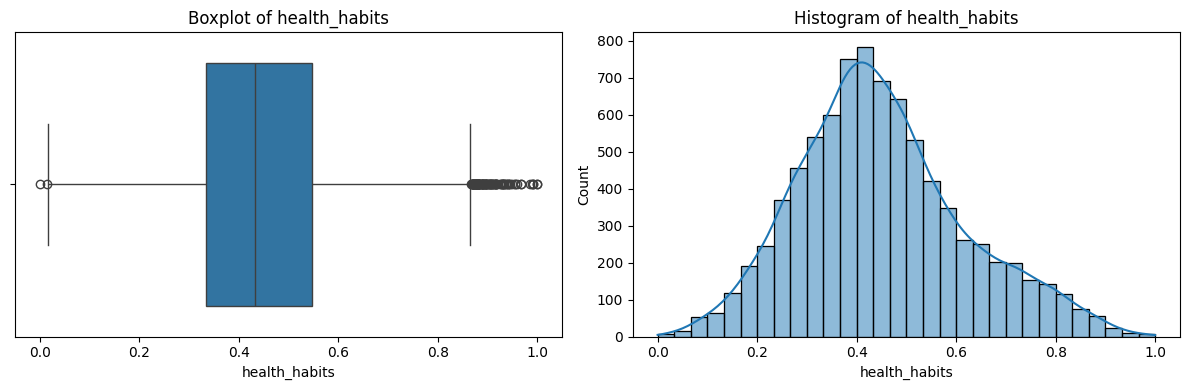

In [ ]:
# Create the new variable
df1t_scaled_num['health_habits'] = (df1t_scaled_num['health_consciousness_rating'] + df1t_scaled_num['stress_management_score'] + df1t_scaled_num['well_being_level'])
scale_feature(df1t_scaled_num, 'health_habits')
analyze_column(df1t_scaled_num, 'health_habits')

##### continents

In [ ]:
west_europe = ['Spain', 'Netherlands', 'France', 'United Kingdom', 'Finland',	'Germany', 'Switzerland', 'Norway', 'Denmark', 'Ireland']
east_europe = ['Turkey', 'Ukraine', 'Serbia']
north_america = ['United States', 'Canada']
south_america = ['Brazil', 'Mexico']
oceania = ['Australia', 'New Zealand']
asia = ['India', 'Iran']
df1t['continent'] = np.where(df1['country'].isin(west_europe), 'West Europe', np.where(df1['country'].isin(north_america), 'North America', np.where(df1['country'].isin(south_america), 'South America', np.where(df1['country'].isin(oceania), 'Oceania', np.where(df1['country'].isin(asia), 'Asia', 'East Europe')))))

In [ ]:
df1t[['continent', 'country']].head(20).T

citizen_id             1            2            3            4            5   \
continent   South America      Oceania  West Europe  West Europe  East Europe   
country            Brazil  New Zealand      Germany      Germany       Turkey   

citizen_id    6            7              8            9               10  \
continent   Asia  West Europe  North America  West Europe     West Europe   
country     Iran  Netherlands         Canada      Ireland  United Kingdom   

citizen_id           11           12              13           14     15  \
continent   West Europe  West Europe     West Europe  West Europe   Asia   
country         Ireland      Ireland  United Kingdom  Netherlands  India   

citizen_id           16    17           18           19     20  
continent   West Europe  Asia  West Europe  East Europe   Asia  
country         Germany  Iran       France       Serbia  India

#### Encodings

In order to cluster correctly, we need to transform some categorical features in numerical, encoding them.

An issue belonged to our dataframe needs to be faced before clustering: the feature 'country' is clearly categorical but not ordered and assumes 21 different values. Let's understand which is the best encoding method for such feature

Being not ordered, an ordinal encoding would completely affect the clustering process providing wrong results. On the other hand, a frequency encoding is definitely an option which would not help us and our purposes (ie to separate the sample in clear and different clusters).
Hence, we prefer to deal with the issue through dummy variables; we are totally aware that adding 21 columns to the dataframe can slow down the running pace of the code, but we prefer slowness to incorrect results.

In [ ]:
# Create a dataframe with only the values of 'country' and visualize
df_country = pd.get_dummies(df1t['country'], columns=['country'], drop_first=False)
df_country = df_country.astype(int)
df_country.head()

Australia  Brazil  Canada  Denmark  Finland  France  Germany  \
citizen_id                                                                 
1                   0       1       0        0        0       0        0   
2                   0       0       0        0        0       0        0   
3                   0       0       0        0        0       0        1   
4                   0       0       0        0        0       0        1   
5                   0       0       0        0        0       0        0   

            India  Iran  Ireland  ...  Netherlands  New Zealand  Norway  \
citizen_id                        ...                                     
1               0     0        0  ...            0            0       0   
2               0     0        0  ...            0            1       0   
3               0     0        0  ...            0            0       0   
4               0     0        0  ...            0            0       0   
5               0     0        0  ...            0            0       0   

            Serbia  Spain  Switzerland  Turkey  Ukraine  United Kingdom  \
citizen_id                                                                
1                0      0            0       0        0               0   
2                0      0            0       0        0               0   
3                0      0            0       0        0               0   
4                0      0            0       0        0               0   
5                0      0            0       1        0               0   

            United States  
citizen_id                 
1                       0  
2                       0  
3                       0  
4                       0  
5                       0  

[5 rows x 21 columns]

In [ ]:
df_country.columns

Index(['Australia', 'Brazil', 'Canada', 'Denmark', 'Finland', 'France',
       'Germany', 'India', 'Iran', 'Ireland', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Serbia', 'Spain', 'Switzerland', 'Turkey',
       'Ukraine', 'United Kingdom', 'United States'],
      dtype='string')

#### Binning

From the many histograms that we have plotted so far, and from the very last one as well, and from some insights gained during the study of outliers and missing values of every variable, we deduce that there are some features which are more appropriate to a binning process.

In [ ]:
df_bin = pd.DataFrame(index=df1t_scaled_num.index)

In particular, we are talking about the ones which show two or more evident spikes, which naturally break the sample considered in a few categories, helping us to discretize the feature which can reveal, forward-looking, useful and important while clustering.

The features which we are referring to are the following:
- avg_monthly_entertainment_expenses
- avg_weekly_exercise_hours
- investment_portfolio_value
- education_level
- last_year_charity_donations

Moreover, we think that binning the feature 'age' in some macro groups can help us geralizing some common feature depending from several defined age intervals.
Let's proceed as follows:

##### avg_monthly_entertainment_expenses

Observing, from the previous plots, the distribution of the feature we catch that the sample is clearly divided in two categories depending on their expenses habits:

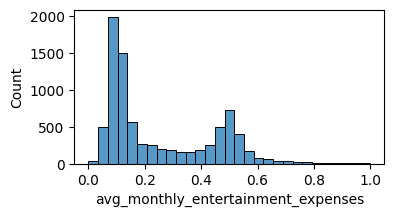

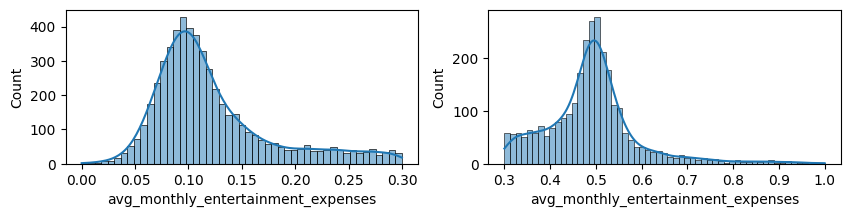

In [ ]:
# Visualize how the sample is divided
plt.figure(figsize=(4, 2))
sns.histplot(df1t_scaled_num['avg_monthly_entertainment_expenses'])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 2))
sns.histplot(df1t_scaled_num[df1t_scaled_num['avg_monthly_entertainment_expenses']<=0.3]['avg_monthly_entertainment_expenses'], kde=True, ax=ax1)
sns.histplot(df1t_scaled_num[df1t_scaled_num['avg_monthly_entertainment_expenses']>0.3]['avg_monthly_entertainment_expenses'], kde=True, ax=ax2)
plt.show()

Hence, binning the feature in two groups could be the best option for our purposes.

In [ ]:
# Create the feature entertainment_expenses_bin and visualize
df_bin['entertainment_expenses_bin'] = np.where(df1t_scaled_num['avg_monthly_entertainment_expenses'] <= 0.3, 0, 1)
df_bin['entertainment_expenses_bin'].value_counts()

entertainment_expenses_bin
0    5439
1    2888
Name: count, dtype: int64

##### avg_weekly_exercise_hours

Observing, from the previous plots, the distribution of the feature we catch that the sample can be divided in three categories depending on their average weekly exercise hours habits:

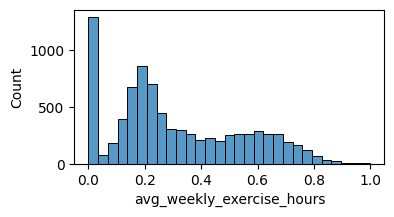

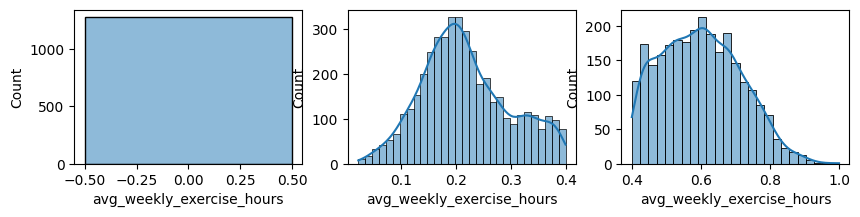

In [ ]:
# Visualize how the sample is divided
plt.figure(figsize=(4, 2))
sns.histplot(df1t_scaled_num['avg_weekly_exercise_hours'])
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 2))
sns.histplot(df1t_scaled_num[df1t_scaled_num['avg_weekly_exercise_hours']<=0]['avg_weekly_exercise_hours'], kde=True, ax=ax1)
sns.histplot(df1t_scaled_num[(df1t_scaled_num['avg_weekly_exercise_hours']>0)&(df1t_scaled_num['avg_weekly_exercise_hours']<0.4)]['avg_weekly_exercise_hours'], kde=True, ax=ax2)
sns.histplot(df1t_scaled_num[df1t_scaled_num['avg_weekly_exercise_hours']>=0.4]['avg_weekly_exercise_hours'], kde=True, ax=ax3)
plt.show()

Hence, binning the feature in three groups could be the best option for our purposes.

In [ ]:
# Create the feature exercise_hours_bin and visualize
conditions = [
    df1t_scaled_num['avg_weekly_exercise_hours'] == 0,
    (df1t_scaled_num['avg_weekly_exercise_hours'] > 0) & (df1t_scaled_num['avg_weekly_exercise_hours'] < 0.4),
    df1t_scaled_num['avg_weekly_exercise_hours'] >= 0.4
]

df_bin['exercise_hours_bin'] = np.select(conditions, [0, 1, 2])

df_bin['exercise_hours_bin'].value_counts()

exercise_hours_bin
1    4351
2    2693
0    1283
Name: count, dtype: int64

##### investment_portfolio_value

Observing, from the previous plots, the distribution of the feature we catch that the sample can be divided in three categories depending on their investment portfolio value habits; in particular in the ones who do not invest at all, the ones who are used to with (relatively) small quantities, and the few ones with extreme investment behaviours:

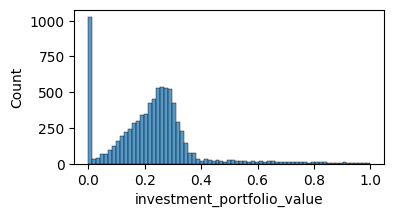

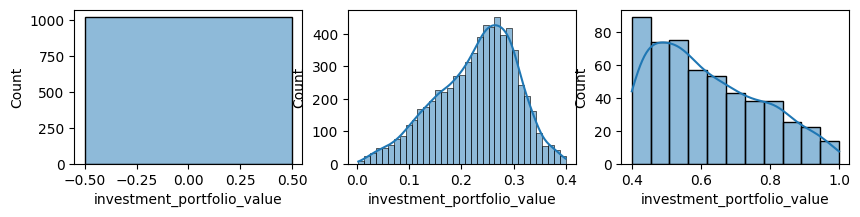

In [ ]:
# Visualize how the sample is divided
plt.figure(figsize=(4, 2))
sns.histplot(df1t_scaled_num['investment_portfolio_value'])
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 2))
sns.histplot(df1t_scaled_num[df1t_scaled_num['investment_portfolio_value']<=0]['investment_portfolio_value'], kde=True, ax=ax1)
sns.histplot(df1t_scaled_num[(df1t_scaled_num['investment_portfolio_value']>0)&(df1t_scaled_num['investment_portfolio_value']<0.4)]['investment_portfolio_value'], kde=True, ax=ax2)
sns.histplot(df1t_scaled_num[df1t_scaled_num['investment_portfolio_value']>=0.4]['investment_portfolio_value'], kde=True, ax=ax3)
plt.show()

Hence, binning the feature in three groups could be the best option for our purposes.

In [ ]:
# Create the feature portfolio_value_bin and visualize
conditions = [
    df1t_scaled_num['investment_portfolio_value'] == 0,
    (df1t_scaled_num['investment_portfolio_value'] > 0) & (df1t_scaled_num['investment_portfolio_value'] < 0.4),
    df1t_scaled_num['investment_portfolio_value'] >= 0.4
]

df_bin['portfolio_value_bin'] = np.select(conditions, [0, 1, 2])

df_bin['portfolio_value_bin'].value_counts()

portfolio_value_bin
1    6780
0    1019
2     528
Name: count, dtype: int64

##### last_year_charity_donations

Observing, from the previous plots, the distribution of the feature we catch that the sample can be divided in three categories depending on their investment portfolio value habits; in particular in the ones who have not donated at all, the ones who have but in (relatively) small quantities, and the others who have donated in very big amounts.

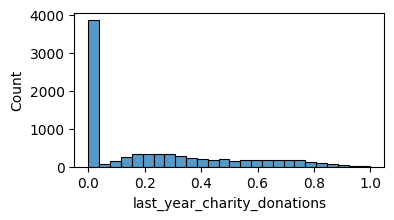

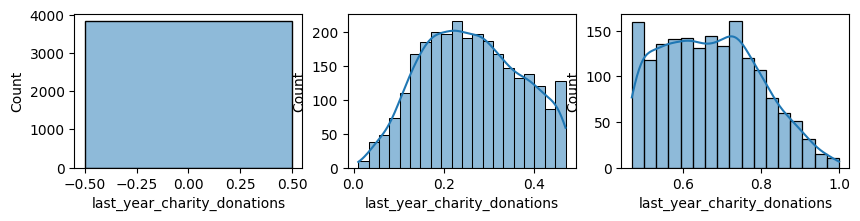

In [ ]:
# Visualize how the sample is divided
plt.figure(figsize=(4, 2))
sns.histplot(df1t_scaled_num['last_year_charity_donations'])
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 2))
sns.histplot(df1t_scaled_num[df1t_scaled_num['last_year_charity_donations']<=0]['last_year_charity_donations'], kde=True, ax=ax1)
sns.histplot(df1t_scaled_num[(df1t_scaled_num['last_year_charity_donations']>0)&(df1t_scaled_num['last_year_charity_donations']<0.47)]['last_year_charity_donations'], kde=True, ax=ax2)
sns.histplot(df1t_scaled_num[df1t_scaled_num['last_year_charity_donations']>=0.47]['last_year_charity_donations'], kde=True, ax=ax3)
plt.show()

Hence, binning the feature in three groups could be the best option for our purposes.

In [ ]:
# Create the feature donations_bin and visualize
conditions = [
    df1t_scaled_num['last_year_charity_donations'] == 0,
    (df1t_scaled_num['last_year_charity_donations'] > 0) & (df1t_scaled_num['last_year_charity_donations'] < 0.47),
    df1t_scaled_num['last_year_charity_donations'] >= 0.47
]

df_bin['donations_bin'] = np.select(conditions, [0, 1, 2])

df_bin['donations_bin'].value_counts()

donations_bin
0    3846
1    2744
2    1737
Name: count, dtype: int64

##### age

For this feature, the distribution does not show several spikes. We however think is a good idea to divide the sample in 5 equal separated groups wor the purposes mentioned at the beginning of the paragraph "Binning".

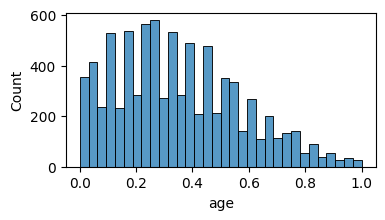

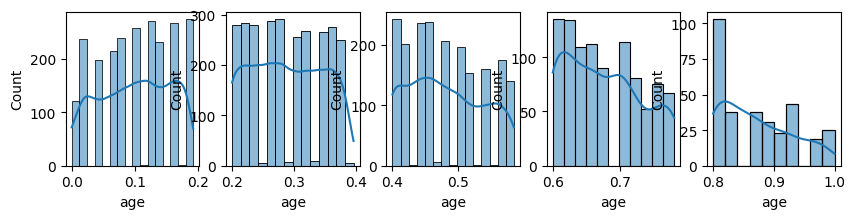

In [ ]:
# Visualize how the sample is divided
plt.figure(figsize=(4, 2))
sns.histplot(df1t_scaled_num['age'])
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(10, 2))
sns.histplot(df1t_scaled_num[df1t_scaled_num['age']<0.2]['age'], kde=True, ax=ax1)
sns.histplot(df1t_scaled_num[(df1t_scaled_num['age']>=0.2)&(df1t_scaled_num['age']<0.4)]['age'], kde=True, ax=ax2)
sns.histplot(df1t_scaled_num[(df1t_scaled_num['age']>=0.4)&(df1t_scaled_num['age']<0.6)]['age'], kde=True, ax=ax3)
sns.histplot(df1t_scaled_num[(df1t_scaled_num['age']>=0.6)&(df1t_scaled_num['age']<0.8)]['age'], kde=True, ax=ax4)
sns.histplot(df1t_scaled_num[df1t_scaled_num['age']>=0.8]['age'], kde=True, ax=ax5)
plt.show()

In [ ]:
# Create the feature age_bin and visualize
conditions = [
    df1t_scaled_num['age'] < 0.2,
    (df1t_scaled_num['age'] >= 0.2) & (df1t_scaled_num['age'] < 0.4),
    (df1t_scaled_num['age'] >= 0.4) & (df1t_scaled_num['age'] < 0.6),
    (df1t_scaled_num['age'] >= 0.6) & (df1t_scaled_num['age'] < 0.8),
    df1t_scaled_num['age'] >= 0.8
]

df_bin['age_bin'] = np.select(conditions, [0, 1, 2, 3, 4])
df_bin['age_bin'].value_counts()

age_bin
1    2763
0    2311
2    1964
3     969
4     320
Name: count, dtype: int64

##### education level

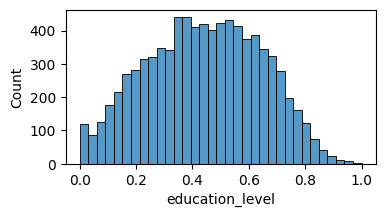

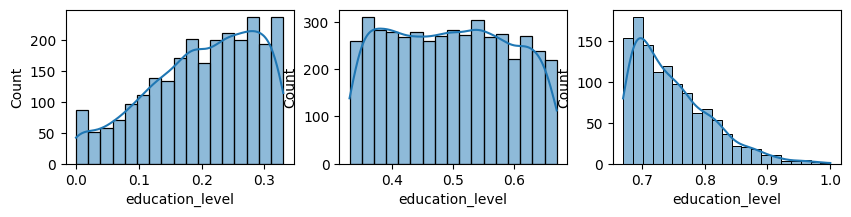

In [ ]:
# Visualize how the sample is divided
plt.figure(figsize=(4, 2))
sns.histplot(df1t_scaled_num['education_level'])
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 2))
sns.histplot(df1t_scaled_num[df1t_scaled_num['education_level']<=0.33]['education_level'], kde=True, ax=ax1)
sns.histplot(df1t_scaled_num[(df1t_scaled_num['education_level']>0.33)&(df1t_scaled_num['education_level']<0.67)]['education_level'], kde=True, ax=ax2)
sns.histplot(df1t_scaled_num[df1t_scaled_num['education_level']>=0.67]['education_level'], kde=True, ax=ax3)
plt.show()

In [ ]:
# Create the feature education_level_bin and visualize
conditions = [
    df1t_scaled_num['education_level'] <= 0.35,
    (df1t_scaled_num['education_level'] > 0.35) & (df1t_scaled_num['education_level'] < 0.65),
    df1t_scaled_num['education_level'] >= 0.65
]

df_bin['education_level_bin'] = np.select(conditions, [0, 1, 2])

df_bin['education_level_bin'].value_counts()

education_level_bin
1    4087
0    2819
2    1421
Name: count, dtype: int64

#### Data reduction

Now, in order to reduce the dimension of our dataframes, we decide to drop some columns. In particular we are dropping the ones we have already used to create a new feature which is surely going to be highly correlated with them:
- investments_risk_tolerance and investments_risk_appetite
- eco_consciousness_score and environmental_awareness_rating
- health_consciousness_rating and stress_management_score

In [ ]:
df1t_scaled_num.drop(columns=['investments_risk_tolerance', 'investments_risk_appetite', 'eco_consciousness_score', 'environmental_awareness_rating', 'health_consciousness_rating', 'stress_management_score'], inplace=True)

Moreover, we drop the 'title' feature, because we will use 'gender' from this moment.

In [ ]:
df1t.drop(columns=['title'], inplace=True)

We drop the 'city' feature according to what explained in insight 4.

In [ ]:
# Insight 4.
df1t.drop(columns=['city'], inplace=True)

## Additional insight

### Import country_happiness dataset

In [ ]:
happiness = pd.read_csv(path + 'Datasets/country_happiness.csv', delimiter= ',')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/ML_Group06/Datasets/country_happiness.csv'

In [ ]:
df1_happiness = happiness[['Country', 'Region', 'Happiness Rank', 'Trust (Government Corruption)', 'Health (Life Expectancy)']].copy()

In [ ]:
df1_happiness = df1_happiness[df1_happiness['Country'].isin(df_country)]

In [ ]:
df1_happiness.head(25)

### Import global air pollution dataset

In [ ]:
# Import the dataset
pollution = pd.read_csv(path + 'Datasets/global air pollution dataset.csv', delimiter= ',')
pollution.head()

In [ ]:
# Make a copy of the dataframe with only the useful features
df1_pollution = pollution[['Country', 'AQI Value', 'AQI Category']].copy()
df1_pollution.head(10).T

In [ ]:
# Replace not matching (with our main dataframe) values
df1_pollution['Country'] = df1_pollution['Country'].replace('United States of America', 'United States')
df1_pollution['Country'] = df1_pollution['Country'].replace('United Kingdom of Great Britain and Northern Ireland', 'United Kingdom')

In [ ]:
# Keep only the rows whose country is in df_country
df1_pollution = df1_pollution[df1_pollution['Country'].isin(df_country)]

In [ ]:
# Assign only one AQI Value (the median) per each country
df2_pollution = df1_pollution.groupby('Country', as_index=False)[['AQI Value']].median()
df2_pollution.head(25).T

In [ ]:
# Add the new country 'Iran' because not included in the df1_pollution but it is in df_country, with the respective AQI Value gained by searching it directly in any browser
new_row = pd.DataFrame([{'Country': 'Iran', 'AQI Value': 70}])
df2_pollution = pd.concat([df2_pollution, new_row], ignore_index=True)

In [ ]:
# Show the dataframe with a scatterplot (cleaner in this case than a histogram)
plt.figure(figsize=(25, 5))
sns.scatterplot(x=df2_pollution['Country'],y=df2_pollution['AQI Value'])

In [ ]:
# Divide the AQI Value in three main global categories
df2_pollution['AQI Category'] = np.where(df2_pollution['AQI Value'] <= 50, 'Good', np.where(df2_pollution['AQI Value'] <= 100, 'Moderate', 'Unhealthy'))

In [ ]:
# Assign every country to the respective list their AQI Category belong
good_air = df2_pollution[df2_pollution['AQI Category'] == 'Good']['Country'].values
moderate_air = df2_pollution[df2_pollution['AQI Category'] == 'Moderate']['Country'].values
unhealthy_air = df2_pollution[df2_pollution['AQI Category'] == 'Unhealthy']['Country'].values

### Merge dataframes

Now, in order to make more clear the next steps, we list the the dataframe we will use to gain some valuable results, looking at their columns first, and merging them to an unique dataframe then

In [ ]:
df1t_scaled_num.columns

In [ ]:
df_bin.columns

In [ ]:
# Create a new dataframe obtained by merging the useful ones we transformed or created so far
df2 = pd.concat([df1t_scaled_num, df_bin, df1t[['country','continent']]], axis=1)
df2.index = df1.index

In [ ]:
df2.columns

### Happiness insights

In [ ]:
# Merge the dataframe df2 with some relevant features of df1_happiness, rename some columns and drop the redundant feature
df2 = df2.merge(df1_happiness[['Country', 'Trust (Government Corruption)', 'Happiness Rank', 'Health (Life Expectancy)']],
                left_on='country', right_on='Country', how='left')
df2.rename(columns={'Trust (Government Corruption)': 'Trust'}, inplace=True)
df2.rename(columns={'Health (Life Expectancy)': 'Life Expectancy'}, inplace=True)
df2.drop(columns='Country', inplace=True)
df2.index = df1.index

From now, we will group by the 'continent' feature of df2 in order to highlight some relevant differences or analogies in our dataframe with some of the features of df1_happiness:

In [ ]:
df2.groupby('continent')['Happiness Rank'].mean()

In [ ]:
df2.groupby('continent')['Life Expectancy'].mean()

In [ ]:
df2.groupby('continent')['Trust'].mean()

These outputs show the following results:
- averagely the countries in Oceania and North America have a very high happiness rank, they are followed by the ones in West Europe and South America  (whose happiness rank is still pretty high), afterwards there are the countries in  East Europe and lastly the ones in Asia
- the Life Expectancy averagely changes pretty much between different continents: the people living in Oceania, West Europe and North America are the ones with the highest life expectancy, followed by the ones living in South America and East Europe, and lastly people living in Asia are the ones with the lowest life expectancy
- the average Trust (Government Corruption) increases the gap already seen between the continents

We think the insights provided are useful in order to have an overview on how the happiness rank changes across the population of different continents, hence we have mentioned them.

### Pollution insights

In [ ]:
# Merge the dataframe df2 with AQI Value of df2_pollution
df2 = df2.merge(df2_pollution[['Country', 'AQI Value']],
                left_on='country', right_on='Country', how='left')
df2.drop(columns='Country', inplace=True)
df2.index = df1.index

In [ ]:



















# Create a function to bin the AQI Value in categories
def get_aqi_category(country):
    if country in good_air:
        return 'Good'
    elif country in moderate_air:
        return 'Moderate'
    else:
        return 'Unhealthy'

# Apply to your DataFrame
df2['AQI Category'] = df2['country'].apply(get_aqi_category)

From now, we will analyze how the different AQI Category of the country a citizen of the sample is living in can averagely affect others of his features:

In [ ]:
df2.groupby('AQI Category')['well_being_level'].mean()

In [ ]:
df2[['AQI Value', 'well_being_level']].corr()

In [ ]:
df2.groupby('AQI Category')['eco_friendly_attitude'].mean()

In [ ]:
df2[['AQI Value', 'eco_friendly_attitude']].corr()

In [ ]:
df2.groupby('AQI Category')['health_habits'].mean()

In [ ]:
df2[['AQI Value', 'health_habits']].corr()

Unexpectedly the AQI Category does not averagely affect the citizen's well being level, eco friendly attitude and healthy habits; moreover, it is clear that the AQI Value and the three features mentioned are almost uncorrelated.

This result highlights the fact that a citizen well being, or his healthy abits, or his attitude towards the environment is not directly linked to the air quality index of his hometown

In [ ]:
df2.groupby('continent')['AQI Value'].mean()

On the other hand, again a big gap between continents is clearly visible: averagely Oceania's AQI Value is the lowest, the Asian one is the higher while the other continents stay in the middle

### Last year donations insights

**Regarding investment portfolio value**

In [ ]:
df2.groupby(['portfolio_value_bin', 'continent'])['last_year_charity_donations'].mean()

In [ ]:
df2.groupby(['portfolio_value_bin', 'gender'])['last_year_charity_donations'].mean()

It is interesting to note how people with the highest investment portfolio value averagely have donated less than the people with a null or medium investment portfolio value; logical consequences follow.

Moreover, is interesting to observe that the amount donated averagely does not change that much between continents, and is not related to the gender.

**Regarding education level**

In [ ]:
df2.groupby('education_level_bin')['last_year_charity_donations'].agg(['mean', 'var'])

On the other hand, by the output above we observe that averagely the higher is the education level of a citizen, the higher are the money by him donated last year

In [ ]:
df2.groupby(['portfolio_value_bin', 'education_level_bin'])['last_year_charity_donations'].mean()

At the same time, is pretty interesting to observe that averagely, the citizens with a null investment portfolio value with a high education level have donated more than the ones with a medium or small education level, which goes in contrast with what is observable across citizens with a high investment portfolio value, where averagely the highest is their education level the lowest is the last year donations value

### Well being level

In [ ]:
df2.groupby('entertainment_expenses_bin')['well_being_level'].agg(['mean', 'var'])

The last output shows us an interesting relationship: we can state with a good accuracy, since the variances are pretty low, that averagely if a citizen spends more in entertainment his well being level would be higher.

In [ ]:
df2.groupby('exercise_hours_bin')['well_being_level'].mean()

On the other hand, the output above shows not positive relationship between the avg weekly exercise hours of a citizen and his well being level.

In [ ]:
df2.groupby('portfolio_value_bin')['well_being_level'].mean()

This output goes close to one of the intuitions gained in "Additional visualization": indeed, from the sample it seems that the well being level is not necessarily positive correlated with the investment portfolio value. More accurately, averagely the citizens with a medium investment portfolio value are the ones with the higher well being level.

In [ ]:
df2.groupby('continent')['well_being_level'].agg(['mean', 'var'])

Lastly, we want to mention even this result: averagely the well being level of a citizen does not clearly depend by the continent where he is living.

## Feature Selection

Our goal is to retain features that help reveal natural groupings in the data. Since there is no target variable, we rely on statistics.

We’ll retain features that:
- Have variance (not constant)
- Are not strongly correlated (to avoid redundancy)
- Are scaled properly (important for clustering)

### List of useful features and dataframes for the clustering phase

Let's have a look on the dataframes we will working with:

In [ ]:
df2.columns

In [ ]:
df2_num = df2[['avg_monthly_entertainment_expenses', 'avg_weekly_exercise_hours',
               'education_level', 'financial_wellness_index', 'investment_portfolio_value',
               'last_year_charity_donations', 'social_media_influence_score', 'well_being_level',
               'gender', 'investments_risk_attitude', 'eco_friendly_attitude', 'health_habits',
               'age', 'Trust', 'Happiness Rank',
               'Life Expectancy', 'AQI Value']].copy()

In [ ]:
# Scale some features in order to use K-means, which uses Euclidean distances
for col in ['Trust', 'Happiness Rank', 'Life Expectancy', 'AQI Value']:
    scale_feature(df2_num, col)
df2_num[['Trust', 'Happiness Rank', 'Life Expectancy', 'AQI Value']].describe()

In [ ]:
df_country.columns

### Check for univariate features

In [ ]:
# Check that all the numerical features are not deterministic
df2_num.var()

None feature has a null variance, which means that none column is deterministic, hence we are keeping all of them for now.

### Correlation matrixes

In [ ]:
mask = np.zeros_like(df2_num.corr('spearman'))
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15,15))
    ax = sns.heatmap(df2_num.corr('spearman'),mask=mask, annot = True,cmap='coolwarm',square=True,vmin=-1, vmax=1)

In [ ]:
mask = np.zeros_like(df2_num.corr('kendall'))
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15,15))
    ax = sns.heatmap(df2_num.corr('kendall'),mask=mask, annot = True,cmap='coolwarm',square=True,vmin=-1, vmax=1)

We are not using the Pearson correlation because it assumes the normal distributions of the features, which is not always our case. However, both matrixes are suggesting us to drop two features: in particular, we are dropping well_being_level and not the health_habits because we are using the well_being_level in order to explain the health_habits, but the viceversa does not hold, while we are dropping Trust instead of Happiness Rank because we think is less meaningful than the other column for our purposes.

In [ ]:
# Drop
df2_num.drop(columns=['well_being_level', 'Trust'], inplace=True)

### Creation of subsets of the dataframe

In [ ]:
df2_num.columns

Lastly, we create some subsets with features we believe could provide valuable clusters

Firstly we tried to use every singly column, except the features created from external datasets, the binned features, and most importantly gender, which has proven itself to be the only feature separating the clusters.

In [ ]:
df_subset_1 = df2[['avg_monthly_entertainment_expenses', 'avg_weekly_exercise_hours',
       'education_level', 'financial_wellness_index',
       'investment_portfolio_value', 'last_year_charity_donations',
       'social_media_influence_score', 'age',
       'investments_risk_attitude', 'eco_friendly_attitude', 'health_habits']].copy()

In [ ]:
df_subset_2 = df2[['avg_monthly_entertainment_expenses', 'avg_weekly_exercise_hours',
       'education_level', 'financial_wellness_index',
       'investment_portfolio_value', 'last_year_charity_donations',
       'social_media_influence_score', 'age',
       'investments_risk_attitude', 'eco_friendly_attitude', 'health_habits']].copy()

We also tried creating a financial profile subset, however it was of no use.

In [ ]:
df_financial = df2[['financial_wellness_index', 'investment_portfolio_value', 'last_year_charity_donations', 'investments_risk_attitude', 'age']].copy()

The same followed for educational profile.

In [ ]:
df_education = pd.concat([df2[['education_level', 'eco_friendly_attitude', 'financial_wellness_index', 'age']], df_country], axis=1).copy()

## Clustering Phase

### function

Copied from practical class example.

In [ ]:
def cluster_profiles(df, label_columns, figsize, compar_titles=None):
    if compar_titles == None:
        compar_titles = [""]*len(label_columns)

    fig, axes = plt.subplots(nrows=len(label_columns), ncols=2, figsize=figsize, squeeze=False)
    for ax, label, titl in zip(axes, label_columns, compar_titles):
        # Filtering df
        drop_cols = [i for i in label_columns if i!=label]
        dfax = df.drop(drop_cols, axis=1)

        # Getting the cluster centroids and counts
        centroids = dfax.groupby(by=label, as_index=False).mean()
        counts = dfax.groupby(by=label, as_index=False).count().iloc[:,[0,1]]
        counts.columns = [label, "counts"]
        color = sns.color_palette('Dark2')

        # Setting Data
        pd.plotting.parallel_coordinates(centroids, label, color=color, ax=ax[0])
        sns.barplot(x=label, y="counts", data=counts, ax=ax[1], palette = color)

        #Setting Layout
        handles, _ = ax[0].get_legend_handles_labels()
        cluster_labels = ["Cluster {}".format(i) for i in range(len(handles))]
        ax[0].annotate(text=titl, xy=(0.95,1.1), xycoords='axes fraction', fontsize=16, fontweight = 'heavy')
        ax[0].legend(handles, cluster_labels) # Adaptable to number of clusters
        ax[0].axhline(color="black", linestyle="--")
        ax[0].set_title("Cluster Means - {} Clusters".format(len(handles)), fontsize=16)
        ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-20)
        ax[1].set_xticklabels(cluster_labels)
        ax[1].set_xlabel("")
        ax[1].set_ylabel("Absolute Frequency")
        ax[1].set_title("Cluster Sizes - {} Clusters".format(len(handles)), fontsize=16)


    plt.subplots_adjust(hspace=0.4, top=0.90, bottom = 0.2)
    plt.suptitle("Cluster Profiling", fontsize=23)
    plt.show()

### K-means

For each of the subsets we are using a dendrogram and an elbow method to choose the best number of clusters.

#### df_education

In [ ]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(df_education)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)


In [ ]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot().
plt.plot(ks, inertias)

# define the label for x axis as 'k' using matplotlib.pyplot.xlabel
plt.xlabel('k')
# define the label for y axis as 'SSE' using matplotlib.pyplot.ylabel
plt.ylabel('SSE')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

In [ ]:
hclustering = linkage(df_education, 'ward')

In [ ]:
# define the title of the plot
plt.title('Hierarchical Clustering Dendrogram (truncated)')
# define the label for x axis
plt.xlabel('Observations')
# define the label for y axis
plt.ylabel('Distance')

# Draw the dendrogram
dendrogram(
    hclustering,
    truncate_mode='lastp',  # truncation is used to condense the dendrogram
    color_threshold=250,    # height (distance) at which the clusters are formed
    p=12,                   # p parameter for truncate_mode
    show_leaf_counts=True,  # number of observations each leaf node contains in parentheses
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.show()

The elbow method is not informative at all, however the dendrogram would suggest to use 2 clusters. This is what we are going to proceed with.

In [ ]:
model = KMeans(n_clusters=2, random_state=42)

In [ ]:
model.fit(df_education)

In [ ]:
model.cluster_centers_

In [ ]:
df_education['lifestyle'] = model.labels_

In [ ]:
xs = df_education.iloc[:,0]
ys = df_education.iloc[:,1]

In [ ]:
#from sklearn.cluster import KMeans

model = KMeans(n_clusters=2).fit(df_education)
labels = model.labels_
labels

In [ ]:
plt.scatter(xs, ys, c=labels)

In [ ]:
cluster_profiles(df_education, ['lifestyle'], figsize=(32, 10))

The only features that are separating the clusters are the countries, therefore we are going to proceed with a different subset.

#### df_financial

In [ ]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(df_financial)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)


In [ ]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot().
plt.plot(ks, inertias)

# define the label for x axis as 'k' using matplotlib.pyplot.xlabel
plt.xlabel('k')
# define the label for y axis as 'SSE' using matplotlib.pyplot.ylabel
plt.ylabel('SSE')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

In [ ]:
hclustering = linkage(df_financial, 'ward')

In [ ]:
# define the title of the plot
plt.title('Hierarchical Clustering Dendrogram (truncated)')
# define the label for x axis
plt.xlabel('Observations')
# define the label for y axis
plt.ylabel('Distance')

# Draw the dendogram
dendrogram(
    hclustering,
    truncate_mode='lastp',  # truncation is used to condense the dendrogram
    color_threshold=250,    # height (distance) at which the clusters are formed
    p=12,                   # p parameter for truncate_mode
    show_leaf_counts=True,  # number of observations each leaf node contains in parentheses
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.show()

The elbow method would suggest us to use either 2 or 3 clusters, however the dendrogram clearly shows that we need to use 2 clusters.

In [ ]:
model = KMeans(n_clusters=2, random_state=42)

In [ ]:
model.fit(df_financial)

In [ ]:
model.cluster_centers_

In [ ]:
df_financial['lifestyle'] = model.labels_

In [ ]:
xs = df_financial.iloc[:,0]
ys = df_financial.iloc[:,1]

In [ ]:
#from sklearn.cluster import KMeans

model = KMeans(n_clusters=2).fit(df_financial)
labels = model.labels_
labels

In [ ]:
plt.scatter(xs, ys, c=labels)

In [ ]:
cluster_profiles(df_financial, ['lifestyle'], figsize=(32, 10))

Only one feature is separating the clusters. Useless again, proceeding with a different subset.

#### df_subset_1

In [ ]:
mask = np.zeros_like(df_subset_1.corr("spearman"))
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15,15))
    ax = sns.heatmap(df_subset_1.corr("spearman"),mask=mask, annot = True,cmap='coolwarm',square=True,vmin=-1, vmax=1)

In [ ]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(df_subset_1)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)


In [ ]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot().
plt.plot(ks, inertias)

# define the label for x axis as 'k'
plt.xlabel('k')
# define the label for y axis as 'SSE'
plt.ylabel('SSE')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
plt.show()

In [ ]:
hclustering = linkage(df_subset_1, 'ward')

In [ ]:
# define the title of the plot
plt.title('Hierarchical Clustering Dendrogram (truncated)')
# define the label for x axis
plt.xlabel('Observations')
# define the label for y axis
plt.ylabel('Distance')

# Draw the dendogram
dendrogram(
    hclustering,
    truncate_mode='lastp',  # truncation is used to condense the dendrogram
    color_threshold=250,    # height (distance) at which the clusters are formed
    p=12,                   # p parameter for truncate_mode
    show_leaf_counts=True,  # number of observations each leaf node contains in parentheses
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.show()

There is no clear separation between 2 or 3 clusters based on the elbow method and the dendrogram. After having compared both outputs with 2 and 3 clusters, we have decided to keep the dataframe with the 3 clusters, because there was slightly more seperation between the clusters.

In [ ]:
model = KMeans(n_clusters=3, random_state=42)

In [ ]:
model.fit(df_subset_1)

In [ ]:
model.cluster_centers_

In [ ]:
df_subset_1['lifestyle'] = model.labels_
df_subset_1.head(20).T

In [ ]:
xs = df_subset_1.iloc[:,0]
ys = df_subset_1.iloc[:,1]

In [ ]:
#from sklearn.cluster import KMeans

model = KMeans(n_clusters=2).fit(df_subset_1)
labels = model.labels_
labels

In [ ]:
plt.scatter(xs, ys, c=labels)

In [ ]:
cluster_profiles(df_subset_1, ['lifestyle'], figsize=(32, 10))

Pretty good, but can be better, let's try something else.

#### df_subset_2

We will be merging similar features into one, and dropping the original features.

In [ ]:
df_subset_2['lifestyle_index'] = df_subset_2[['health_habits', 'avg_weekly_exercise_hours', 'eco_friendly_attitude']].mean(axis=1)
df_subset_2['social_engagement_score'] = df_subset_2[['last_year_charity_donations', 'social_media_influence_score']].mean(axis=1)
df_subset_2['financial_strength'] = df_subset_2[['education_level', 'investment_portfolio_value', 'financial_wellness_index']].mean(axis=1)

In [ ]:
df_subset_2.drop(['health_habits', 'avg_weekly_exercise_hours', 'eco_friendly_attitude'], axis=1, inplace=True)
df_subset_2.drop(['last_year_charity_donations', 'social_media_influence_score'], axis=1, inplace=True)
df_subset_2.drop(['education_level', 'investment_portfolio_value', 'financial_wellness_index'], axis=1, inplace=True)
df_subset_2.drop(['age'], axis=1, inplace=True)

In [ ]:
mask = np.zeros_like(df_subset_2.corr("spearman"))
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15,15))
    ax = sns.heatmap(df_subset_2.corr("spearman"),mask=mask, annot = True,cmap='coolwarm',square=True,vmin=-1, vmax=1)

In [ ]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(df_subset_2)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)


In [ ]:
# Plot ks (x-axis) vs inertias (y-axis) using plt.plot().
plt.plot(ks, inertias)

# define the label for x axis as 'k' using matplotlib.pyplot.xlabel
plt.xlabel('k')
# define the label for y axis as 'SSE' using matplotlib.pyplot.ylabel
plt.ylabel('SSE')
# define the ticks in x axis using the values of ks
plt.xticks(ks)
# call plt.show()
plt.show()

In [ ]:
hclustering = linkage(df_subset_2, 'ward')

In [ ]:
# define the title of the plot
plt.title('Hierarchical Clustering Dendrogram (truncated)')
# define the label for x axis
plt.xlabel('Observations')
# define the label for y axis
plt.ylabel('Distance')

# Draw the dendogram
dendrogram(
    hclustering,
    truncate_mode='lastp',  # truncation is used to condense the dendrogram
    color_threshold=250,    # height (distance) at which the clusters are formed
    p=12,                   # p parameter for truncate_mode
    show_leaf_counts=True,  # number of observations each leaf node contains in parentheses
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.show()

In [ ]:
model = KMeans(n_clusters=3, random_state=42)

In [ ]:
model.fit(df_subset_2)

In [ ]:
model.cluster_centers_

In [ ]:
df_subset_2['lifestyle'] = model.labels_
df_subset_2.head(20).T

In [ ]:
xs = df_subset_2.iloc[:,0]
ys = df_subset_2.iloc[:,1]

In [ ]:
#from sklearn.cluster import KMeans

model = KMeans(n_clusters=2).fit(df_subset_2)
labels = model.labels_
labels

In [ ]:
plt.scatter(xs, ys, c=labels)

In [ ]:
cluster_profiles(df_subset_2, ['lifestyle'], figsize=(32, 10))

Merging similar features has proven to be much worse :), we give up for now.

Next we are going to try different subsets, look into PCA, if nothing of that works well, we are going to go back to preprocessing, try making new perspectives or using different seeds for k-means.

# Supervised Learning

## Target feature

Let's start dealing with insight 0, separating the data from our target

In [ ]:
df1_target = citizens['lifestyle'].copy()
df1_data = citizens.drop(['lifestyle'], axis=1).copy()

In [ ]:
df1_target.value_counts()

lifestyle
Health-Conscious      2795
Investor              2778
Fitness Enthusiast    2754
Name: count, dtype: int64

In [ ]:
df1_target.isna().sum()

np.int64(0)

The target feature only presents 3 different values and none missing value

### Target Encoding

The need to encode a categorical feature also applies to target feature (mentioned in insight 0). We will proceed with label encoding for now.

In [ ]:
encoder = LabelEncoder()
df1_target_encoded = encoder.fit_transform(df1_target)

In [ ]:
df1_target = pd.DataFrame({
    'lifestyle': df1_target,
    'lifestyle_encoded': df1_target_encoded
})


In [ ]:
df1_target.value_counts()

lifestyle           lifestyle_encoded
Health-Conscious    1                    2795
Investor            2                    2778
Fitness Enthusiast  0                    2754
Name: count, dtype: int64

In [ ]:
df1_target.isna().sum()

lifestyle            0
lifestyle_encoded    0
dtype: int64

## Data Partitioning


In [ ]:
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5)
kf.split(df1_data)

<generator object _BaseKFold.split at 0x7ab509571000>

In [ ]:
# Divide the data into 5 folds, indexing them from 1 to 5, separating (for each fold) the train-validation dataframe to the test one
df1_data_train_val, df1_data_test = {}, {}
df1_target_train_val, df1_target_test = {}, {}
i=1
for train_index, test_index in kf.split(df1_data):
    df1_data_train_val[i], df1_data_test[i] = df1_data.iloc[train_index], df1_data.iloc[test_index]
    df1_target_train_val[i], df1_target_test[i] = df1_target.iloc[train_index], df1_target.iloc[test_index]
    i+=1

In [ ]:
# Divide each of the 5 train-validation dataframes in train dataframe (75% of the train-validation df) and validation dataframe (25%)
df1_data_train, df1_data_val, df1_target_train, df1_target_val = {}, {}, {}, {}
for i in range(1,6):
  df1_data_train[i], df1_data_val[i], df1_target_train[i], df1_target_val[i] = train_test_split(df1_data_train_val[i],
                                                                                                df1_target_train_val[i],
                                                                                                test_size = 0.25,
                                                                                                random_state = 15,
                                                                                                shuffle = True,
                                                                                                stratify = df1_target_train_val[i]
                                                                                                )

In [ ]:
for i in range(1,6):
  print('train:{}% | validation:{}% | test:{}%'.format(round(len(df1_target_train[i])/len(df1_target),2)*100,
                                                     round(len(df1_target_val[i])/len(df1_target),2)*100,
                                                     round(len(df1_target_test[i])/len(df1_target),2)*100
                                                    ))

train:60.0% | validation:20.0% | test:20.0%
train:60.0% | validation:20.0% | test:20.0%
train:60.0% | validation:20.0% | test:20.0%
train:60.0% | validation:20.0% | test:20.0%
train:60.0% | validation:20.0% | test:20.0%


The train-validation-test dataframes corresponds to, respectively, 60%-20%-20% of every of the 5 sub-dataframes obtained by k-fold cross-validation

## Data Preprocessing

Now that we have all the needed dataframes, we will create some functions in order to make in a standardized and efficient way the data preprocessing.
In particular, note that the majority of the reasoning we will follow during this phase have been explained deeply in the unsupervised learning

### functions

In [ ]:
# Setting id as index
def set_index(df):
  df.set_index('citizen_id', inplace=True)

In [ ]:
# Deleting column with constant values (hapiness_level), one with no values (marital_status), one that offers no additional info (name) and one with not relevant informations (city)
def remove_useless_columns(df):
  df = df.copy()
  df.drop(columns=['hapiness_level','marital_status', 'name', 'city'], inplace=True)
  return df

In [ ]:
# modify some data types
def data_types(df):
  # Scale values to actual dollars
  thousand_columns = ['investment_portfolio_value', 'last_year_charity_donations']
  df.loc[:, thousand_columns] = df.loc[:, thousand_columns] * 1000
  # Convert date_of_birth to datetime format
  df.loc[:, 'date_of_birth'] = pd.to_datetime(df['date_of_birth'], errors='coerce')
  # Modify data type of 'title' and 'country' in str
  in_str_features = ['title', 'country']
  df.loc[:, in_str_features] = df.loc[:, in_str_features].astype("string")
  return df

In [ ]:
def add_features(df):
  # add 'age' and drop 'date_of_birth'
  today = datetime.today()
  def calculate_age(dob):
    if pd.isnull(dob):
        return np.nan
    age = today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
    return age if age >= 0 else np.nan
  df["age"] = df["date_of_birth"].apply(calculate_age)
  df.drop(columns=["date_of_birth"], inplace=True)

  # add 'gender' and drop 'title'
  df['gender'] = np.where((df['title']=='Mrs.')|(df['title']=='Ms.')|(df['title']=='Mx.'),1,0)
  df.drop(columns=['title'], inplace=True)
  return df

In [ ]:
# Remove invalid values according to insights 1., 2., 10.
def remove_incoherencies(df):
  # insight 1.
  cols = ["health_consciousness_rating", "environmental_awareness_rating"]
  for col in cols:
    df.loc[~df[col].between(0,10), col] = float("nan")
  # insight 2.
  cols = ['avg_monthly_entertainment_expenses', 'avg_weekly_exercise_hours', 'education_level', 'last_year_charity_donations']
  for col in cols:
    df.loc[df[col] < 0, col] = float("nan")
  # insight 10.
  df.loc[(df['age'] < 3) | (df['age'] > 112), 'age'] = float("nan")
  return df

In [ ]:
# For linear or distance-based models (like Logistic Regression or KNN), extremely skewed variables can sometimes degrade performance, and transformations might help in those cases.
# since we will use knn to deal with missing values, we need to transform some features, according to the reasoning explained in the unsupervised learning
def transformations(df):
  cube_root_transform(df, 'avg_weekly_exercise_hours')
  sqrt_transform(df, 'eco_consciousness_score')
  log_transform(df, 'environmental_awareness_rating')
  sqrt_transform(df, 'financial_wellness_index')
  sqrt_transform(df, 'health_consciousness_rating')
  sqrt_transform(df, 'investment_portfolio_value')
  log_transform(df, 'investments_risk_tolerance')
  cube_root_transform(df, 'last_year_charity_donations')
  sqrt_transform(df, 'social_media_influence_score')
  log1p_transform(df, 'stress_management_score')
  log_transform(df, 'well_being_level')
  return df

In [ ]:
def outliers(df):
  # avg_monthly_entertainment_expenses
  remove_outliers_iqr(df, 'avg_monthly_entertainment_expenses')
  # eco_consciousness_score
  remove_outliers_iqr_3(df, 'eco_consciousness_score')
  # environmental_awareness_rating
  remove_outliers_iqr_3(df, 'environmental_awareness_rating')
  # financial_wellness_index
  remove_outliers_iqr_3(df, 'financial_wellness_index')
  # health_consciousness_rating
  remove_outliers_iqr_3(df, 'health_consciousness_rating')
  # investment_portfolio_value
  remove_outliers_iqr_3(df, 'investment_portfolio_value')
  # investments_risk_tolerance
  remove_outliers_iqr_3(df, 'investments_risk_tolerance')
  # last_year_charity_donations
  remove_outliers_iqr(df, 'last_year_charity_donations')
  # social_media_influence_score
  remove_outliers_iqr_3(df, 'social_media_influence_score')
  # stress_management_score
  remove_outliers_iqr_3(df, 'stress_management_score')
  # well_being_level
  remove_outliers_iqr_3(df, 'well_being_level')
  return df

In [ ]:
def scale_df_with_respect_to_df_train(df, df_train):
  df = df.copy()
  for column in numerical_features:
    max_value = df_train[column].max()
    min_value = df_train[column].min()
    df[column] = (df[column] - min_value) / (max_value - min_value)
  return df

In [ ]:
def fill_missing_values_with_knn_supervised(df, target_feature, n=5):
    # Subset only the numerical data
    numeric_df = df[numerical_features]

    # Apply KNN Imputer
    imputer = KNNImputer(n_neighbors=n)
    imputed_data = imputer.fit_transform(numeric_df)

    # Convert back to DataFrame
    imputed_df = pd.DataFrame(imputed_data, columns=numerical_features, index=df.index)

    # Return only the column that was imputed
    return imputed_df[target_feature]

def missing_values(df):
  # numerical features
  for column in numerical_features:
    imputed_column = fill_missing_values_with_knn_supervised(df, column)
    df.loc[:, column] = imputed_column
  # categorical features
  categorical_features = ['country','gender']
  for column in categorical_features:
    df[column] = df[column].fillna(df[column].mode()[0])
  return df

In [ ]:
def add_continent_features(df):
  # add continent's features and drop country
  west_europe = ['Spain', 'Netherlands', 'France', 'United Kingdom', 'Finland',	'Germany', 'Switzerland', 'Norway', 'Denmark', 'Ireland']
  east_europe = ['Turkey', 'Ukraine', 'Serbia']
  north_america = ['United States', 'Canada']
  south_america = ['Brazil', 'Mexico']
  oceania = ['Australia', 'New Zealand']
  asia = ['India', 'Iran']
  df['Asia'] = np.where(df['country'].isin(asia), 1, 0)
  df['East Europe'] = np.where(df['country'].isin(east_europe), 1, 0)
  df['West Europe'] = np.where(df['country'].isin(west_europe), 1, 0)
  df['North America'] = np.where(df['country'].isin(north_america), 1, 0)
  df['South America'] = np.where(df['country'].isin(south_america), 1, 0)
  df['Oceania'] = np.where(df['country'].isin(oceania), 1, 0)
  df.drop(columns=['country'], inplace=True)
  return df

In [ ]:
def first_prep(df):
  set_index(df)
  df_1 = remove_useless_columns(df)
  df_2 = data_types(df_1)
  df_3 = add_features(df_2)
  df_4 = remove_incoherencies(df_3)
  df_5 = transformations(df_4)
  return df_5
  # outliers is obviously omitted (the goodness of a model is even evaluated on the capability of dealing with extreme values)

In [ ]:
def second_prep(df, df_train):
  df_output = scale_df_with_respect_to_df_train(df, df_train)
  df_output = missing_values(df_output)
  df_output = add_continent_features(df_output)
  return df_output

### apply functions

In [ ]:
df2_data_train, df2_data_val, df2_data_test  = {}, {}, {}
for i in range(1,6):
  df1_data_train[i] = first_prep(df1_data_train[i])
  df1_data_train[i] = outliers(df1_data_train[i])
  df2_data_train[i] = second_prep(df1_data_train[i], df1_data_train[i])

  df1_data_val[i] = first_prep(df1_data_val[i])
  df2_data_val[i] = second_prep(df1_data_val[i], df1_data_train[i])

  df1_data_test[i] = first_prep(df1_data_test[i])
  df2_data_test[i] = second_prep(df1_data_test[i], df1_data_train[i])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = geta

In [ ]:
# drop lifestyle
for i in range(1,6):
  df1_target_train[i].drop(columns=['lifestyle'], inplace=True)
  df1_target_val[i].drop(columns=['lifestyle'], inplace=True)
  df1_target_test[i].drop(columns=['lifestyle'], inplace=True)

<ipython-input-181-fa32486059df>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_target_test[i].drop(columns=['lifestyle'], inplace=True)
<ipython-input-181-fa32486059df>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_target_test[i].drop(columns=['lifestyle'], inplace=True)
<ipython-input-181-fa32486059df>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_target_test[i].drop(columns=['lifestyle'], inplace=True)
<ipython-i

From here in advance we will be using df2_data_(train/val/test)[i] (i=1,...,5) as scaled dataframes (with respect to the training df to avoid data leakage) without missing values to build our supervised models and df1_target_(train/val/test)[i] (i=1,...,5) as the target dataframe to respectively train, validate and test our models

In [ ]:
df2_data_val[1].head().T

## Decision Tree

### Visualization of the decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
!pip install graphviz
!pip install pydotplus
!pip install dtreeviz

In [ ]:
# import the needed packages
from sklearn import tree
from sklearn.tree import export_graphviz
from dtreeviz import dtreeviz
import graphviz
import pydotplus
import os

#set path for graphviz
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

In [ ]:
def plot_feature_importances(model):
    n_features = df2_data_train[i].shape[1]
    plt.figure(figsize=(20,10))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), df2_data_train[i].columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()

### fold 1

In [ ]:
i=1

Importing the model and create an instance with the default parameters.

In [ ]:
modelDT_1_1 = DecisionTreeClassifier()

Train the model.

In [ ]:
modelDT_1_1.fit(df2_data_train[i], df1_target_train[i])

In [ ]:
#dot_data = tree.export_graphviz(modelDT, out_file=None,
#                     feature_names=df2_data_train[i].columns,
#                     class_names=["Fitness Enthusiast", "Health-Conscious", "Investor"],
#                     filled=True)
#pydot_graph = pydotplus.graph_from_dot_data(dot_data)
#pydot_graph.set_size('"90, 90!"')
#gvz_graph = graphviz.Source(pydot_graph.to_string())
#gvz_graph

Make predictions with the fitted model and the validation data

In [ ]:
y_pred = modelDT_1_1.predict(df2_data_val[i])

Check the depth, the number of nodes and the number of leaves of the model.

In [ ]:
print('The defined three has a depth of ' + str(modelDT_1_1.get_depth()) + ', ' + str(modelDT_1_1.tree_.node_count) +
      ' nodes and a total of ' + str(modelDT_1_1.get_n_leaves()) + ' leaves.')

Use the .predict_proba() method of modelDT to obtain the probability estimates for the X_val

In [ ]:
modelDT_1_1.predict_proba(df2_data_val[i])

Use the .score() method of modelDT to obtain the mean accuracy of the given train data df2_data_train[i] and the true labels for X, df1_target_train_numeric

In [ ]:
modelDT_1_1.score(df2_data_train[i], df1_target_train[i])

Use the .score() method of modelDT to obtain the mean accuracy of the given validation data df2_data_val[i] and the true labels for X, df1_data_val[i]

In [ ]:
modelDT_1_1.score(df2_data_val[i], df1_target_val[i])

In [ ]:
modelDT_1_1.feature_importances_

In [ ]:
plot_feature_importances(modelDT_1_1)

As we were expecting, training the model with the default settings implies overfitting.
On the other hand we can start to visualize which are the most important features to explain our target feature. In particular, avg_monthly_entertainment_expenses, financial_wellness_index and health_consiousness_rating are the ones more relevant.

Gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter space with valid criteria for DecisionTreeClassifier
parameter_space = {
    'max_depth': [3,4,5,6,7,8,9],
    'criterion': ['gini', 'entropy'],
    'splitter': ['random', 'best'],
    'max_features': [2,4,6,8,10,None],
    'max_leaf_nodes': [3,6,9,12, None]
}

# Ensure the estimator is a DecisionTreeClassifier
modelDT_1_1 = DecisionTreeClassifier(random_state=42)

# Assuming the target variable needs encoding for classification
le = LabelEncoder()
y_train = le.fit_transform(df1_target_train[i])

# Assuming features need one-hot encoding as shown in ipython-input-300
X_train = pd.get_dummies(df2_data_train[i])


clf = GridSearchCV(modelDT_1_1, parameter_space, scoring = 'f1_macro', cv=5, n_jobs=-1) # Using 'f1_macro' as a relevant classification metric

# Fit the grid search using the encoded target and features
clf.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters found:", clf.best_params_)

In [ ]:
modelDT_2_1 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 6, max_features= 10, max_leaf_nodes= None, splitter= 'best')

In [ ]:
modelDT_2_1.fit(df2_data_train[i], df1_target_train[i])

Make predictions with the fitted model and the validation data

In [ ]:
y_pred = modelDT_2_1.predict(df2_data_val[i])

Use the .score() method of modelDT to obtain the mean accuracy of the given train data df2_data_train[i] and the true labels for X, df1_target_train_numeric

In [ ]:
modelDT_2_1.score(df2_data_train[i], df1_target_train[i])

Use the .score() method of modelDT to obtain the mean accuracy of the given validation data df2_data_val[i] and the true labels for X, df1_data_val[i]

In [ ]:
score_1 = modelDT_2_1.score(df2_data_val[i], df1_target_val[i])
score_1

In [ ]:
modelDT_2_1.score(df2_data_test[i], df1_target_test[i])

In [ ]:
plot_feature_importances(modelDT_2_1)

Now we try with the parameters we got from the function, to reduce overfitting

### fold 2

In [ ]:
i=2

Importing the model and create an instance with the default parameters.

In [ ]:
modelDT_1_2 = DecisionTreeClassifier()

Train the model.

In [ ]:
modelDT_1_2.fit(df2_data_train[i], df1_target_train[i])

Visualization of the decision tree

In [ ]:
#dot_data = tree.export_graphviz(modelDT, out_file=None,
#                     feature_names=df2_data_train[i].columns,
#                     class_names=["Fitness Enthusiast", "Health-Conscious", "Investor"],
#                     filled=True)
#pydot_graph = pydotplus.graph_from_dot_data(dot_data)
#pydot_graph.set_size('"90, 90!"')
#gvz_graph = graphviz.Source(pydot_graph.to_string())
#gvz_graph

Make predictions with the fitted model and the validation data

In [ ]:
y_pred = modelDT_1_2.predict(df2_data_val[i])

Use the .score() method of modelDT to obtain the mean accuracy of the given train data df2_data_train[i] and the true labels for X, df1_target_train_numeric

In [ ]:
modelDT_1_2.score(df2_data_train[i], df1_target_train[i])

In [ ]:
plot_feature_importances(modelDT_1_2)

Trying to find the best parameters with Gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter space with valid criteria for DecisionTreeClassifier
parameter_space = {
    'max_depth': [3,4,5,6,7,8,9],
    'criterion': ['gini', 'entropy'],
    'splitter': ['random', 'best'],
    'max_features': [2,4,6,8,10,None],
    'max_leaf_nodes': [3,6,9,12, None]
}

# Ensure the estimator is a DecisionTreeClassifier
modelDT_1_2 = DecisionTreeClassifier(random_state=42)

# Assuming the target variable needs encoding for classification
le = LabelEncoder()
y_train = le.fit_transform(df1_target_train[i])

# Assuming features need one-hot encoding as shown in ipython-input-300
X_train = pd.get_dummies(df2_data_train[i])


clf = GridSearchCV(modelDT_1_2, parameter_space, scoring = 'f1_macro', cv=5, n_jobs=-1) # Using 'f1_macro' as a relevant classification metric

# Fit the grid search using the encoded target and features
clf.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters found:", clf.best_params_)

Now we try with different methods, to reduce overfitting

In [ ]:
modelDT_2_2 = DecisionTreeClassifier(criterion= 'gini', max_depth= 6, max_features= None, max_leaf_nodes= None, splitter= 'best')

Train the model.

In [ ]:
modelDT_2_2.fit(df2_data_train[i], df1_target_train[i])

Make predictions with the fitted model and the validation data

In [ ]:
y_pred = modelDT_2_2.predict(df2_data_val[i])

Use the .score() method of modelDT to obtain the mean accuracy of the given train data df2_data_train[i] and the true labels for X, df1_target_train_numeric

In [ ]:
modelDT_2_2.score(df2_data_train[i], df1_target_train[i])

Use the .score() method of modelDT to obtain the mean accuracy of the given validation data df2_data_val[i] and the true labels for X, df1_data_val[i]

In [ ]:
score_2 = modelDT_2_2.score(df2_data_val[i], df1_target_val[i])
score_2

In [ ]:
modelDT_2_2.score(df2_data_test[i], df1_target_test[i])

In [ ]:
plot_feature_importances(modelDT_2_2)

### fold 3

In [ ]:
i=3

Importing the model and create an instance with the default parameters.

In [ ]:
modelDT_1_3 = DecisionTreeClassifier()

Train the model.

In [ ]:
modelDT_1_3.fit(df2_data_train[i], df1_target_train[i])

Visualization of the decision tree

In [ ]:
#dot_data = tree.export_graphviz(modelDT, out_file=None,
#                     feature_names=df2_data_train[i].columns,
#                     class_names=["Fitness Enthusiast", "Health-Conscious", "Investor"],
#                     filled=True)
#pydot_graph = pydotplus.graph_from_dot_data(dot_data)
#pydot_graph.set_size('"90, 90!"')
#gvz_graph = graphviz.Source(pydot_graph.to_string())
#gvz_graph

Make predictions with the fitted model and the validation data

In [ ]:
y_pred = modelDT_1_3.predict(df2_data_val[i])

Use the .score() method of modelDT to obtain the mean accuracy of the given train data df2_data_train[i] and the true labels for X, df1_target_train_numeric


In [ ]:
modelDT_1_3.score(df2_data_val[i], df1_target_val[i])

In [ ]:
plot_feature_importances(modelDT_1_3)

Trying to find the best parameters with Gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter space with valid criteria for DecisionTreeClassifier
parameter_space = {
    'max_depth': [3,4,5,6,7,8,9],
    'criterion': ['gini', 'entropy'],
    'splitter': ['random', 'best'],
    'max_features': [2,4,6,8,10,None],
    'max_leaf_nodes': [3,6,9,12, None]
}

# Ensure the estimator is a DecisionTreeClassifier
modelDT_1_2 = DecisionTreeClassifier(random_state=42)

# Assuming the target variable needs encoding for classification
le = LabelEncoder()
y_train = le.fit_transform(df1_target_train[i])

# Assuming features need one-hot encoding as shown in ipython-input-300
X_train = pd.get_dummies(df2_data_train[i])


clf = GridSearchCV(modelDT_1_2, parameter_space, scoring = 'f1_macro', cv=5, n_jobs=-1) # Using 'f1_macro' as a relevant classification metric

# Fit the grid search using the encoded target and features
clf.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters found:", clf.best_params_)

Now we try with different methods, to reduce overfitting

In [ ]:
modelDT_2_3 = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, max_features= None, max_leaf_nodes= None, splitter= 'best')

Train the model.

In [ ]:
modelDT_2_3.fit(df2_data_train[i], df1_target_train[i])

Make predictions with the fitted model and the validation data

In [ ]:
y_pred = modelDT_2_3.predict(df2_data_val[i])

Use the .score() method of modelDT to obtain the mean accuracy of the given train data df2_data_train[i] and the true labels for X, df1_target_train_numeric

In [ ]:
modelDT_2_3.score(df2_data_train[i], df1_target_train[i])

Use the .score() method of modelDT to obtain the mean accuracy of the given validation data df2_data_val[i] and the true labels for X, df1_data_val[i]

In [ ]:
score_3 = modelDT_2_3.score(df2_data_val[i], df1_target_val[i])
score_3

In [ ]:
modelDT_2_3.score(df2_data_test[i], df1_target_test[i])

In [ ]:
plot_feature_importances(modelDT_2_3)

### fold 4

In [ ]:
i=4

Importing the model and create an instance with the default parameters.

In [ ]:
modelDT_1_4 = DecisionTreeClassifier()

Train the model.

In [ ]:
modelDT_1_4.fit(df2_data_train[i], df1_target_train[i])

Visualization of the decision tree

In [ ]:
#dot_data = tree.export_graphviz(modelDT, out_file=None,
#                     feature_names=df2_data_train[i].columns,
#                     class_names=["Fitness Enthusiast", "Health-Conscious", "Investor"],
#                     filled=True)
#pydot_graph = pydotplus.graph_from_dot_data(dot_data)
#pydot_graph.set_size('"90, 90!"')
#gvz_graph = graphviz.Source(pydot_graph.to_string())
#gvz_graph

Make predictions with the fitted model and the validation data

In [ ]:
y_pred = modelDT_1_4.predict(df2_data_val[i])

Use the .score() method of modelDT to obtain the mean accuracy of the given train data df2_data_train[i] and the true labels for X, df1_target_train_numeric

In [ ]:
modelDT_1_4.score(df2_data_train[i], df1_target_train[i])

Use the .score() method of modelDT to obtain the mean accuracy of the given validation data df2_data_val[i] and the true labels for X, df1_data_val[i]

In [ ]:
modelDT_1_4.score(df2_data_val[i], df1_target_val[i])

In [ ]:
plot_feature_importances(modelDT_1_4)

Trying to find the best parameters with Gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter space with valid criteria for DecisionTreeClassifier
parameter_space = {
    'max_depth': [3,4,5,6,7,8,9],
    'criterion': ['gini', 'entropy'],
    'splitter': ['random', 'best'],
    'max_features': [2,4,6,8,10,None],
    'max_leaf_nodes': [3,6,9,12, None]
}

# Ensure the estimator is a DecisionTreeClassifier
modelDT_1_2 = DecisionTreeClassifier(random_state=42)

# Assuming the target variable needs encoding for classification
le = LabelEncoder()
y_train = le.fit_transform(df1_target_train[i])

# Assuming features need one-hot encoding as shown in ipython-input-300
X_train = pd.get_dummies(df2_data_train[i])


clf = GridSearchCV(modelDT_1_2, parameter_space, scoring = 'f1_macro', cv=5, n_jobs=-1) # Using 'f1_macro' as a relevant classification metric

# Fit the grid search using the encoded target and features
clf.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters found:", clf.best_params_)

Now we try with different methods, to reduce overfitting

In [ ]:
modelDT_2_4 = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, max_features= None, max_leaf_nodes= None, splitter= 'best')

Train the model.

In [ ]:
modelDT_2_4.fit(df2_data_train[i], df1_target_train[i])

Make predictions with the fitted model and the validation data

In [ ]:
y_pred = modelDT_2_4.predict(df2_data_val[i])

Use the .score() method of modelDT to obtain the mean accuracy of the given train data df2_data_train[i] and the true labels for X, df1_target_train_numeric

In [ ]:
modelDT_2_4.score(df2_data_train[i], df1_target_train[i])

Use the .score() method of modelDT to obtain the mean accuracy of the given validation data df2_data_val[i] and the true labels for X, df1_data_val[i]

In [ ]:
score_4 = modelDT_2_4.score(df2_data_val[i], df1_target_val[i])
score_4

In [ ]:
modelDT_2_4.score(df2_data_test[i], df1_target_test[i])

In [ ]:
plot_feature_importances(modelDT_2_4)

### fold 5

In [ ]:
i=5

Importing the model and create an instance with the default parameters.

In [ ]:
modelDT_1_5 = DecisionTreeClassifier()

Train the model.

In [ ]:
modelDT_1_5.fit(df2_data_train[i], df1_target_train[i])

Visualization of the decision tree

In [ ]:
#dot_data = tree.export_graphviz(modelDT, out_file=None,
#                     feature_names=df2_data_train[i].columns,
#                     class_names=["Fitness Enthusiast", "Health-Conscious", "Investor"],
#                     filled=True)
#pydot_graph = pydotplus.graph_from_dot_data(dot_data)
#pydot_graph.set_size('"90, 90!"')
#gvz_graph = graphviz.Source(pydot_graph.to_string())
#gvz_graph

Make predictions with the fitted model and the validation data

In [ ]:
y_pred = modelDT_1_5.predict(df2_data_val[i])

Use the .score() method of modelDT to obtain the mean accuracy of the given train data df2_data_train[i] and the true labels for X, df1_target_train_numeric

In [ ]:
modelDT_1_5.score(df2_data_train[i], df1_target_train[i])

Use the .score() method of modelDT to obtain the mean accuracy of the given validation data df2_data_val[i] and the true labels for X, df1_data_val[i]

In [ ]:
modelDT_1_5.score(df2_data_val[i], df1_target_val[i])

In [ ]:
plot_feature_importances(modelDT_1_5)

Trying to find the best parameters with Gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter space with valid criteria for DecisionTreeClassifier
parameter_space = {
    'max_depth': [3,4,5,6,7,8,9],
    'criterion': ['gini', 'entropy'],
    'splitter': ['random', 'best'],
    'max_features': [2,4,6,8,10,None],
    'max_leaf_nodes': [3,6,9,12, None]
}

# Ensure the estimator is a DecisionTreeClassifier
modelDT_1_2 = DecisionTreeClassifier(random_state=42)

# Assuming the target variable needs encoding for classification
le = LabelEncoder()
y_train = le.fit_transform(df1_target_train[i])

# Assuming features need one-hot encoding as shown in ipython-input-300
X_train = pd.get_dummies(df2_data_train[i])


clf = GridSearchCV(modelDT_1_2, parameter_space, scoring = 'f1_macro', cv=5, n_jobs=-1) # Using 'f1_macro' as a relevant classification metric

# Fit the grid search using the encoded target and features
clf.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters found:", clf.best_params_)

Now we try with different methods, to reduce overfitting

In [ ]:
modelDT_2_5 = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, max_features= None, max_leaf_nodes= None, splitter= 'best')

Train the model.

In [ ]:
modelDT_2_5.fit(df2_data_train[i], df1_target_train[i])

Make predictions with the fitted model and the validation data

In [ ]:
y_pred = modelDT_2_5.predict(df2_data_val[i])

Use the .score() method of modelDT to obtain the mean accuracy of the given train data df2_data_train[i] and the true labels for X, df1_target_train_numeric

In [ ]:
modelDT_2_5.score(df2_data_train[i], df1_target_train[i])

Use the .score() method of modelDT to obtain the mean accuracy of the given validation data df2_data_val[i] and the true labels for X, df1_data_val[i]

In [ ]:
score_5 = modelDT_2_5.score(df2_data_val[i], df1_target_val[i])
score_5

In [ ]:
modelDT_2_5.score(df2_data_test[i], df1_target_test[i])

In [ ]:
plot_feature_importances(modelDT_2_5)

Now we calculate the average between the five datasets

In [ ]:
#calculate the average between the 5 scores
average_score = (score_1 + score_2 + score_3 + score_4 + score_5) / 5
average_score

## Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
y = df1_target['lifestyle_encoded']

In [ ]:
import warnings
warnings.filterwarnings('ignore')

mlp_fold_accuracies = []

# Loop over 5 folds
for i in range(1, 6):
    X_train = df2_data_train[i]
    y_train = df1_target_train[i]
    X_val = df2_data_val[i]
    y_val = df1_target_val[i]

    mlp = MLPClassifier(random_state=42)
    mlp.fit(X_train, y_train)

    y_pred = mlp.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    mlp_fold_accuracies.append(acc)

# Average accuracy over the 5 validation folds
mlp_avg_accuracy = sum(mlp_fold_accuracies) / len(mlp_fold_accuracies)
print(f"MLP validation accuracy (numeric only) — Avg over 5 folds: {mlp_avg_accuracy:.4f}")

MLP validation accuracy (numeric only) — Avg over 5 folds: 0.7555


We chose to implement a neural network using MLPClassifier to classify individuals based on their lifestyle categories using numerical features. To evaluate model performance reliably, we followed a structure of 5-fold cross-validation, using predefined training and validation splits.

We began by training an MLPClassifier with default parameters: a single hidden layer of 100 neurons, ReLU activation, and the Adam optimizer. From there, we varied key architectural and training parameters: the number of hidden layers, the activation function, the solver (optimizer), and the learning rate. By holding all other settings constant while varying one, we can isolate each parameter’s effect on performance. Metrics such as accuracy, precision, recall, and F1 score — on both training and validation folds — are collected to provide a comprehensive view of model generalization and potential overfitting.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import time
import warnings
warnings.filterwarnings('ignore')

# Evaluation function over predefined folds
def evaluate_model_folds(clf, X_train_folds, y_train_folds, X_val_folds, y_val_folds):
    results = []
    for i in range(1, 6):
        X_train = df2_data_train[i]
        y_train = df1_target_train[i]
        X_val = df2_data_val[i]
        y_val = df1_target_val[i]

        start = time.time()
        clf.fit(X_train, y_train)
        duration = time.time() - start

        y_train_pred = clf.predict(X_train)
        y_val_pred = clf.predict(X_val)

        metrics = {
            'Train_Acc': accuracy_score(y_train, y_train_pred),
            'Val_acc': accuracy_score(y_val, y_val_pred),
            'Train_Precision': precision_score(y_train, y_train_pred, average='macro', zero_division=0),
            'Val_Precision': precision_score(y_val, y_val_pred, average='macro', zero_division=0),
            'Train_Recall': recall_score(y_train, y_train_pred, average='macro', zero_division=0),
            'Val_Recall': recall_score(y_val, y_val_pred, average='macro', zero_division=0),
            'Train_F1': f1_score(y_train, y_train_pred, average='macro', zero_division=0),
            'Val_F1': f1_score(y_val, y_val_pred, average='macro', zero_division=0),
            'Time': duration
        }
        results.append(metrics)
    return pd.DataFrame(results)

# Define different parameter combinations
mlp_variants = {
    "Default": MLPClassifier(random_state=42),
    "Shallow_10": MLPClassifier(hidden_layer_sizes=(10,), random_state=42),
    "Deep_100_50": MLPClassifier(hidden_layer_sizes=(100, 50), random_state=42),
    "Activation_Tanh": MLPClassifier(activation='tanh', random_state=42),
    "Activation_Logistic": MLPClassifier(activation='logistic', random_state=42),
    "Solver_SGD": MLPClassifier(solver='sgd', random_state=42),
    "Solver_LBFGS": MLPClassifier(solver='lbfgs', random_state=42),
    "LR_High": MLPClassifier(learning_rate_init=0.5, random_state=42),
    "LR_Low": MLPClassifier(learning_rate_init=0.0001, random_state=42),
}

# Run evaluation
variant_results = {}
avg_scores = pd.DataFrame()

for name, model in mlp_variants.items():
    cv_df = evaluate_model_folds(model, df2_data_train, df1_target_train, df2_data_val, df1_target_val)
    avg_series = cv_df.mean()
    avg_series.name = name
    variant_results[name] = cv_df
    avg_scores[name] = avg_series

# Format and display results
avg_scores = avg_scores.T
avg_scores

The results of the MLPClassifier experiments reveal that the default configuration (one hidden layer with 100 neurons, ReLU activation, Adam optimizer, and learning rate of 0.001) achieved the highest overall validation F1 score of 0.7591, with strong consistency between training and validation performance, suggesting good generalization.

The deeper model Deep_100_50 came close with a validation F1 of 0.7586, but exhibited signs of slight overfitting, as seen in its higher training F1. Simpler or shallower architectures like Shallow_10 underperformed slightly, while activation functions like tanh and logistic consistently resulted in lower validation scores, confirming ReLU’s superiority in this context.

Among solvers, LBFGS performed well but at the cost of longer training time. Notably, extreme learning rate configurations led to a collapse in performance, especially with LR_High, which severely underfit the data. Overall, the default configuration remains the most reliable and efficient setup, balancing strong performance with reasonable training time.

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Evaluate Default MLP on each test fold
test_fold_reports = []
test_fold_f1s = []

for i in range(1, 6):
    X_train = df2_data_train[i]
    y_train = df1_target_train[i]
    X_test = df2_data_test[i]
    y_test = df1_target_test[i]

    model = MLPClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    test_fold_reports.append(report)
    test_fold_f1s.append(report['weighted avg']['f1-score'])

# Compare average Test vs. Validation F1
val_f1 = avg_scores.loc["Default", "Val_F1"]
test_f1_mean = sum(test_fold_f1s) / len(test_fold_f1s)

# Plot the results
labels = ['Validation F1', 'Test F1']
scores = [val_f1, test_f1_mean]

plt.figure(figsize=(6, 4))
plt.bar(labels, scores, color=["steelblue", "darkorange"])
plt.title("Default MLP (100) - Validation vs. Test F1 Score")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()
print(f"Validation F1 from avg_scores: {val_f1:.4f}")
print(f"Mean Test F1 across folds:     {test_f1_mean:.4f}")

NameError: name 'avg_scores' is not defined

The final model's performance on the test set closely mirrors its validation performance (both F1 ≈ 0.76), suggesting strong generalization and robustness. This indicates that the model is well-tuned and not overfitting the validation data.

Let us still try a different approach to find the best parameters. We do a grid search.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

def detailed_cv_score(clf, X_data, y_data, train_splits, val_splits):
    results = []
    for i in range(1, 6):
        X_train = df2_data_train[i]
        y_train = df1_target_train[i]
        X_val = df2_data_val[i]
        y_val = df1_target_val[i]

        start = time.time()
        clf.fit(X_train, y_train)
        duration = time.time() - start

        y_train_pred = clf.predict(X_train)
        y_val_pred = clf.predict(X_val)

        metrics = {
            'Train_Acc': accuracy_score(y_train, y_train_pred),
            'Val_acc': accuracy_score(y_val, y_val_pred),
            'Train_Precision': precision_score(y_train, y_train_pred, average='macro', zero_division=0),
            'Val_Precision': precision_score(y_val, y_val_pred, average='macro', zero_division=0),
            'Train_Recall': recall_score(y_train, y_train_pred, average='macro', zero_division=0),
            'Val_Recall': recall_score(y_val, y_val_pred, average='macro', zero_division=0),
            'Train_F1': f1_score(y_train, y_train_pred, average='macro', zero_division=0),
            'Val_F1': f1_score(y_val, y_val_pred, average='macro', zero_division=0),
            'Time': duration
        }
        results.append(metrics)
    return pd.DataFrame(results)

In [ ]:
from sklearn.neural_network import MLPClassifier
from tqdm.notebook import tqdm
from itertools import product
import pandas as pd

# Grid definition
hidden_layers = [(50,), (100,), (100, 50)]
activations = ['relu', 'tanh']
solvers = ['adam', 'sgd']
learning_rates = [0.001, 0.01]

# Tracking structures
grid_scores = pd.DataFrame()
grid_results = {}

# Custom cross-validation scoring using only folds
def detailed_cv_score_split(clf, data_folds, target_folds):
    results = []
    for i in range(1, 6):
        X_train = data_folds[i]
        y_train = target_folds[i]
        X_val = df2_data_val[i]
        y_val = df1_target_val[i]

        clf.fit(X_train, y_train)

        y_train_pred = clf.predict(X_train)
        y_val_pred = clf.predict(X_val)

        metrics = {
            'Train_Acc': accuracy_score(y_train, y_train_pred),
            'Val_acc': accuracy_score(y_val, y_val_pred),
            'Train_Precision': precision_score(y_train, y_train_pred, average='macro', zero_division=0),
            'Val_Precision': precision_score(y_val, y_val_pred, average='macro', zero_division=0),
            'Train_Recall': recall_score(y_train, y_train_pred, average='macro', zero_division=0),
            'Val_Recall': recall_score(y_val, y_val_pred, average='macro', zero_division=0),
            'Train_F1': f1_score(y_train, y_train_pred, average='macro', zero_division=0),
            'Val_F1': f1_score(y_val, y_val_pred, average='macro', zero_division=0)
        }
        results.append(metrics)
    return pd.DataFrame(results)

# Run manual grid search using folds
for hl, act, sol, lr in tqdm(list(product(hidden_layers, activations, solvers, learning_rates))):
    name = f"HL{hl}_Act{act}_Sol{sol}_LR{lr}"
    model = MLPClassifier(
        hidden_layer_sizes=hl,
        activation=act,
        solver=sol,
        learning_rate_init=lr,
        early_stopping=False,
        random_state=42,
        max_iter=500
    )

    try:
        cv_df = detailed_cv_score_split(model, df2_data_train, df1_target_train)
        avg_series = cv_df.mean()
        avg_series.name = name
        grid_results[name] = cv_df
        grid_scores[name] = avg_series
    except Exception as e:
        print(f"Failed: {name} → {e}")

# Organize and display top configurations
grid_scores = grid_scores.T.sort_values(by="Val_F1", ascending=False)
grid_scores.reset_index().rename(columns={"index": "Model_Config"}).head(15)

In [ ]:
# Top 10 by validation F1
top_n = 10
top_models = grid_scores.sort_values(by="Val_F1", ascending=False).head(top_n)

# Extract scores
val_f1 = top_models["Val_F1"]
train_f1 = top_models["Train_F1"]

# Plot setup
x = np.arange(len(val_f1))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, val_f1, width, label="Validation F1", color="steelblue")
plt.bar(x + width/2, train_f1, width, label="Train F1", color="orange")

plt.xticks(x, val_f1.index, rotation=90)
plt.ylabel("F1 Score")
plt.title("Top 10 Models – Validation vs. Train F1 Score")
plt.legend()
plt.tight_layout()
plt.show()

The results of the grid search reveal that the best-performing neural network configurations generally included ReLU activation, the Adam solver, and a learning rate of 0.01 or 0.001. The top model — a shallow network with 50 neurons, ReLU activation, Adam solver, and learning rate 0.01 — achieved the highest validation F1 score of 0.7665, while also maintaining balanced train F1 performance (0.7962), indicating strong generalization with minimal overfitting. Deeper architectures such as (100, 50) and (100,) also performed competitively, though in some cases they displayed marginally higher training F1 compared to validation F1, suggesting a slight risk of overfitting. Conversely, models with the SGD solver ranked lower, indicating they may require more tuning to match the stability and performance of Adam-based configurations.

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Best parameters from grid search:
# HL(50,), ReLU activation, Adam solver, learning rate = 0.01

# Final model setup
final_model = MLPClassifier(
    hidden_layer_sizes=(50,),
    activation='relu',
    solver='adam',
    learning_rate_init=0.01,
    max_iter=500,
    early_stopping=False,
    random_state=42
)

# Combine all training and validation folds for final training
X_trainval = pd.concat([df2_data_train[i] for i in range(1, 6)] + [df2_data_val[i] for i in range(1, 6)])
y_trainval = pd.concat([df1_target_train[i] for i in range(1, 6)] + [df1_target_val[i] for i in range(1, 6)])

# Similarly, combine all test folds
X_test = pd.concat([df2_data_test[i] for i in range(1, 6)])
y_test = pd.concat([df1_target_test[i] for i in range(1, 6)])

# Train and evaluate
final_model.fit(X_trainval, y_trainval)
y_test_pred = final_model.predict(X_test)

# Print evaluation metrics
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test F1 Score (macro):", f1_score(y_test, y_test_pred, average='macro'))
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

Test Accuracy: 0.8322324966974901
Test F1 Score (macro): 0.832550703577397

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2754
           1       0.76      0.78      0.77      2795
           2       0.79      0.77      0.78      2778

    accuracy                           0.83      8327
   macro avg       0.83      0.83      0.83      8327
weighted avg       0.83      0.83      0.83      8327



In [ ]:

# Final model using the best hyperparameters
final_model_full = MLPClassifier(
    hidden_layer_sizes=(50,),
    activation='relu',
    solver='adam',
    learning_rate_init=0.01,
    max_iter=500,
    early_stopping=False,
    random_state=42
)

# Use ALL labeled data (train + val + test) for final model training
X_full = pd.concat([df2_data_train[i] for i in range(1, 6)] +
                   [df2_data_val[i] for i in range(1, 6)] +
                   [df2_data_test[i] for i in range(1, 6)])

y_full = pd.concat([df1_target_train[i] for i in range(1, 6)] +
                   [df1_target_val[i] for i in range(1, 6)] +
                   [df1_target_test[i] for i in range(1, 6)])

# Fit on all data
final_model_full.fit(X_full, y_full)

MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=500,
              random_state=42)

In [ ]:
y_train_pred = final_model_full.predict(X_full)

print("Training Accuracy:", accuracy_score(y_full, y_train_pred))
print("Training F1 Score (macro):", f1_score(y_full, y_train_pred, average='macro'))
print("\nClassification Report:")
print(classification_report(y_full, y_train_pred))

Training Accuracy: 0.82505103878948
Training F1 Score (macro): 0.8240425039143139

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     13770
           1       0.76      0.75      0.76     13975
           2       0.79      0.76      0.78     13890

    accuracy                           0.83     41635
   macro avg       0.82      0.83      0.82     41635
weighted avg       0.82      0.83      0.82     41635



## Kaggle

As the neural networks achieved better results we will first attempt to predict the lifestyle of the kaggle dataset with the neural networks model

### Neural networks

In [ ]:
df_kaggle = pd.read_csv(path + 'Datasets/kaggle_test_citizens.csv', delimiter= ',')
df_kaggle.head().T

0            1  \
avg_monthly_entertainment_expenses      43.6135      43.1263   
avg_weekly_exercise_hours                   0.0       1.9545   
citizen_id                                 8328         8329   
city                                Germersheim       Kippel   
country                                 Germany  Switzerland   
date_of_birth                        19-03-1990   26-02-1993   
eco_consciousness_score                  0.2766          NaN   
education_level                          4.8124       8.5785   
environmental_awareness_rating           0.7324        0.704   
financial_wellness_index                267.929      100.283   
hapiness_level                           medium       medium   
health_consciousness_rating              0.6872          0.0   
investment_portfolio_value              80.9763      14.3051   
investments_risk_appetite                0.6723       5.0523   
investments_risk_tolerance               5.1796       4.4386   
last_year_charity_donations                 0.0          0.0   
marital_status                                                 
name                                       Anto        Dario   
social_media_influence_score             8.0004      12.9303   
stress_management_score                  7.2051       2.7578   
title                                       Mr.          Mr.   
well_being_level                         7.8923       2.7578   

                                                     2           3  \
avg_monthly_entertainment_expenses             11.1494     11.7878   
avg_weekly_exercise_hours                        0.849      0.9038   
citizen_id                                        8330        8331   
city                                Guadalupe Victoria      Orange   
country                                         Mexico   Australia   
date_of_birth                               25-01-1988  09-04-1994   
eco_consciousness_score                         0.0131      0.2523   
education_level                                11.8215      6.3558   
environmental_awareness_rating                  0.7316       0.731   
financial_wellness_index                       100.022     99.5766   
hapiness_level                                  medium      medium   
health_consciousness_rating                     1.3961      2.6516   
investment_portfolio_value                     16.4372     12.7536   
investments_risk_appetite                        4.606      7.4828   
investments_risk_tolerance                      4.5285      6.5504   
last_year_charity_donations                        0.0      0.0745   
marital_status                                                       
name                                          Trinidad     Annette   
social_media_influence_score                   13.4987      7.5186   
stress_management_score                         2.9177      3.0656   
title                                              Ms.         Ms.   
well_being_level                                4.3138      5.7172   

                                                          4  
avg_monthly_entertainment_expenses                  44.9795  
avg_weekly_exercise_hours                               0.0  
citizen_id                                             8332  
city                                Hospitalet de Llobregat  
country                                               Spain  
date_of_birth                                    30-03-1974  
eco_consciousness_score                                 NaN  
education_level                                      5.8356  
environmental_awareness_rating                        0.758  
financial_wellness_index                            239.194  
hapiness_level                                       medium  
health_consciousness_rating                             NaN  
investment_portfolio_value                            6.546  
investments_risk_appetite                            6.3014  
investments_risk_tolerance      

In [ ]:
df_kaggle = first_prep(df_kaggle)
df_kaggle = second_prep(df_kaggle, df_kaggle)

In [ ]:
df_kaggle.head()

avg_monthly_entertainment_expenses  avg_weekly_exercise_hours  \
citizen_id                                                                  
8328                                  0.273517                   0.000000   
8329                                  0.270424                   0.626781   
8330                                  0.067410                   0.474686   
8331                                  0.071463                   0.484687   
8332                                  0.282190                   0.000000   

            eco_consciousness_score  education_level  \
citizen_id                                             
8328                       0.331797         0.345024   
8329                       0.013530         0.615034   
8330                       0.072208         0.847541   
8331                       0.316888         0.455678   
8332                       0.107457         0.418383   

            environmental_awareness_rating  financial_wellness_index  \
citizen_id                                                             
8328                              0.486998                  0.818756   
8329                              0.477997                  0.495903   
8330                              0.486750                  0.495241   
8331                              0.486563                  0.494108   
8332                              0.494818                  0.772895   

            health_consciousness_rating  investment_portfolio_value  \
citizen_id                                                            
8328                           0.268921                    0.540749   
8329                           0.000000                    0.227280   
8330                           0.383302                    0.243630   
8331                           0.528247                    0.214602   
8332                           0.295115                    0.153746   

            investments_risk_appetite  investments_risk_tolerance  ...  \
citizen_id                                                         ...   
8328                         0.077605                    0.375533  ...   
8329                         0.583198                    0.322715  ...   
8330                         0.531680                    0.329575  ...   
8331                         0.863755                    0.455859  ...   
8332                         0.727384                    0.517741  ...   

            stress_management_score  well_being_level       age  gender  Asia  \
citizen_id                                                                      
8328                       0.954658          0.764498  0.269841       0     0   
8329                       0.538344          0.355865  0.222222       0     0   
8330                       0.560559          0.529735  0.301587       1     0   
8331                       0.580314          0.639199  0.206349       1     0   
8332                       0.709487          0.584062  0.523810       0     0   

            East Europe  West Europe  North America  South America  Oceania  
citizen_id                                                                   
8328                  0            1              0              0        0  
8329                  0            1              0              0        0  
8330                  0            0              0              1        0  
8331                  0            0              0              0        1  
8332                  0            1              0              0        0  

[5 rows x 22 columns]

In [ ]:
lifestyle_pred = final_model_full.predict(df_kaggle)
lifestyle_pred_decoded = encoder.inverse_transform(lifestyle_pred)

In [ ]:
df_kaggle = df_kaggle.reset_index()
df_kaggle_with_preds = df_kaggle[['citizen_id']].copy()
df_kaggle_with_preds['lifestyle'] = lifestyle_pred_decoded

In [ ]:
df_kaggle_with_preds.to_csv("kaggle_submission_group06.csv", index=False)

In [ ]:
from google.colab import files
files.download("kaggle_submission_group06.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Decision trees

The model of the first fold performed the best

In [ ]:
df_kaggle = pd.read_csv(path + 'Datasets/kaggle_test_citizens.csv', delimiter= ',')
df_kaggle.head().T

In [ ]:
df_kaggle = first_prep(df_kaggle)
df_kaggle = second_prep(df_kaggle, df_kaggle)

In [ ]:
lifestyle_pred = modelDT_2_1.predict(df_kaggle)
lifestyle_pred_decoded = encoder.inverse_transform(lifestyle_pred)

In [ ]:
df_kaggle = df_kaggle.reset_index()
df_kaggle_with_preds = df_kaggle[['citizen_id']].copy()
df_kaggle_with_preds['lifestyle'] = lifestyle_pred_decoded

In [ ]:
df_kaggle_with_preds.to_csv("kaggle_submission_group06.csv", index=False)

In [ ]:
from google.colab import files
files.download("kaggle_submission_group06.csv")